# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекc Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма.

**Цель исследования** — провести исследовательский анализ данных, который поможет:

1. Узнать сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?
2. Найти факторы, влияющие больше всего на стоимость квартиры
3. Выяснить какая область входит в центр
4. Найти, как отличаются выводы по квартирам в центре от общих выводов по всей базе


## Изучение данных из файла

In [ ]:
# импортируем нужные библиотеки
import pandas as pd
import numpy as np
import statistics as st
from scipy import stats
import random
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# чтение файла с данными и сохранение в df

import os

pth1 = 'real_estate_data.csv'
pth2 = '/datasets/real_estate_data.csv'

if os.path.exists(pth1):
    df = pd.read_csv(pth1, sep='\t')
elif os.path.exists(pth2):
    df = pd.read_csv(pth2, sep='\t')
else:
    print('Something is wrong')

# df = pd.read_csv('real_estate_data.csv',sep='\t')
# получение первых 10 строк таблицы df
df.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [ ]:


try:
    1 / 0
except:
    print('Произошла какая-то ошибка')

try:
    1 / 0
except ZeroDivisionError:
    print('Произошло деление на 0')

# 1 / 0

Произошла какая-то ошибка
Произошло деление на 0


**Выводы:**

Из таблицы без сильного анализа видно, что стоит заменить тип столбца `last_price` на `int`, привести время к благоугодному глазам виду через `pd.to_date`, пропуски в стобцах `is_apartment` и `balcony` считать категориальным значением `0`, а также привести к диксретным ранговым переменным приводом столбца `balcony` к типу `int`, привести к тому же типу стобцы `airports_nearest`, `cityCenters_nearest`, `parks_around3000`,`parks_nearest`,`ponds_around3000`,`ponds_nearest`,`days_exposition`. Переменные отображающие расстояние привожу для удобства, однако дискретные переменные перевожу поскольку они не могут быть интервальными в силу своего качества.

In [ ]:
# Анализирую таблицу при помощи метода info()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

## Предобработка данных


In [ ]:
# Смотрим названия столбцов - стоит не стоит заменить
df.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

In [ ]:
# Стоит заменить название столбца `cityCenters_neares`
df.rename(columns={'cityCenters_nearest': 'city_centers_nearest'},inplace=True)
# Проверка
df.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'city_centers_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

In [ ]:
# Перевожу ручной поиск столбцов, в которых есть пропуски, в автоматизированный вариант

l = []
count_empty = 0
count_full = 0
for i in df.columns:
    if df[i].count() < df.shape[0]:
        l.append(i)
        count_empty += 1
    else:
        count_full += 1
# Делаю проверку
print(count_full + count_empty == len(df.columns))
# Вывожу количество столбцов
print(len(l))
# список оных
print(l)


True
14
['ceiling_height', 'floors_total', 'living_area', 'is_apartment', 'kitchen_area', 'balcony', 'locality_name', 'airports_nearest', 'city_centers_nearest', 'parks_around3000', 'parks_nearest', 'ponds_around3000', 'ponds_nearest', 'days_exposition']


**Вывод:**

Можно заметить, что в столбцах  'ceiling_height', 'floors_total', 'living_area', 'is_apartment', 'kitchen_area', 'balcony', 'locality_name', 'airports_nearest', 'cityCenters_nearest', 'parks_around3000', 'parks_nearest', 'ponds_around3000', 'ponds_nearest', 'days_exposition' присутствуют пустые значения. Стоит узнать для каждого стобца долю пропущенный значений и уникальные значения не только для выявления аномалий и артефактов, но и для понимания, что делать с пропусками - заменить медианой, средним (при условии минимальной standart deviation - возможно, но лучше использовать median) или категориальными значениями типа `0` или `unknown`

In [ ]:
# Доля пропущенный значений
try:
    for i in l:
        print(
            f'Доля пропусков в стоблце {i} равна {df[i].isna().sum()/df.shape[0]:.5f}'
        )
except Exception as ex:
    print('Ищи ошибку')

Доля пропусков в стоблце ceiling_height равна 0.38799
Доля пропусков в стоблце floors_total равна 0.00363
Доля пропусков в стоблце living_area равна 0.08030
Доля пропусков в стоблце is_apartment равна 0.88291
Доля пропусков в стоблце kitchen_area равна 0.09612
Доля пропусков в стоблце balcony равна 0.48605
Доля пропусков в стоблце locality_name равна 0.00207
Доля пропусков в стоблце airports_nearest равна 0.23385
Доля пропусков в стоблце city_centers_nearest равна 0.23288
Доля пропусков в стоблце parks_around3000 равна 0.23284
Доля пропусков в стоблце parks_nearest равна 0.65910
Доля пропусков в стоблце ponds_around3000 равна 0.23284
Доля пропусков в стоблце ponds_nearest равна 0.61560
Доля пропусков в стоблце days_exposition равна 0.13423


In [ ]:
# Или таким методом, но для всех
df.isna().mean()

total_images            0.000000
last_price              0.000000
total_area              0.000000
first_day_exposition    0.000000
rooms                   0.000000
ceiling_height          0.387991
floors_total            0.003629
living_area             0.080299
floor                   0.000000
is_apartment            0.882906
studio                  0.000000
open_plan               0.000000
kitchen_area            0.096122
balcony                 0.486054
locality_name           0.002068
airports_nearest        0.233850
city_centers_nearest    0.232879
parks_around3000        0.232837
parks_nearest           0.659100
ponds_around3000        0.232837
ponds_nearest           0.615596
days_exposition         0.134225
dtype: float64

**Вывод:**

Видно, что в некоторых столбцах доля пропущенных значений очень мала, а вдругих составляет половину или больше.

In [ ]:
# Для каждого столбца выведем уникальные значения, чтобы
# проанализировать на аномалии и артефакты
for i in df.columns:
    print(f'В стобце {i} количество уникальных значений: {df[i].nunique(dropna=False)}'
    )
    print(f"Уникальные значения в столбце {i}:",df[i].unique())
    print('-'*30)

В стобце total_images количество уникальных значений: 38
Уникальные значения в столбце total_images: [20  7 10  0  2  6  5 18  9  1 16 11  8 12 13  3 15 17 14 19 32  4 35 39
 23 21 27 30 24 25 28 31 22 29 26 50 42 37]
------------------------------
В стобце last_price количество уникальных значений: 2978
Уникальные значения в столбце last_price: [13000000.  3350000.  5196000. ...  6151120. 21400000. 11475000.]
------------------------------
В стобце total_area количество уникальных значений: 2182
Уникальные значения в столбце total_area: [108.    40.4   56.   ...  66.86 133.81  76.75]
------------------------------
В стобце first_day_exposition количество уникальных значений: 1491
Уникальные значения в столбце first_day_exposition: ['2019-03-07T00:00:00' '2018-12-04T00:00:00' '2015-08-20T00:00:00' ...
 '2014-12-29T00:00:00' '2016-09-12T00:00:00' '2015-07-19T00:00:00']
------------------------------
В стобце rooms количество уникальных значений: 17
Уникальные значения в столбце rooms: [

In [ ]:
# уникальные значение - число их
for i in df.columns:
    print(i)
    print(df[i].value_counts(dropna=False).sort_values(ascending=False))
    print('-'*30)

total_images
10    1798
9     1725
20    1694
8     1585
7     1521
6     1482
11    1362
5     1301
12    1225
0     1059
13    1015
4      986
14     986
15     948
1      872
3      769
16     761
17     650
18     642
2      640
19     603
23      16
21      12
24       8
22       8
26       5
28       4
32       4
50       3
29       3
27       2
35       2
30       2
31       2
39       1
25       1
42       1
37       1
Name: total_images, dtype: int64
------------------------------
last_price
4500000.0     342
3500000.0     291
4000000.0     260
4300000.0     260
4200000.0     259
             ... 
13605800.0      1
11094336.0      1
4108100.0       1
37999000.0      1
4386000.0       1
Name: last_price, Length: 2978, dtype: int64
------------------------------
total_area
45.00     419
42.00     383
60.00     347
31.00     346
44.00     345
         ... 
127.21      1
111.40      1
43.75       1
57.86       1
55.06       1
Name: total_area, Length: 2182, dtype: int64
----------

In [ ]:
df.duplicated().sum()

0

**Вывод:** Явных дубликатов нет

In [ ]:
df['locality_name'].isna().sum()

49

* `last_price` - привести к типу `int`
* `total_area` - округлить до десятых
* `first_day_exposition` - привести к типу `datetime`
* `ceiling_height` - округлить до десятых, заменить NaN на median, но относительно близости к центру. До 1 км свою медиану, от 1 до 10 свою и больше 10 свою. Поскольку высота потолком очень сильно отличается относительно местоположения
* `floors_total` - привести к типу `int`
* `living_area` - округлить до десятых, заменить NaN на median, если `kitchen_area` тоже NaN, в ином случае вычесть
* `is_apartment` - провести категориальную замену, а пропущенные значения заменить на `0`
* `studio` - провести категориальную замену
* `open_plan` - провести категориальную замену
* `kitchen_area` - округлить до десятых, заменить NaN на median, если `living_area` тоже NaN
* `locality_name` - Возможно удалить все NaN, поскольку доля пропщуенных значений меньше 1 процента (49 штук) и не слиьно повлияет на выборку.
* `balcony` - привести к типу `int`, заменить NaN на `0`
* `airports_nearest` -  привести к типу `int`, заменить NaN через случайное распределение
* `city_centers_nearest` - привести к типу `int`, NaN заменить пропорицональным заполнением через random
* `parks_around3000` - привести к типу `int`, провести категориальную замену, а пропущенные значения заменить на `0`
* `parks_nearest` - привести к типу `int` NaN заменить пропорицональным заполнением через random и относительно группировки по расстоянию до центра
* `ponds_around3000` - привести к типу `int`, провести категориальную замену, а пропущенные значения заменить на `0`
* `ponds_nearest` - привести к типу `int`. механизм воздействие такой же как и с `parks_nearest`
* `days_exposition` - привести к типу `datetime`. Через случайное заполнение заменим NaN

In [ ]:
# Замена Nan подходящими значениями перед конвертацией в нужный тип
# 'floors_total', 'living_area', , 'kitchen_area',
# , 'locality_name', 'airports_nearest', 'city_centers_nearest', ,
# 'parks_nearest', , 'ponds_nearest', 'days_exposition']
# Списко полностью случайных пропусков
zero_nan_list = ['is_apartment','balcony','parks_around3000','ponds_around3000']
# Замена нулем в "Полностью случайных пропусках"
for element in zero_nan_list:
    df[element].fillna(value=0,inplace=True)
    # Проверка
    print(df[element].isna().sum())



0
0
0
0


In [ ]:
# функция приводящая к типу int
def to_int64(column):
    try:
        df[column] = df[column].astype('int64',errors='raise')
    except Exception as ex:
        print(ex)
        print('Перепровь уникальные значения в столбце')


In [ ]:
# меняем тип в нужных столбцах
for element in zero_nan_list:
    to_int64(f'{element}')

In [ ]:
# проверка
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          23699 non-null  int64  
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               23699 non-null  int64  
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          23699 non-null  int64  
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               23699 non-null  int64  
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [ ]:
# Заменим все булевые столбцы в int64 для удобно категоризации
df['floors_total'] = df['floors_total'].fillna(df.groupby('ceiling_height')['floors_total'].transform('median'))


In [ ]:
# Сравним глазами на дубликат аномальную и схожую цену домноженную на 1_000
df.loc[df['last_price'] == 12_190_000]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
16579,19,12190000.0,100.0,2017-11-23T00:00:00,3,2.9,16.0,51.0,5,0,...,25.0,2,Санкт-Петербург,36765.0,11777.0,0,NaN,0,NaN,241.0


In [ ]:
# проверяем на дубликат
df.loc[df['last_price'] == 12_190]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
8793,7,12190.0,109.0,2019-03-20T00:00:00,2,2.75,25.0,32.0,25,0,...,40.5,0,Санкт-Петербург,36421.0,9176.0,1,805.0,0,NaN,8.0


**Вывод:**

Как видно из двух срезов, аномальное значение в 12_190 это ошибочное объявление. Его можно просто удалить, поскольку это всего лишь одно объявление - капля моря по отношению ко всей базе данных. Этому вина человеческий фактор, просто человек забыл приписать еще нули.


In [ ]:
# для проверки
df.shape[0]

23699

In [ ]:
# проверка
df.loc[8792]

total_images                              1
last_price                        7000000.0
total_area                             80.0
first_day_exposition    2019-01-24T00:00:00
rooms                                     3
ceiling_height                          NaN
floors_total                           25.0
living_area                            49.0
floor                                     6
is_apartment                              0
studio                                False
open_plan                             False
kitchen_area                           13.0
balcony                                   0
locality_name               Санкт-Петербург
airports_nearest                    37006.0
city_centers_nearest                15157.0
parks_around3000                          0
parks_nearest                           NaN
ponds_around3000                          0
ponds_nearest                           NaN
days_exposition                        29.0
Name: 8792, dtype: object

In [ ]:
# Удаляем дубликат
df = df.query('last_price > 12_190')
# Обновление индексов и отброс старых
df.reset_index(drop=True,inplace=True)

In [ ]:
# Проверка
df.shape[0]

23698

In [ ]:
# Проверка индекса
df.loc[8793]

total_images                             20
last_price                       11000000.0
total_area                             65.6
first_day_exposition    2017-10-26T00:00:00
rooms                                     2
ceiling_height                          NaN
floors_total                           10.0
living_area                            37.4
floor                                     9
is_apartment                              0
studio                                False
open_plan                             False
kitchen_area                           11.2
balcony                                   2
locality_name               Санкт-Петербург
airports_nearest                    23604.0
city_centers_nearest                 5294.0
parks_around3000                          0
parks_nearest                           NaN
ponds_around3000                          1
ponds_nearest                         434.0
days_exposition                       269.0
Name: 8793, dtype: object

In [ ]:
# поделить на 1_000, чтобы избавиться от длинных чисел.

df['last_price'] /= 1_000



In [ ]:
# Проверка
df['last_price'].min()

430.0

In [ ]:
# last_price - привести к типу int и
df['last_price'] = df['last_price'].astype('int64')
# Проверка
df.sort_values(by='last_price',ascending=False)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
12970,19,763000,400.0,2017-09-30T00:00:00,7,NaN,10.0,250.0,10,0,...,NaN,2,Санкт-Петербург,25108.0,3956.0,1,530.0,3,756.0,33.0
19539,8,420000,900.0,2017-12-06T00:00:00,12,2.8,25.0,409.7,25,0,...,112.0,0,Санкт-Петербург,30706.0,7877.0,0,NaN,2,318.0,106.0
14705,15,401300,401.0,2016-02-20T00:00:00,5,NaN,9.0,204.0,9,0,...,24.0,3,Санкт-Петербург,21912.0,2389.0,1,545.0,1,478.0,393.0
1436,19,330000,190.0,2018-04-04T00:00:00,3,3.5,7.0,95.0,5,0,...,40.0,0,Санкт-Петербург,23011.0,1197.0,3,519.0,3,285.0,233.0
15650,20,300000,618.0,2017-12-18T00:00:00,7,3.4,7.0,258.0,5,0,...,70.0,0,Санкт-Петербург,32440.0,5297.0,0,NaN,2,198.0,111.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17675,0,450,36.5,2018-02-01T00:00:00,1,NaN,5.0,17.3,4,0,...,8.5,1,деревня Ям-Тесово,NaN,NaN,0,NaN,0,NaN,120.0
9580,7,450,43.4,2018-08-31T00:00:00,2,NaN,5.0,30.3,3,0,...,5.5,0,деревня Старополье,NaN,NaN,0,NaN,0,NaN,96.0
16273,18,440,40.0,2018-07-10T00:00:00,1,NaN,5.0,NaN,1,0,...,NaN,0,деревня Старополье,NaN,NaN,0,NaN,0,NaN,45.0
17455,7,430,30.4,2019-04-22T00:00:00,1,NaN,2.0,16.0,1,0,...,6.0,0,Сланцы,NaN,NaN,0,NaN,0,NaN,NaN


In [ ]:
# Проверка
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23698 entries, 0 to 23697
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23698 non-null  int64  
 1   last_price            23698 non-null  int64  
 2   total_area            23698 non-null  float64
 3   first_day_exposition  23698 non-null  object 
 4   rooms                 23698 non-null  int64  
 5   ceiling_height        14503 non-null  float64
 6   floors_total          23621 non-null  float64
 7   living_area           21795 non-null  float64
 8   floor                 23698 non-null  int64  
 9   is_apartment          23698 non-null  int64  
 10  studio                23698 non-null  bool   
 11  open_plan             23698 non-null  bool   
 12  kitchen_area          21420 non-null  float64
 13  balcony               23698 non-null  int64  
 14  locality_name         23649 non-null  object 
 15  airports_nearest   

In [ ]:
# для проверки
df['total_area'].value_counts()

45.00     419
42.00     383
60.00     347
31.00     346
44.00     345
         ... 
44.24       1
56.85       1
37.92       1
115.60      1
55.06       1
Name: total_area, Length: 2182, dtype: int64

In [ ]:
# округлим до десятых значения в столбце total_area
df['total_area'] = round(df['total_area'],1)

In [ ]:
# Проверка
df['total_area'].value_counts()

45.0     420
42.0     385
44.0     349
60.0     348
31.0     346
        ... 
21.1       1
347.0      1
218.0      1
151.5      1
242.4      1
Name: total_area, Length: 1449, dtype: int64

In [ ]:
# для проверки
df['first_day_exposition'].value_counts()

2018-02-01T00:00:00    368
2017-11-10T00:00:00    240
2017-10-13T00:00:00    124
2017-09-27T00:00:00    111
2018-03-26T00:00:00     97
                      ... 
2017-01-03T00:00:00      1
2016-12-13T00:00:00      1
2015-07-11T00:00:00      1
2015-06-13T00:00:00      1
2015-05-05T00:00:00      1
Name: first_day_exposition, Length: 1491, dtype: int64

In [ ]:
# Привести даты к типу даты, замена NaN значения относительно цены
def to_date_func(column):
    df[column] = pd.to_datetime(df[column], format='%Y-%m-%dT%H:%M:%S')


In [ ]:
to_date_func('first_day_exposition')


In [ ]:
# Проверка
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000,108.0,2019-03-07,3,2.70,16.0,51.0,8,0,...,25.0,0,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,NaN
1,7,3350,40.4,2018-12-04,1,NaN,11.0,18.6,1,0,...,11.0,2,посёлок Шушары,12817.0,18603.0,0,NaN,0,NaN,81.0
2,10,5196,56.0,2015-08-20,2,NaN,5.0,34.3,4,0,...,8.3,0,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558.0
3,0,64900,159.0,2015-07-24,3,NaN,14.0,NaN,9,0,...,NaN,0,Санкт-Петербург,28098.0,6800.0,2,84.0,3,234.0,424.0
4,2,10000,100.0,2018-06-19,2,3.03,14.0,32.0,13,0,...,41.0,0,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121.0


5519
13099.0
count    18179.000000
mean     14191.553716
std       8608.542615
min        181.000000
25%       9238.000000
50%      13099.000000
75%      16293.000000
max      65968.000000
Name: city_centers_nearest, dtype: float64


<AxesSubplot:>

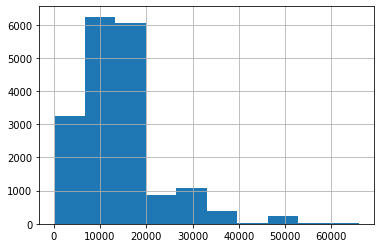

In [ ]:
# Выводим основные показатели, которые нам понадобятся для сравнения
print(df['city_centers_nearest'].isna().sum())
print(df['city_centers_nearest'].median())
print(df['city_centers_nearest'].describe())
df['city_centers_nearest'].hist()

In [ ]:
# заполняем пропуски
running = True
count = 0
while running:
    for i in range(1_379):
        df['city_centers_nearest'] = df['city_centers_nearest'].fillna(value=random.randrange(800,9_238),limit=1)
        count += 1
    running=False
print(count)
df['city_centers_nearest'].describe()

1379


count    19558.000000
mean     13547.579814
std       8646.666158
min        181.000000
25%       7975.250000
50%      12608.000000
75%      16029.750000
max      65968.000000
Name: city_centers_nearest, dtype: float64

In [ ]:
# заполняем пропуски
running = True
count = 0
while running:
    for i in range(1_379):
        df['city_centers_nearest'] = df['city_centers_nearest'].fillna(value=random.randrange(9_238,13_099),limit=1)
        count += 1
    running=False
print(count)
df['city_centers_nearest'].describe()

1379


count    20937.000000
mean     13390.379185
std       8382.830633
min        181.000000
25%       8387.000000
50%      12323.000000
75%      15791.000000
max      65968.000000
Name: city_centers_nearest, dtype: float64

In [ ]:
# заполняем пропуски
running = True
count = 0
while running:
    for i in range(1_379):
        df['city_centers_nearest'] = df['city_centers_nearest'].fillna(value=random.randrange(13_099,16_293),limit=1)
        count += 1
    running=False
print(count)
df['city_centers_nearest'].describe()

1379


count    22316.000000
mean     13471.152088
std       8128.952944
min        181.000000
25%       8777.750000
50%      12702.000000
75%      15712.250000
max      65968.000000
Name: city_centers_nearest, dtype: float64

In [ ]:
# заполняем пропуски
running = True
count = 0
while running:
    for i in range(922):
        df['city_centers_nearest'] = df['city_centers_nearest'].fillna(value=random.randrange(16_293,35_000),limit=1)
        count += 1
    running=False
print(count)
df['city_centers_nearest'].describe()

922


count    23238.000000
mean     13959.695456
std       8386.478883
min        181.000000
25%       9074.000000
50%      12982.500000
75%      16088.000000
max      65968.000000
Name: city_centers_nearest, dtype: float64

In [ ]:
# заполняем пропуски
running = True
count = 0
while running:
    for i in range(460):
        df['city_centers_nearest'] = df['city_centers_nearest'].fillna(value=random.randrange(35_000,65_968),limit=1)
        count += 1
    running=False
print(count)
df['city_centers_nearest'].describe()

460


count    23698.000000
mean     14659.350873
std       9757.734491
min        181.000000
25%       9238.000000
50%      13101.000000
75%      16293.000000
max      65968.000000
Name: city_centers_nearest, dtype: float64

0
13101.0


<AxesSubplot:>

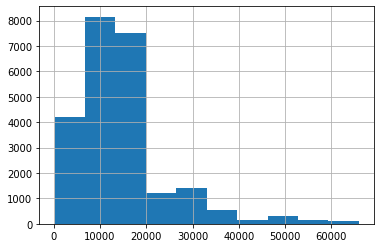

In [ ]:
# Проверка
print(df['city_centers_nearest']
      .isna()
      .sum()
     )
print(df['city_centers_nearest'].median())
df['city_centers_nearest'].hist()

**Вывод:**
Как видно из проверок, медиана можно сказать, что практически не изменилась.

In [ ]:
# Приведем к типу int
df['city_centers_nearest'] = (
                              df['city_centers_nearest']
                              .astype('int64',
                                      errors='raise')
                                )

In [ ]:
# проверка
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23698 entries, 0 to 23697
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23698 non-null  int64         
 1   last_price            23698 non-null  int64         
 2   total_area            23698 non-null  float64       
 3   first_day_exposition  23698 non-null  datetime64[ns]
 4   rooms                 23698 non-null  int64         
 5   ceiling_height        14503 non-null  float64       
 6   floors_total          23621 non-null  float64       
 7   living_area           21795 non-null  float64       
 8   floor                 23698 non-null  int64         
 9   is_apartment          23698 non-null  int64         
 10  studio                23698 non-null  bool          
 11  open_plan             23698 non-null  bool          
 12  kitchen_area          21420 non-null  float64       
 13  balcony         

**Вывод:**

Изначально я сначала заполнил пустые строки в столбце `ceiling_height`, но потом вскрылись строки в который значения в `city_centers_nearest` NaN. Эти строки не заполнились, потому что в столбце `city_centers_nearest` присутствуют пропуски. Для этого я выше сперва заполнил пропуски в `city_centers_nearest`

In [ ]:
# Категориальная медианная стоимость, зависящая от расстояния до центра
# Ближе 1 км
less_1_km = round(
                (
                 df.query('city_centers_nearest <= 800')
                 .pivot_table(index='city_centers_nearest',
                             values='ceiling_height')
                 .median()
                ),
    1)
less_1_km






ceiling_height    3.3
dtype: float64

In [ ]:
# Дальше одного киллометра, но ближе 10
less_10_km = round(
                 (df.query('(city_centers_nearest > 800) & (city_centers_nearest <= 10_000)')
                  .pivot_table(index='city_centers_nearest',
                            values='ceiling_height')
                  .median()
),1)
less_10_km

ceiling_height    2.8
dtype: float64

In [ ]:
# Дальше 10
more_10_km = round(
                (df.query('city_centers_nearest > 10_000')
                .pivot_table(index='city_centers_nearest',
                            values='ceiling_height')
                .median()
),
    1)
more_10_km

ceiling_height    2.6
dtype: float64

2.65


<AxesSubplot:>

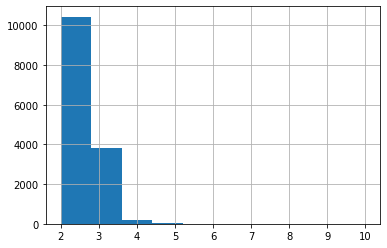

In [ ]:
# для дальнейшей проверки
print(df['ceiling_height'].median())
df['ceiling_height'].hist(range=(2,10))

**Вывод:**
Похоже на экспоненциальное распределение или пуассоного, но не совсем  

In [ ]:
# Заполняем относительно расстояния до центра

df.loc[((df.city_centers_nearest <= 1000) & (df.ceiling_height.isna())),('ceiling_height')] = 3.3


In [ ]:
df.loc[((df.city_centers_nearest <= 10000) & (df.ceiling_height.isna())),('ceiling_height')] = 2.8


In [ ]:
df.loc[((df.city_centers_nearest > 10000) & (df.ceiling_height.isna())),('ceiling_height')] = 2.6

In [ ]:
# Проверка
print(
(
    df.loc[df['city_centers_nearest'] <= 1000,'ceiling_height']
    .isna()
    .mean()
),
(
    df.loc[df['city_centers_nearest'] <= 10000,'ceiling_height']
      .isna()
      .mean()
),
(
    df.loc[df['city_centers_nearest'] > 10000,'ceiling_height']
      .isna()
      .mean()
)
     )

0.0 0.0 0.0


In [ ]:
# Проверка общая для столбца
(df['ceiling_height']
 .isna()
 .mean()
)

0.0

2.6


<AxesSubplot:>

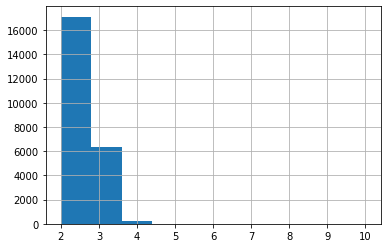

In [ ]:
# Проверка

print(df['ceiling_height'].median())
df['ceiling_height'].hist(range=(2,10))

**Вывод:**
Частота сохранила свою природу, а медиана практически не изменилась

In [ ]:
# Округлим столбец до десятых для удобства и группировок дальнейшних
df['ceiling_height'] = round(df['ceiling_height'],1)

In [ ]:
# Проверка
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000,108.0,2019-03-07,3,2.7,16.0,51.0,8,0,...,25.0,0,Санкт-Петербург,18863.0,16028,1,482.0,2,755.0,NaN
1,7,3350,40.4,2018-12-04,1,2.6,11.0,18.6,1,0,...,11.0,2,посёлок Шушары,12817.0,18603,0,NaN,0,NaN,81.0
2,10,5196,56.0,2015-08-20,2,2.6,5.0,34.3,4,0,...,8.3,0,Санкт-Петербург,21741.0,13933,1,90.0,2,574.0,558.0
3,0,64900,159.0,2015-07-24,3,2.8,14.0,NaN,9,0,...,NaN,0,Санкт-Петербург,28098.0,6800,2,84.0,3,234.0,424.0
4,2,10000,100.0,2018-06-19,2,3.0,14.0,32.0,13,0,...,41.0,0,Санкт-Петербург,31856.0,8098,2,112.0,1,48.0,121.0


In [ ]:
# Сводная таблица высота поталка и медианное значение столбца floors_total
(
    df.pivot_table(index=('ceiling_height'),
                values=('floors_total'),
                aggfunc={'median'})
                                           )


,median
ceiling_height,
1.0,12.0
1.2,2.0
1.8,37.0
2.0,5.0
2.2,3.5
2.3,5.0
2.4,5.0
2.5,7.0
2.6,9.0


In [ ]:
# Сводная таблица высота поталка и количество таких потолков
(
    df.pivot_table(index=('ceiling_height'),
                values=('floors_total'),
                aggfunc={'count'})
                                           )


,count
ceiling_height,
1.0,1
1.2,1
1.8,1
2.0,11
2.2,2
2.3,5
2.4,38
2.5,3792
2.6,10352


**Вывод:**

Как видно из последней свобдной таблицы, в ней присутствуют довольно-таки аномальные значения для высоты потолков.
* Стоит удалить строки, где потолки меньше 2 метров и равны 100 метрам.
* Строки с двузначными числами поступим так: удалим строки с потолками меньше "20" метров, потому что скорее всего человек случайно написал двузначное число, думая, что пишет через точку или другой разделитель.

На этом этапе это пока что все

In [ ]:
# чистим аномалии
df.drop(df[df.ceiling_height < 2].index, inplace=True)
df.drop(df[(df.ceiling_height < 20) & (df.ceiling_height >= 10)].index, inplace=True)
df.drop(df[df.ceiling_height == 100].index, inplace=True)
(df.loc[((df.ceiling_height >= 20) & (df.ceiling_height <= 50)), 'ceiling_height']) /= 10

In [ ]:
# Проверка
(df.pivot_table(index=('ceiling_height'),
                values=('floors_total'),
                aggfunc={'count'}))

,count
ceiling_height,
2.00,12
2.20,2
2.26,1
2.30,5
2.40,39
2.50,3799
2.60,10353
2.70,1767
2.75,1


In [ ]:
# Округлим до десятых еще раз и проверим
df['ceiling_height'] = round(df['ceiling_height'],1)
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000,108.0,2019-03-07,3,2.7,16.0,51.0,8,0,...,25.0,0,Санкт-Петербург,18863.0,16028,1,482.0,2,755.0,NaN
1,7,3350,40.4,2018-12-04,1,2.6,11.0,18.6,1,0,...,11.0,2,посёлок Шушары,12817.0,18603,0,NaN,0,NaN,81.0
2,10,5196,56.0,2015-08-20,2,2.6,5.0,34.3,4,0,...,8.3,0,Санкт-Петербург,21741.0,13933,1,90.0,2,574.0,558.0
3,0,64900,159.0,2015-07-24,3,2.8,14.0,NaN,9,0,...,NaN,0,Санкт-Петербург,28098.0,6800,2,84.0,3,234.0,424.0
4,2,10000,100.0,2018-06-19,2,3.0,14.0,32.0,13,0,...,41.0,0,Санкт-Петербург,31856.0,8098,2,112.0,1,48.0,121.0


In [ ]:
# Проверка
df.isna().mean()

total_images            0.000000
last_price              0.000000
total_area              0.000000
first_day_exposition    0.000000
rooms                   0.000000
ceiling_height          0.000000
floors_total            0.003250
living_area             0.080322
floor                   0.000000
is_apartment            0.000000
studio                  0.000000
open_plan               0.000000
kitchen_area            0.096108
balcony                 0.000000
locality_name           0.002068
airports_nearest        0.233876
city_centers_nearest    0.000000
parks_around3000        0.000000
parks_nearest           0.659168
ponds_around3000        0.000000
ponds_nearest           0.615651
days_exposition         0.134265
dtype: float64

In [ ]:
# Проанализируем столбце floor_total перед заполнением пустых значений
df['floors_total'].describe()


count    23615.000000
mean        10.673343
std          6.594108
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

In [ ]:
# смотрим лидеров по количеству n-этажных домов и ищем аномалии
df['floors_total'].value_counts().sort_values()

33.0       1
29.0       1
34.0       1
52.0       1
60.0       1
36.0       3
28.0      21
35.0      24
1.0       25
26.0     124
21.0     158
27.0     164
11.0     203
13.0     229
20.0     271
22.0     286
19.0     339
23.0     352
15.0     365
2.0      382
8.0      390
24.0     469
18.0     505
14.0     552
7.0      592
3.0      668
17.0     833
6.0      914
25.0    1074
10.0    1174
4.0     1200
12.0    1364
16.0    1380
9.0     3761
5.0     5788
Name: floors_total, dtype: int64

Аномалий не выявлено, заполняем пропуски относительно высоты потолков

9.0


<AxesSubplot:>

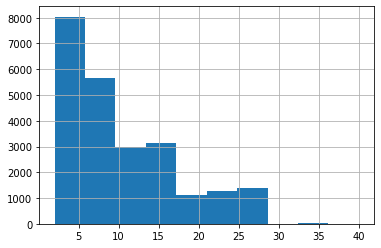

In [ ]:
# Вспомогальные значения для проверки
print(df['floors_total'].median())
df['floors_total'].hist(range=(2,40))

In [ ]:
# Строикм сводную таблицу для выявления median по высоте потолков
floor_with_ceil_piv = df.pivot_table(index='ceiling_height',values='floors_total',aggfunc={'median'})
floor_with_ceil_piv.columns = ['floor_median']
floor_with_ceil_piv


,floor_median
ceiling_height,
2.0,7.0
2.2,3.5
2.3,5.0
2.4,5.0
2.5,7.0
2.6,9.0
2.7,12.0
2.8,10.0
2.9,5.0


In [ ]:
# делаем замену группируя по ceiling_height
df['floors_total'] = df['floors_total'].fillna(df.groupby('ceiling_height')['floors_total'].transform('median'))


In [ ]:
# Проверка
df['floors_total'].isna().sum()


0

<AxesSubplot:>

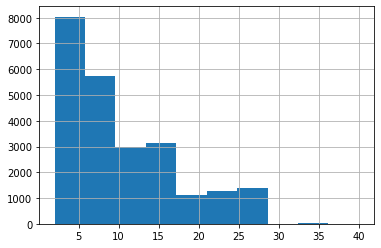

In [ ]:
# Проверка
df['floors_total'].hist(range=(2,40))

In [ ]:
# 3.0.0.6 Для вопроса
df.loc[df['floors_total'],'ceiling_height'].unique()

array([3. , 2.6, 2.8, 2.5, 2.7, 2.9])

In [ ]:
# Переведем столбец floors_total в int64
df['floors_total'] = df['floors_total'].astype('int64',errors='raise')

In [ ]:
# Проверка
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23692 entries, 0 to 23697
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23692 non-null  int64         
 1   last_price            23692 non-null  int64         
 2   total_area            23692 non-null  float64       
 3   first_day_exposition  23692 non-null  datetime64[ns]
 4   rooms                 23692 non-null  int64         
 5   ceiling_height        23692 non-null  float64       
 6   floors_total          23692 non-null  int64         
 7   living_area           21789 non-null  float64       
 8   floor                 23692 non-null  int64         
 9   is_apartment          23692 non-null  int64         
 10  studio                23692 non-null  bool          
 11  open_plan             23692 non-null  bool          
 12  kitchen_area          21415 non-null  float64       
 13  balcony         

In [ ]:
#смотрим уникальные значения и их количество в каждом столбце из списка
category_list = ['is_apartment','studio','open_plan','balcony','parks_around3000','ponds_around3000']
for i in category_list:
    print(i)
    print(df[i].value_counts())
    print('-'*30)

is_apartment
0    23643
1       49
Name: is_apartment, dtype: int64
------------------------------
studio
False    23543
True       149
Name: studio, dtype: int64
------------------------------
open_plan
False    23625
True        67
Name: open_plan, dtype: int64
------------------------------
balcony
0    15272
1     4195
2     3658
5      303
4      183
3       81
Name: balcony, dtype: int64
------------------------------
parks_around3000
0    15621
1     5679
2     1745
3      647
Name: parks_around3000, dtype: int64
------------------------------
ponds_around3000
0    14586
1     5717
2     1890
3     1499
Name: ponds_around3000, dtype: int64
------------------------------


**Вывод:**
Приведем столбцы `studio` и `open_plan` к типу `int64`

In [ ]:
# функция замена типа с bool в int
def from_bool_to_int(column):
    df[column] = df[column].astype('int64',errors='raise')
    # Автоматическая проверка для столбца
    print(df[column].value_counts())

In [ ]:
# заменяем тип в столбцах
from_bool_to_int('studio')
from_bool_to_int('open_plan')

0    23543
1      149
Name: studio, dtype: int64
0    23625
1       67
Name: open_plan, dtype: int64


In [ ]:
# Проверим еще раз
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23692 entries, 0 to 23697
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23692 non-null  int64         
 1   last_price            23692 non-null  int64         
 2   total_area            23692 non-null  float64       
 3   first_day_exposition  23692 non-null  datetime64[ns]
 4   rooms                 23692 non-null  int64         
 5   ceiling_height        23692 non-null  float64       
 6   floors_total          23692 non-null  int64         
 7   living_area           21789 non-null  float64       
 8   floor                 23692 non-null  int64         
 9   is_apartment          23692 non-null  int64         
 10  studio                23692 non-null  int64         
 11  open_plan             23692 non-null  int64         
 12  kitchen_area          21415 non-null  float64       
 13  balcony         

In [ ]:
# ищем пропущенные значения в кадом столбце и их количество
# и долю пропусков
for i in df.columns:
    print(i)
    print(df[i].value_counts(dropna=False))
    print('-'*30)
    print(df[i].isna().mean())
    print('-'*30)

total_images
10    1798
9     1725
20    1693
8     1585
7     1520
6     1482
11    1362
5     1299
12    1225
0     1058
13    1015
4      986
14     986
15     948
1      872
3      769
16     760
17     650
18     642
2      640
19     602
23      16
21      12
24       8
22       8
26       5
28       4
32       4
29       3
50       3
27       2
35       2
30       2
31       2
39       1
25       1
42       1
37       1
Name: total_images, dtype: int64
------------------------------
0.0
------------------------------
last_price
4500     342
3500     292
4300     260
4000     260
4200     259
        ... 
4635       1
16913      1
2568       1
11894      1
4094       1
Name: last_price, Length: 2840, dtype: int64
------------------------------
0.0
------------------------------
total_area
45.0     419
42.0     385
44.0     349
60.0     348
31.0     346
        ... 
21.1       1
347.0      1
218.0      1
151.5      1
242.4      1
Name: total_area, Length: 1449, dtype: int64
------

In [ ]:
# смотрим сколько всего строк в таблице с пустыми значениями
# в двух столбцах отдновременно
df.loc[((df['living_area'].isna() )& (df['kitchen_area'].isna()))]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
3,0,64900,159.0,2015-07-24,3,2.8,14,NaN,9,0,...,NaN,0,Санкт-Петербург,28098.0,6800,2,84.0,3,234.0,424.0
30,12,2200,32.8,2018-02-19,1,2.8,9,NaN,2,0,...,NaN,0,Коммунар,NaN,5629,0,NaN,0,NaN,63.0
37,10,1990,45.8,2017-10-28,2,2.5,5,NaN,1,0,...,NaN,0,поселок городского типа Красный Бор,NaN,6812,0,NaN,0,NaN,196.0
44,13,5350,40.0,2018-11-18,1,2.6,22,NaN,3,0,...,NaN,1,Санкт-Петербург,30471.0,11603,1,620.0,1,1152.0,NaN
59,15,6300,46.5,2017-03-06,1,2.6,13,NaN,13,0,...,NaN,0,Санкт-Петербург,11125.0,14501,0,NaN,0,NaN,336.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23631,20,5000,38.0,2018-06-23,1,2.6,16,NaN,15,0,...,NaN,1,Санкт-Петербург,31118.0,7257,1,241.0,1,230.0,113.0
23641,14,5950,80.3,2018-07-03,3,2.7,12,NaN,5,0,...,NaN,0,Колпино,27933.0,33719,0,NaN,2,562.0,60.0
23662,12,6400,88.0,2018-01-12,4,2.6,10,NaN,1,0,...,NaN,0,Санкт-Петербург,33642.0,13943,0,NaN,2,844.0,59.0
23669,9,2450,45.6,2018-02-08,1,2.8,9,NaN,2,0,...,NaN,0,поселок городского типа Синявино,NaN,44168,0,NaN,0,NaN,45.0


**Вывод:**
Осталось заменить пропущенные значения в столбцах:
* `living_area` - округлим до десятых. Nan заполним с помощью коэффциент * общую площадь
* `kitchen_area` - округлим до десятых. Nan заполним коэффциент * общую площадь
* `locality_name` - проверим, можно ли удалить все строки, где пропущенны значения
* `airports_nearest` - приведем к типу `int64`. Nan заполним относительно `city_centers_nearest`
* `parks_nearest` - приведем к типу `int64` Nan заполняем относительно `city_centers_nearest` и `locality_name`
* `ponds_nearest` - приведем к типу `int64` Nan заполняем относительно `city_centers_nearest` и `locality_name`
* `days_exposition` - приведем к типу `int64`. Заполним NaN относительно группировки по цене

In [ ]:
df.groupby('city_centers_nearest')['airports_nearest'].median()

city_centers_nearest
181      21633.0
208      21632.0
215      21818.0
287      21908.0
291      21739.0
          ...   
65713        NaN
65764    84665.0
65929        NaN
65952    84853.0
65968    84869.0
Name: airports_nearest, Length: 11045, dtype: float64

5541
26726.0
AxesSubplot(0.125,0.125;0.775x0.755)


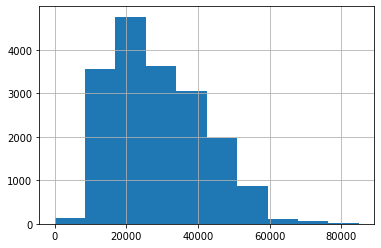

In [ ]:
# Для проверки

df['parks_nearest'].describe()
print(df['airports_nearest'].isna().sum())
print(df['airports_nearest'].median())
print(df['airports_nearest'].hist())

In [ ]:
# заполняем пропуски относительно группировки по city_centers_nearest
df['airports_nearest'] = df['airports_nearest'].fillna(df.groupby('city_centers_nearest')['airports_nearest']
                                                       .transform('median')
                                                      )

3795
26599.0
AxesSubplot(0.125,0.125;0.775x0.755)


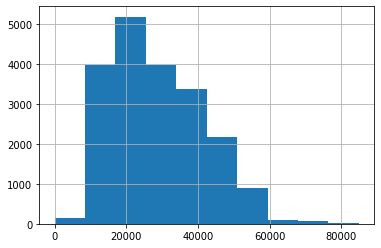

In [ ]:
# Проверка
print(df['airports_nearest'].isna().sum())
print(df['airports_nearest'].median())
print(df['airports_nearest'].hist())

**Вывод:**
Характер частот совпадает с графиков до заполнения. Медиана практически не изменилась

In [ ]:
# другие пропуски придется заполнить через цикл while и счетчик с перцентилями
# анализируем меры центральной тенденции и смотрим на перцентили
df['airports_nearest'].describe()

count    19897.000000
mean     28677.108836
std      12576.169973
min          0.000000
25%      18516.000000
50%      26599.000000
75%      37106.000000
max      84869.000000
Name: airports_nearest, dtype: float64

In [ ]:
# обозначим переменные для удобства и компактности
total_nan_air = df['airports_nearest'].isna().sum()
total_nan_div_4_air = total_nan_air//4

In [ ]:
running = True
count = 0
while running:
    for i in range(total_nan_div_4_air):
        df['airports_nearest'] = df['airports_nearest'].fillna(value=random.randrange(0,18_551),limit=1)
        count += 1
    running=False
print(count)

948


In [ ]:
running = True
count = 0
while running:
    for i in range(total_nan_div_4_air + (total_nan_air - total_nan_div_4_air * 4)):
        df['airports_nearest'] = df['airports_nearest'].fillna(value=random.randrange(18_551,26_737),limit=1)
        count += 1
    running=False
print(count)

951


In [ ]:
running = True
count = 0
while running:
    for i in range(total_nan_div_4_air):
        df['airports_nearest'] = df['airports_nearest'].fillna(value=random.randrange(26_737,37_245),limit=1)
        count += 1
    running=False
print(count)

948


In [ ]:
running = True
count = 0
while running:
    for i in range(total_nan_div_4_air):
        df['airports_nearest'] = df['airports_nearest'].fillna(value=random.randrange(37_245,84_869),limit=1)
        count += 1
    running=False
print(count)

948


0
26613.0
AxesSubplot(0.125,0.125;0.775x0.755)


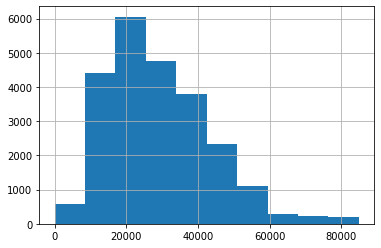

In [ ]:
# Проверка
print(df['airports_nearest'].isna().sum())
print(df['airports_nearest'].median())
print(df['airports_nearest'].hist())

**Вывод:**
Характер частот совпадает с графиков до заполнения. Медиана практически не изменилась

In [ ]:
# смотрим сколько строк с пропущенными значениями в locality_name
df.loc[df['locality_name'].isna()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
1097,3,8600,81.7,2016-04-15,3,3.6,5,50.80,2,0,...,8.80,0,NaN,23478.0,4258,0,NaN,0,NaN,147.0
2033,6,5398,80.0,2017-05-30,3,2.8,4,42.60,2,0,...,18.60,0,NaN,7679.0,2585,0,NaN,0,NaN,34.0
2603,20,3351,42.7,2015-09-20,1,2.6,24,15.60,3,0,...,10.70,0,NaN,22041.0,17369,0,NaN,1,374.0,276.0
2632,2,5130,62.4,2015-10-11,2,2.6,24,33.10,21,0,...,8.20,0,NaN,22041.0,17369,0,NaN,1,374.0,256.0
3574,10,4200,46.5,2016-05-28,2,2.8,5,30.80,5,0,...,6.50,0,NaN,27419.0,8127,0,NaN,1,603.0,45.0
4151,17,17600,89.5,2014-12-09,2,3.0,8,39.62,7,0,...,13.38,0,NaN,25054.0,3902,1,485.0,3,722.0,869.0
4189,7,9200,80.0,2015-12-10,3,4.0,4,52.30,3,0,...,10.40,0,NaN,21774.0,3039,1,690.0,1,953.0,223.0
4670,1,5500,83.0,2015-08-14,3,2.8,7,NaN,6,0,...,NaN,0,NaN,26534.0,5382,1,446.0,1,376.0,350.0
5343,19,13540,85.5,2016-01-20,3,2.8,7,59.10,5,0,...,8.30,4,NaN,10556.0,9538,1,67.0,0,NaN,303.0
5707,7,3700,30.0,2016-04-29,1,2.6,24,20.00,23,0,...,NaN,0,NaN,21460.0,16788,0,NaN,1,170.0,49.0


**Вывод**

Можно удалить 49 строк - это не существенное изменение для выборки.

In [ ]:
# Для проверки
print(df.shape[0])
print(df['locality_name'].isna().sum())

23692
49


In [ ]:
# удаляем
df.dropna(axis=0,subset=['locality_name'],inplace=True)
df.reset_index(drop=True,inplace=True)

In [ ]:
# Проверка
print(df.shape[0])
print(df['locality_name'].isna().sum())

23643
0


In [ ]:
# Проверка
df.isna().mean()

total_images            0.000000
last_price              0.000000
total_area              0.000000
first_day_exposition    0.000000
rooms                   0.000000
ceiling_height          0.000000
floors_total            0.000000
living_area             0.080277
floor                   0.000000
is_apartment            0.000000
studio                  0.000000
open_plan               0.000000
kitchen_area            0.095927
balcony                 0.000000
locality_name           0.000000
airports_nearest        0.000000
city_centers_nearest    0.000000
parks_around3000        0.000000
parks_nearest           0.659096
ponds_around3000        0.000000
ponds_nearest           0.615912
days_exposition         0.134501
dtype: float64

In [ ]:
# смотрим самое большое расстояние до парка
df.sort_values(by='parks_nearest',ascending=False)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
19391,9,3900,30.5,2018-02-22,1,2.6,5,16.5,1,0,...,5.5,0,Санкт-Петербург,14821.0,9734,0,3190.0,1,431.0,176.0
10939,9,3000,31.1,2017-03-21,1,2.8,5,17.7,2,0,...,5.5,0,Санкт-Петербург,14821.0,9734,0,3190.0,1,431.0,234.0
1589,3,7500,70.0,2017-07-11,2,2.8,18,37.0,13,0,...,10.0,0,Санкт-Петербург,14878.0,9791,0,3064.0,1,264.0,4.0
19169,17,14950,187.0,2017-10-12,5,3.0,2,80.0,2,0,...,17.0,1,Санкт-Петербург,36805.0,8656,0,3013.0,3,537.0,49.0
23025,15,4650,44.5,2018-02-20,2,2.8,5,25.2,2,0,...,5.5,1,Санкт-Петербург,14965.0,9877,1,2984.0,1,284.0,152.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23635,11,9470,72.9,2016-10-13,2,2.8,25,40.3,7,0,...,10.6,1,Санкт-Петербург,19424.0,4489,0,NaN,1,806.0,519.0
23636,2,1350,30.0,2017-07-07,1,2.6,5,17.5,4,0,...,6.0,0,Тихвин,56702.0,57926,0,NaN,0,NaN,413.0
23639,14,3100,59.0,2018-01-15,3,2.6,5,38.0,4,0,...,8.5,0,Тосно,42425.0,35135,0,NaN,0,NaN,45.0
23640,18,2500,56.7,2018-02-11,2,2.6,3,29.7,1,0,...,NaN,0,село Рождествено,40579.0,63280,0,NaN,0,NaN,NaN


455.0
15583
AxesSubplot(0.125,0.125;0.775x0.755)


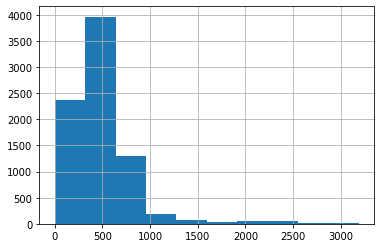

In [ ]:
# Для проверки
print(df['parks_nearest'].median())
print(df['parks_nearest'].isna().sum())
print(df['parks_nearest'].hist())

In [ ]:
# группируем по нужным столбцам
df.groupby(['city_centers_nearest','locality_name'])['parks_nearest'].median()

city_centers_nearest  locality_name     
181                   Санкт-Петербург       254.0
208                   Санкт-Петербург       304.0
215                   Санкт-Петербург       229.0
287                   Санкт-Петербург       359.0
291                   Санкт-Петербург       472.0
                                            ...  
65713                 Светогорск              NaN
65764                 посёлок Молодёжное      NaN
65929                 Луга                    NaN
65952                 посёлок Молодёжное      NaN
65968                 посёлок Молодёжное      NaN
Name: parks_nearest, Length: 13138, dtype: float64

In [ ]:
# заполняем пропуски
df['parks_nearest'] = df['parks_nearest'].fillna(df.groupby(['city_centers_nearest','locality_name'])['parks_nearest']
                                                 .transform('median'))

456.0
13972
AxesSubplot(0.125,0.125;0.775x0.755)


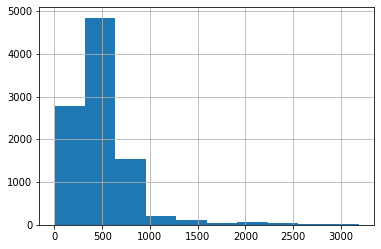

In [ ]:
# Проверка
print(df['parks_nearest'].median())
print(df['parks_nearest'].isna().sum())
print(df['parks_nearest'].hist())

In [ ]:
# заполним пропуски
df['parks_nearest'] = df['parks_nearest'].fillna(df.groupby(['city_centers_nearest'])['parks_nearest']
                                                 .transform('median'))

455.0
12987
AxesSubplot(0.125,0.125;0.775x0.755)


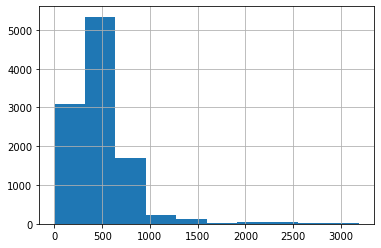

In [ ]:
# для проверки
print(df['parks_nearest'].median())
print(df['parks_nearest'].isna().sum())
print(df['parks_nearest'].hist())

In [ ]:
# заполним через цикл while и счетчи
# анализируем меры центральной тенденции и смотрим на перцентили
df['parks_nearest'].describe()

count    10656.000000
mean       488.142127
std        332.307979
min          1.000000
25%        290.000000
50%        455.000000
75%        610.000000
max       3190.000000
Name: parks_nearest, dtype: float64

In [ ]:
# нужные переменные
total_nan_parks = df['parks_nearest'].isna().sum()
total_nan_div_4_parks = total_nan_parks//4

In [ ]:
running = True
count = 0
while running:
    for i in range(total_nan_div_4_parks):
        df['parks_nearest'] = df['parks_nearest'].fillna(value=random.randrange(1,288),limit=1)
        count += 1
    running=False
print(count)
df['parks_nearest'].describe()

3246


count    13902.000000
mean       407.618652
std        327.909557
min          1.000000
25%        186.000000
50%        363.000000
75%        554.000000
max       3190.000000
Name: parks_nearest, dtype: float64

In [ ]:
running = True
count = 0
while running:
    for i in range(total_nan_div_4_parks + (total_nan_parks - total_nan_div_4_parks * 4)):
        df['parks_nearest'] = df['parks_nearest'].fillna(value=random.randrange(288,453),limit=1)
        count += 1
    running=False
print(count)
df['parks_nearest'].describe()

3249


count    17151.000000
mean       400.544021
std        296.296031
min          1.000000
25%        218.000000
50%        367.000000
75%        510.000000
max       3190.000000
Name: parks_nearest, dtype: float64

In [ ]:
running = True
count = 0
while running:
    for i in range(total_nan_div_4_parks):
        df['parks_nearest'] = df['parks_nearest'].fillna(value=random.randrange(453,606),limit=1)
        count += 1
    running=False
print(count)


3246


In [ ]:
running = True
count = 0
while running:
    for i in range(total_nan_div_4_parks):
        df['parks_nearest'] = df['parks_nearest'].fillna(value=random.randrange(606,3190),limit=1)
        count += 1
    running=False
print(count)


3246


453.0
0
AxesSubplot(0.125,0.125;0.775x0.755)


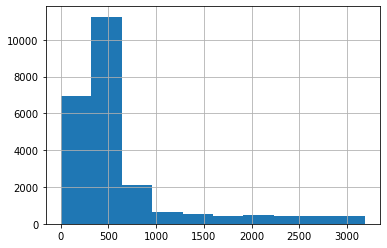

In [ ]:
# проверка
print(df['parks_nearest'].median())
print(df['parks_nearest'].isna().sum())
print(df['parks_nearest'].hist())

**Вывод:**

Заметим, что медиана практически не изменилась, характер графика тоже. Делаем вывод, что замена NaN прошла без экцессов

In [ ]:
# проверка + для дальнейших дейсвтий анализ
df.isna().mean()

total_images            0.000000
last_price              0.000000
total_area              0.000000
first_day_exposition    0.000000
rooms                   0.000000
ceiling_height          0.000000
floors_total            0.000000
living_area             0.080277
floor                   0.000000
is_apartment            0.000000
studio                  0.000000
open_plan               0.000000
kitchen_area            0.095927
balcony                 0.000000
locality_name           0.000000
airports_nearest        0.000000
city_centers_nearest    0.000000
parks_around3000        0.000000
parks_nearest           0.000000
ponds_around3000        0.000000
ponds_nearest           0.615912
days_exposition         0.134501
dtype: float64

Проделаем такие же действия со столбцом `ponds_nearest` как со столбцом `parks_nearest`

503.0
14562
AxesSubplot(0.125,0.125;0.775x0.755)


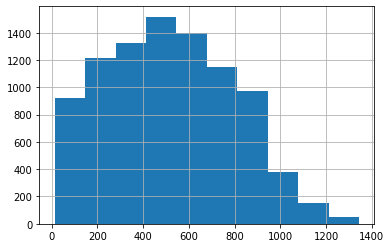

In [ ]:
# Для проверки
print(df['ponds_nearest'].median())
print(df['ponds_nearest'].isna().sum())
print(df['ponds_nearest'].hist())

In [ ]:
# группируем по нужным столбцам

df.groupby(['city_centers_nearest','locality_name'])['ponds_nearest'].median()

city_centers_nearest  locality_name     
181                   Санкт-Петербург       426.0
208                   Санкт-Петербург       503.0
215                   Санкт-Петербург       511.0
287                   Санкт-Петербург       290.0
291                   Санкт-Петербург        94.0
                                            ...  
65713                 Светогорск              NaN
65764                 посёлок Молодёжное      NaN
65929                 Луга                    NaN
65952                 посёлок Молодёжное      NaN
65968                 посёлок Молодёжное      NaN
Name: ponds_nearest, Length: 13138, dtype: float64

In [ ]:
# заполняем пропуски

df['ponds_nearest'] = df['ponds_nearest'].fillna(df.groupby(['city_centers_nearest','locality_name'])['ponds_nearest']
                                                 .transform('median'))


516.0
13024
AxesSubplot(0.125,0.125;0.775x0.755)


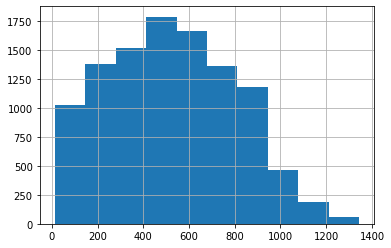

In [ ]:
# Проверка
print(df['ponds_nearest'].median())
print(df['ponds_nearest'].isna().sum())
print(df['ponds_nearest'].hist())

**Вывод:**

Этим заполнением избавились от некоторых NaN.

In [ ]:
# заполняем пропуски

df['ponds_nearest'] = df['ponds_nearest'].fillna(df.groupby(['city_centers_nearest'])['ponds_nearest']
                                                 .transform('median'))


518.0
12027
AxesSubplot(0.125,0.125;0.775x0.755)


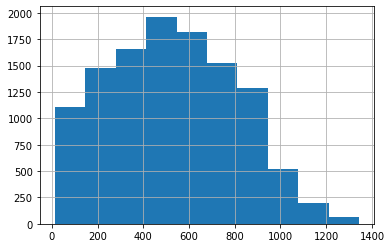

In [ ]:
# для проверки
print(df['ponds_nearest'].median())
print(df['ponds_nearest'].isna().sum())
print(df['ponds_nearest'].hist())

In [ ]:
# Найдем отношения, для каждой перцентили и заполним через цикл while и счетчик
df['ponds_nearest'].describe()

count    11616.000000
mean       527.817278
std        276.865502
min         13.000000
25%        308.000000
50%        518.000000
75%        741.000000
max       1344.000000
Name: ponds_nearest, dtype: float64

In [ ]:
# переменные для удобства
total_nan_ponds = df['ponds_nearest'].isna().sum()
total_nan_div_4_ponds = total_nan_ponds//4

In [ ]:
running = True
count = 0
while running:
    for i in range(total_nan_div_4_ponds):
        df['ponds_nearest'] = df['ponds_nearest'].fillna(value=random.randrange(13,304),limit=1)
        count += 1
    running=False
print(count)
df['ponds_nearest'].describe()

3006


count    14622.000000
mean       451.513712
std        291.339662
min         13.000000
25%        203.000000
50%        418.000000
75%        671.000000
max       1344.000000
Name: ponds_nearest, dtype: float64

In [ ]:
running = True
count = 0
while running:
    for i in range(total_nan_div_4_ponds):
        df['ponds_nearest'] = df['ponds_nearest'].fillna(value=random.randrange(304,515),limit=1)
        count += 1
    running=False
print(count)
df['ponds_nearest'].describe()

3006


count    17628.000000
mean       444.172368
std        267.053104
min         13.000000
25%        237.000000
50%        412.000000
75%        616.000000
max       1344.000000
Name: ponds_nearest, dtype: float64

In [ ]:
running = True
count = 0
while running:
    for i in range(total_nan_div_4_ponds + (total_nan_ponds - total_nan_div_4_ponds * 4)):
        df['ponds_nearest'] = df['ponds_nearest'].fillna(value=random.randrange(515,738),limit=1)
        count += 1
    running=False
print(count)
df['ponds_nearest'].describe()

3009


count    20637.000000
mean       470.568808
std        256.139852
min         13.000000
25%        272.000000
50%        465.000000
75%        651.000000
max       1344.000000
Name: ponds_nearest, dtype: float64

In [ ]:
running = True
count = 0
while running:
    for i in range(total_nan_div_4_ponds):
        df['ponds_nearest'] = df['ponds_nearest'].fillna(value=random.randrange(738,1_344),limit=1)
        count += 1
    running=False
print(count)
df['ponds_nearest'].describe()

3006


count    23643.000000
mean       542.508036
std        310.839197
min         13.000000
25%        305.000000
50%        516.000000
75%        740.000000
max       1344.000000
Name: ponds_nearest, dtype: float64

516.0
0
AxesSubplot(0.125,0.125;0.775x0.755)


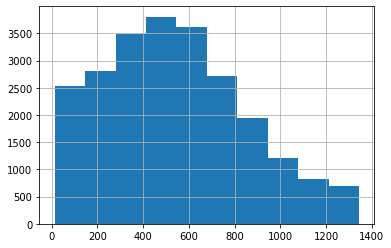

In [ ]:
# проверка
print(df['ponds_nearest'].median())
print(df['ponds_nearest'].isna().sum())
print(df['ponds_nearest'].hist())

**Вывод:**

Заметим, что медиана практически не изменилась, характер графика тоже. Делаем вывод, что замена NaN прошла без экцессов



In [ ]:
# приведем к типу 'int64' столбцы  ponds_nearest и parks_nearest
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23643 entries, 0 to 23642
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23643 non-null  int64         
 1   last_price            23643 non-null  int64         
 2   total_area            23643 non-null  float64       
 3   first_day_exposition  23643 non-null  datetime64[ns]
 4   rooms                 23643 non-null  int64         
 5   ceiling_height        23643 non-null  float64       
 6   floors_total          23643 non-null  int64         
 7   living_area           21745 non-null  float64       
 8   floor                 23643 non-null  int64         
 9   is_apartment          23643 non-null  int64         
 10  studio                23643 non-null  int64         
 11  open_plan             23643 non-null  int64         
 12  kitchen_area          21375 non-null  float64       
 13  balcony         

In [ ]:
# приводим к нужному типу столбцы
df['parks_nearest'] = df['parks_nearest'].astype('int64', errors='raise')
df['ponds_nearest'] = df['ponds_nearest'].astype('int64', errors='raise')

In [ ]:
# Проверка
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23643 entries, 0 to 23642
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23643 non-null  int64         
 1   last_price            23643 non-null  int64         
 2   total_area            23643 non-null  float64       
 3   first_day_exposition  23643 non-null  datetime64[ns]
 4   rooms                 23643 non-null  int64         
 5   ceiling_height        23643 non-null  float64       
 6   floors_total          23643 non-null  int64         
 7   living_area           21745 non-null  float64       
 8   floor                 23643 non-null  int64         
 9   is_apartment          23643 non-null  int64         
 10  studio                23643 non-null  int64         
 11  open_plan             23643 non-null  int64         
 12  kitchen_area          21375 non-null  float64       
 13  balcony         

In [ ]:
# ищем медианное значения в days_exposition
df['days_exposition'].median()


95.0

In [ ]:
# смотрим количество пропущенных значений
df['days_exposition'].isna().sum()

3180

<AxesSubplot:>

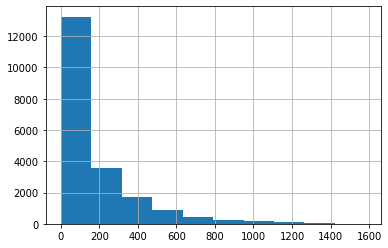

In [ ]:
# строим гистрограмму по days_exposition
df['days_exposition'].hist()

In [ ]:
# анализируем меры центральной тенденции и смотрим на перцентили
df['days_exposition'].describe()

count    20463.000000
mean       180.775448
std        219.802081
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64

In [ ]:
# для удобства
total_nan_days = df['days_exposition'].isna().sum()
total_nan_div_4_days = total_nan_days//4


In [ ]:
running = True
count = 0
while running:
    for i in range(total_nan_div_4_days + (total_nan_days - total_nan_div_4_days * 4)):
        df['days_exposition'] = df['days_exposition'].fillna(value=random.randrange(1,45),limit=1)
        count += 1
    running=False
print(count)
df['days_exposition'].describe()

795


count    21258.000000
mean       174.869320
std        217.738773
min          1.000000
25%         40.000000
50%         90.000000
75%        222.000000
max       1580.000000
Name: days_exposition, dtype: float64

In [ ]:
running = True
count = 0
while running:
    for i in range(total_nan_div_4_days + (total_nan_days - total_nan_div_4_days * 4)):
        df['days_exposition'] = df['days_exposition'].fillna(value=random.randrange(45,95),limit=1)
        count += 1
    running=False
print(count)
df['days_exposition'].describe()

795


count    22053.000000
mean       171.081848
std        214.691155
min          1.000000
25%         42.000000
50%         88.000000
75%        214.000000
max       1580.000000
Name: days_exposition, dtype: float64

In [ ]:
running = True
count = 0
while running:
    for i in range(total_nan_div_4_days + (total_nan_days - total_nan_div_4_days * 4)):
        df['days_exposition'] = df['days_exposition'].fillna(value=random.randrange(95,231),limit=1)
        count += 1
    running=False
print(count)
df['days_exposition'].describe()

795


count    22848.000000
mean       170.831670
std        211.053957
min          1.000000
25%         43.000000
50%         90.000000
75%        210.000000
max       1580.000000
Name: days_exposition, dtype: float64

In [ ]:
running = True
count = 0
while running:
    for i in range(total_nan_div_4_days + (total_nan_days - total_nan_div_4_days * 4)):
        df['days_exposition'] = df['days_exposition'].fillna(value=random.randrange(231,1_580),limit=1)
        count += 1
    running=False
print(count)
df['days_exposition'].describe()

795


count    23643.000000
mean       196.497230
std        258.740486
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64

In [ ]:
# проверка
df['days_exposition'].isna().sum()


0

95.0


<AxesSubplot:>

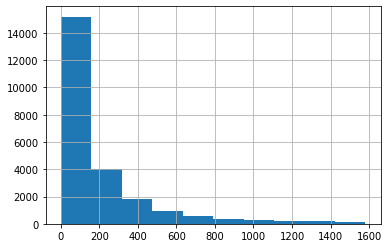

In [ ]:
# проверка
print(df['days_exposition'].median())
df['days_exposition'].hist()

**Вывод:**
Характер частот совпадает с графиков до заполнения. Медиана практически не изменилась

In [ ]:
# Приведем столбец days_exposition к int64
df['days_exposition'] = df['days_exposition'].astype('int64',errors='raise')

In [ ]:
# проверка
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23643 entries, 0 to 23642
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23643 non-null  int64         
 1   last_price            23643 non-null  int64         
 2   total_area            23643 non-null  float64       
 3   first_day_exposition  23643 non-null  datetime64[ns]
 4   rooms                 23643 non-null  int64         
 5   ceiling_height        23643 non-null  float64       
 6   floors_total          23643 non-null  int64         
 7   living_area           21745 non-null  float64       
 8   floor                 23643 non-null  int64         
 9   is_apartment          23643 non-null  int64         
 10  studio                23643 non-null  int64         
 11  open_plan             23643 non-null  int64         
 12  kitchen_area          21375 non-null  float64       
 13  balcony         

In [ ]:
# проверка и анализ для дальнейшей работы
df.isna().mean()

total_images            0.000000
last_price              0.000000
total_area              0.000000
first_day_exposition    0.000000
rooms                   0.000000
ceiling_height          0.000000
floors_total            0.000000
living_area             0.080277
floor                   0.000000
is_apartment            0.000000
studio                  0.000000
open_plan               0.000000
kitchen_area            0.095927
balcony                 0.000000
locality_name           0.000000
airports_nearest        0.000000
city_centers_nearest    0.000000
parks_around3000        0.000000
parks_nearest           0.000000
ponds_around3000        0.000000
ponds_nearest           0.000000
days_exposition         0.000000
dtype: float64

In [ ]:
# приводим к int64
df['airports_nearest'] = df['airports_nearest'].astype('int64',errors='raise')


In [ ]:
# проверка
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23643 entries, 0 to 23642
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23643 non-null  int64         
 1   last_price            23643 non-null  int64         
 2   total_area            23643 non-null  float64       
 3   first_day_exposition  23643 non-null  datetime64[ns]
 4   rooms                 23643 non-null  int64         
 5   ceiling_height        23643 non-null  float64       
 6   floors_total          23643 non-null  int64         
 7   living_area           21745 non-null  float64       
 8   floor                 23643 non-null  int64         
 9   is_apartment          23643 non-null  int64         
 10  studio                23643 non-null  int64         
 11  open_plan             23643 non-null  int64         
 12  kitchen_area          21375 non-null  float64       
 13  balcony         

Можно заметить, что строки, в которых `living_area` и `kitchen_area` превышает `total_area`, присутствуют до заполения NaN. Возможно просто часть кухни включили в жилую. Не буду считать это за артефакт или аномалию

In [ ]:
# создаем временную таблицу для дальнейшего заполнения со толбцами  'total_area' и 'living_area'
tmp_living = df.loc[:,['total_area','living_area']]

In [ ]:
# отбросим сроки с пустыми значениями
tmp_living = tmp_living.loc[tmp_living['living_area'].isna()==False]

In [ ]:
# создадим вспомогательную столбец living_to_total для заполениня пропусков
tmp_living['living_to_total'] = tmp_living['living_area'] / tmp_living['total_area']


In [ ]:
# удаляем ненужный столбец
del tmp_living['living_area']

In [ ]:
# смотрим на результат таблицы
tmp_living

,total_area,living_to_total
0,108.0,0.472222
1,40.4,0.460396
2,56.0,0.612500
4,100.0,0.320000
5,30.4,0.473684
...,...,...
23637,62.4,0.641026
23638,133.8,0.547833
23639,59.0,0.644068
23640,56.7,0.523810


In [ ]:
# заполняем медиану группируя относительно площади общей
tmp_living_ratio = tmp_living.groupby('total_area',as_index=False)['living_to_total'].median()
tmp_living_ratio

,total_area,living_to_total
0,12.0,0.833333
1,13.0,0.769231
2,14.0,0.785714
3,15.5,0.645161
4,16.0,0.812500
...,...,...
1400,517.0,0.642166
1401,590.0,0.693220
1402,618.0,0.417476
1403,631.2,0.510615


In [ ]:
# для проверки
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000,108.0,2019-03-07,3,2.7,16,51.0,8,0,...,25.0,0,Санкт-Петербург,18863,16028,1,482,2,755,39
1,7,3350,40.4,2018-12-04,1,2.6,11,18.6,1,0,...,11.0,2,посёлок Шушары,12817,18603,0,76,0,209,81
2,10,5196,56.0,2015-08-20,2,2.6,5,34.3,4,0,...,8.3,0,Санкт-Петербург,21741,13933,1,90,2,574,558
3,0,64900,159.0,2015-07-24,3,2.8,14,NaN,9,0,...,NaN,0,Санкт-Петербург,28098,6800,2,84,3,234,424
4,2,10000,100.0,2018-06-19,2,3.0,14,32.0,13,0,...,41.0,0,Санкт-Петербург,31856,8098,2,112,1,48,121


In [ ]:
# соединяем таблицы
df = pd.merge(df,tmp_living_ratio,on='total_area',how='left')


In [ ]:
# проверка
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,living_to_total
0,20,13000,108.0,2019-03-07,3,2.7,16,51.0,8,0,...,0,Санкт-Петербург,18863,16028,1,482,2,755,39,0.566667
1,7,3350,40.4,2018-12-04,1,2.6,11,18.6,1,0,...,2,посёлок Шушары,12817,18603,0,76,0,209,81,0.460396
2,10,5196,56.0,2015-08-20,2,2.6,5,34.3,4,0,...,0,Санкт-Петербург,21741,13933,1,90,2,574,558,0.589286
3,0,64900,159.0,2015-07-24,3,2.8,14,NaN,9,0,...,0,Санкт-Петербург,28098,6800,2,84,3,234,424,0.597484
4,2,10000,100.0,2018-06-19,2,3.0,14,32.0,13,0,...,0,Санкт-Петербург,31856,8098,2,112,1,48,121,0.570000


1898


<AxesSubplot:>

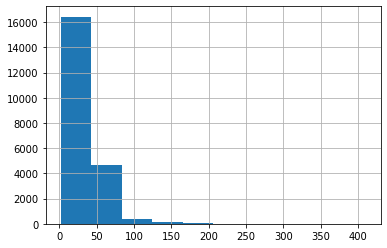

In [ ]:
# Для проверки
print(df['living_area'].isna().sum())
df['living_area'].hist()

In [ ]:
# заполняем
df.loc[df['living_area'].isna(),'living_area'] = df['total_area'] * df['living_to_total']

In [ ]:
# проверим строку с индексом 3
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,living_to_total
0,20,13000,108.0,2019-03-07,3,2.7,16,51.0,8,0,...,0,Санкт-Петербург,18863,16028,1,482,2,755,39,0.566667
1,7,3350,40.4,2018-12-04,1,2.6,11,18.6,1,0,...,2,посёлок Шушары,12817,18603,0,76,0,209,81,0.460396
2,10,5196,56.0,2015-08-20,2,2.6,5,34.3,4,0,...,0,Санкт-Петербург,21741,13933,1,90,2,574,558,0.589286
3,0,64900,159.0,2015-07-24,3,2.8,14,95.0,9,0,...,0,Санкт-Петербург,28098,6800,2,84,3,234,424,0.597484
4,2,10000,100.0,2018-06-19,2,3.0,14,32.0,13,0,...,0,Санкт-Петербург,31856,8098,2,112,1,48,121,0.570000


In [ ]:
# для проверки
df.shape[0]

23643

46


<AxesSubplot:>

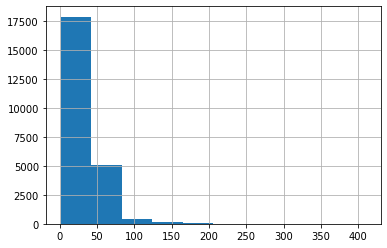

In [ ]:
# проверка
print(df['living_area'].isna().sum())
df['living_area'].hist()

**Вывод:**

Заполнил практически все пропуски. Оставшиеся принимаю решение убрать, потому что процент не велик. График частоыт не изменил свой вид и остался пропорционален

In [ ]:
# проделываем такие же махинации с kitchen_area
tmp_kitchen = df.loc[:,['total_area','kitchen_area']]

In [ ]:
tmp_kitchen = tmp_kitchen.loc[tmp_kitchen['kitchen_area'].isna()==False]
tmp_kitchen

,total_area,kitchen_area
0,108.0,25.00
1,40.4,11.00
2,56.0,8.30
4,100.0,41.00
5,30.4,9.10
...,...,...
23637,62.4,8.00
23638,133.8,13.83
23639,59.0,8.50
23641,76.8,23.30


In [ ]:
tmp_kitchen['kitchen_to_total'] = tmp_kitchen['kitchen_area'] / tmp_kitchen['total_area']

In [ ]:
del tmp_kitchen['kitchen_area']

In [ ]:
tmp_kitchen

,total_area,kitchen_to_total
0,108.0,0.231481
1,40.4,0.272277
2,56.0,0.148214
4,100.0,0.410000
5,30.4,0.299342
...,...,...
23637,62.4,0.128205
23638,133.8,0.103363
23639,59.0,0.144068
23641,76.8,0.303385


In [ ]:
tmp_kitchen_ratio = tmp_kitchen.groupby('total_area',as_index=False)['kitchen_to_total'].median()

In [ ]:
tmp_kitchen_ratio

,total_area,kitchen_to_total
0,14.0,0.142857
1,17.0,0.176471
2,18.0,0.166667
3,18.4,0.130435
4,20.0,0.280000
...,...,...
1368,590.0,0.169492
1369,618.0,0.113269
1370,631.0,0.095087
1371,631.2,0.030894


In [ ]:
df = pd.merge(df,tmp_kitchen_ratio ,on='total_area',how='left')


In [ ]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,living_to_total,kitchen_to_total
0,20,13000,108.0,2019-03-07,3,2.7,16,51.0,8,0,...,Санкт-Петербург,18863,16028,1,482,2,755,39,0.566667,0.130556
1,7,3350,40.4,2018-12-04,1,2.6,11,18.6,1,0,...,посёлок Шушары,12817,18603,0,76,0,209,81,0.460396,0.266832
2,10,5196,56.0,2015-08-20,2,2.6,5,34.3,4,0,...,Санкт-Петербург,21741,13933,1,90,2,574,558,0.589286,0.151786
3,0,64900,159.0,2015-07-24,3,2.8,14,95.0,9,0,...,Санкт-Петербург,28098,6800,2,84,3,234,424,0.597484,0.094340
4,2,10000,100.0,2018-06-19,2,3.0,14,32.0,13,0,...,Санкт-Петербург,31856,8098,2,112,1,48,121,0.570000,0.152500


2268


<AxesSubplot:>

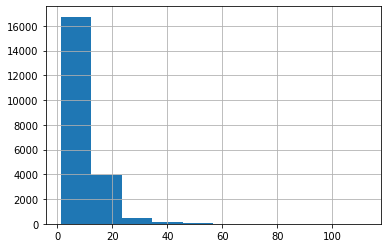

In [ ]:
print(df['kitchen_area'].isna().sum())
df['kitchen_area'].hist()

In [ ]:
df.loc[df['kitchen_area'].isna(),'kitchen_area'] = df['total_area'] * df['kitchen_to_total']

122


<AxesSubplot:>

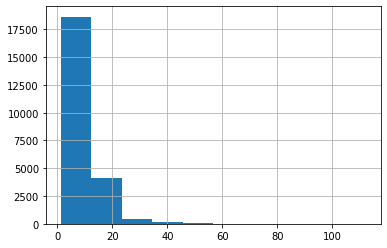

In [ ]:
# Проверка
print(df['kitchen_area'].isna().sum())
df['kitchen_area'].hist()

In [ ]:
# Удалим столбцы kitchen_to_total и living_to_total
df = df.drop(columns='kitchen_to_total',axis=1)
df = df.drop('living_to_total',axis=1)

In [ ]:
df.isna().mean()

total_images            0.000000
last_price              0.000000
total_area              0.000000
first_day_exposition    0.000000
rooms                   0.000000
ceiling_height          0.000000
floors_total            0.000000
living_area             0.001946
floor                   0.000000
is_apartment            0.000000
studio                  0.000000
open_plan               0.000000
kitchen_area            0.005160
balcony                 0.000000
locality_name           0.000000
airports_nearest        0.000000
city_centers_nearest    0.000000
parks_around3000        0.000000
parks_nearest           0.000000
ponds_around3000        0.000000
ponds_nearest           0.000000
days_exposition         0.000000
dtype: float64

In [ ]:
# Проверка
df.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'city_centers_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

**Вывод:**
Большую часть пропусков я заполнил, остальное удалю. Доля очень мала

In [ ]:
# для проверки
df.shape[0]

23643

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.reset_index(inplace=True)

In [ ]:
# Проверка
df.shape[0]

23503

In [ ]:
# Анализирую таблицу при помощи метода .describe()
df.describe()


,index,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,open_plan,kitchen_area,balcony,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23503.000000,23503.000000,23503.000000,23503.000000,23503.000000,23503.000000,23503.000000,23503.000000,23503.000000,23503.000000,...,23503.000000,23503.000000,23503.000000,23503.000000,23503.000000,23503.000000,23503.000000,23503.000000,23503.000000,23503.000000
mean,11817.812152,9.875888,6482.936519,60.113611,2.071821,2.702421,10.652257,34.478742,5.881632,0.002042,...,0.002298,10.433770,0.591967,29090.127686,14675.248904,0.469217,625.245884,0.589159,542.542569,196.848870
std,6826.904981,5.680210,10605.931199,34.313579,1.071179,0.239144,6.571468,21.764224,4.870961,0.045147,...,0.047879,5.738729,0.958925,14187.382387,9760.615178,0.748171,635.834879,0.882438,310.780053,259.068112
min,0.000000,0.000000,430.000000,14.000000,0.000000,2.000000,1.000000,2.000000,1.000000,0.000000,...,0.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,5904.500000,6.000000,3449.500000,40.000000,1.000000,2.600000,5.000000,18.700000,2.000000,0.000000,...,0.000000,7.000000,0.000000,18497.000000,9259.000000,0.000000,288.000000,0.000000,305.000000,45.000000
50%,11817.000000,9.000000,4650.000000,52.000000,2.000000,2.600000,9.000000,30.000000,4.000000,0.000000,...,0.000000,9.000000,0.000000,26662.000000,13108.000000,0.000000,453.000000,0.000000,516.000000,96.000000
75%,17728.500000,14.000000,6773.500000,69.600000,3.000000,2.800000,16.000000,42.300000,8.000000,0.000000,...,0.000000,11.800000,1.000000,37197.000000,16295.000000,1.000000,609.000000,1.000000,740.000000,232.000000
max,23642.000000,50.000000,763000.000000,900.000000,19.000000,8.300000,60.000000,409.700000,33.000000,1.000000,...,1.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


**Вывод:**

В столбце `rooms` есть случаи с 0 комнат. Это возможно студии, но студия считается за 1 комнатную квартиру, поэтому ищем сходство studio == 1 и заполняем там столбец `rooms` 1, дальше пробуем заполнить по цене, а если после этого останутся 0 до заполняем median по интервалу

In [ ]:
# смотрим сколько всего записей с 0 комнат
df.loc[df['rooms'] == 0]['rooms'].count()

158

In [ ]:
# смотрим сколько студий с 0 комнат
df.loc[((df['studio'] == 1) & df['rooms'] == 0)]['studio'].sum()

112

Видно, что мы можем заменить некоторые нули на единицы, а остальные отбросить

In [ ]:
# для проверки
df.loc[df['rooms'] == 1]['rooms'].count()

7979

In [ ]:
df.loc[((df['studio'] == 1) & (df['rooms'] == 0)), 'rooms'] = 1

In [ ]:
# Проверка
df.loc[df['rooms'] == 1]['rooms'].count()

8091

In [ ]:
# анализируем значения в столбце
df['rooms'].value_counts()

1     8091
2     7918
3     5781
4     1163
5      317
6      102
7       55
0       46
8       11
9        8
10       3
11       2
14       2
16       1
19       1
12       1
15       1
Name: rooms, dtype: int64

In [ ]:
# смотрим на уникальные значения в столбце total_area, где rooms = 0
df[df['rooms'] == 0]['total_area'].unique()


array([25. , 34.4, 35. , 23. , 22. , 24. , 28. , 31. , 32.3, 42.6, 30. ,
       27.3, 28.3, 26. , 27. , 28.2, 25.2, 31.1, 22.5, 29. , 20. , 30.5,
       21. , 28.5, 34. ])

**Вывод:**

Все объявления с `0` в столбце `rooms` можно дать значения `1`, потому что площадь подходит данной категории

In [ ]:
# Для проверки
df[df['rooms'] == 0]['rooms'].count()

46

In [ ]:
# заменяем
df.loc[df['rooms'] == 0,'rooms'] = 1

In [ ]:
# проверка
df[df['rooms'] == 0]['rooms'].count()

0

In [ ]:
# округлю df['kitchen_area'] до десятых
df['kitchen_area'] = round(df['kitchen_area'],1)

In [ ]:
# Проверка
df['kitchen_area']

0        25.0
1        11.0
2         8.3
3        15.0
4        41.0
         ... 
23498    13.8
23499     8.5
23500     8.4
23501    23.3
23502     9.0
Name: kitchen_area, Length: 23503, dtype: float64

In [ ]:
# Окончательные проверки по предобработке данных
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23503 entries, 0 to 23502
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   index                 23503 non-null  int64         
 1   total_images          23503 non-null  int64         
 2   last_price            23503 non-null  int64         
 3   total_area            23503 non-null  float64       
 4   first_day_exposition  23503 non-null  datetime64[ns]
 5   rooms                 23503 non-null  int64         
 6   ceiling_height        23503 non-null  float64       
 7   floors_total          23503 non-null  int64         
 8   living_area           23503 non-null  float64       
 9   floor                 23503 non-null  int64         
 10  is_apartment          23503 non-null  int64         
 11  studio                23503 non-null  int64         
 12  open_plan             23503 non-null  int64         
 13  kitchen_area    

In [ ]:
df.isna().mean()

index                   0.0
total_images            0.0
last_price              0.0
total_area              0.0
first_day_exposition    0.0
rooms                   0.0
ceiling_height          0.0
floors_total            0.0
living_area             0.0
floor                   0.0
is_apartment            0.0
studio                  0.0
open_plan               0.0
kitchen_area            0.0
balcony                 0.0
locality_name           0.0
airports_nearest        0.0
city_centers_nearest    0.0
parks_around3000        0.0
parks_nearest           0.0
ponds_around3000        0.0
ponds_nearest           0.0
days_exposition         0.0
dtype: float64

In [ ]:
df.describe()

,index,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,open_plan,kitchen_area,balcony,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23503.000000,23503.000000,23503.000000,23503.000000,23503.000000,23503.000000,23503.000000,23503.000000,23503.000000,23503.000000,...,23503.000000,23503.000000,23503.000000,23503.000000,23503.000000,23503.000000,23503.000000,23503.000000,23503.000000,23503.000000
mean,11817.812152,9.875888,6482.936519,60.113611,2.078543,2.702421,10.652257,34.478742,5.881632,0.002042,...,0.002298,10.433855,0.591967,29090.127686,14675.248904,0.469217,625.245884,0.589159,542.542569,196.848870
std,6826.904981,5.680210,10605.931199,34.313579,1.061247,0.239144,6.571468,21.764224,4.870961,0.045147,...,0.047879,5.738692,0.958925,14187.382387,9760.615178,0.748171,635.834879,0.882438,310.780053,259.068112
min,0.000000,0.000000,430.000000,14.000000,1.000000,2.000000,1.000000,2.000000,1.000000,0.000000,...,0.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,5904.500000,6.000000,3449.500000,40.000000,1.000000,2.600000,5.000000,18.700000,2.000000,0.000000,...,0.000000,7.000000,0.000000,18497.000000,9259.000000,0.000000,288.000000,0.000000,305.000000,45.000000
50%,11817.000000,9.000000,4650.000000,52.000000,2.000000,2.600000,9.000000,30.000000,4.000000,0.000000,...,0.000000,9.000000,0.000000,26662.000000,13108.000000,0.000000,453.000000,0.000000,516.000000,96.000000
75%,17728.500000,14.000000,6773.500000,69.600000,3.000000,2.800000,16.000000,42.300000,8.000000,0.000000,...,0.000000,11.800000,1.000000,37197.000000,16295.000000,1.000000,609.000000,1.000000,740.000000,232.000000
max,23642.000000,50.000000,763000.000000,900.000000,19.000000,8.300000,60.000000,409.700000,33.000000,1.000000,...,1.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


### Вывод

Все задачи, поставленные мной выше, выполенены.



In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23503 entries, 0 to 23502
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   index                 23503 non-null  int64         
 1   total_images          23503 non-null  int64         
 2   last_price            23503 non-null  int64         
 3   total_area            23503 non-null  float64       
 4   first_day_exposition  23503 non-null  datetime64[ns]
 5   rooms                 23503 non-null  int64         
 6   ceiling_height        23503 non-null  float64       
 7   floors_total          23503 non-null  int64         
 8   living_area           23503 non-null  float64       
 9   floor                 23503 non-null  int64         
 10  is_apartment          23503 non-null  int64         
 11  studio                23503 non-null  int64         
 12  open_plan             23503 non-null  int64         
 13  kitchen_area    

In [ ]:
# Добавляем столбец цену квадратного метра
df['cost_per_m2'] = (df['last_price'] * 1_000) / df['total_area']
df['cost_per_m2']= df['cost_per_m2'].astype('int64')

In [ ]:
# Проверка
df.head()

,index,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,...,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,cost_per_m2
0,0,20,13000,108.0,2019-03-07,3,2.7,16,51.0,8,...,0,Санкт-Петербург,18863,16028,1,482,2,755,39,120370
1,1,7,3350,40.4,2018-12-04,1,2.6,11,18.6,1,...,2,посёлок Шушары,12817,18603,0,76,0,209,81,82920
2,2,10,5196,56.0,2015-08-20,2,2.6,5,34.3,4,...,0,Санкт-Петербург,21741,13933,1,90,2,574,558,92785
3,3,0,64900,159.0,2015-07-24,3,2.8,14,95.0,9,...,0,Санкт-Петербург,28098,6800,2,84,3,234,424,408176
4,4,2,10000,100.0,2018-06-19,2,3.0,14,32.0,13,...,0,Санкт-Петербург,31856,8098,2,112,1,48,121,100000


## Расчёты и добавление результатов в таблицу

In [ ]:
# Достаем день недели, месяц, год и создаем соответствующие стобцы
def date_sep(column,new,dmy):
    try:
        if dmy == 'weekday':
            df[new] = df[column].dt.weekday
        elif dmy == 'month':
            df[new] = df[column].dt.month
        elif dmy == 'year':
            df[new] = df[column].dt.year
    except Exception as ex:
        print(ex)
        return print('Вводи внимательнее')
def get_weekday(value):
    return value.isocalendar().weekday()

In [ ]:
# применяю функции к нужным столбцам
date_sep('first_day_exposition','weekday','weekday')
date_sep('first_day_exposition','month','month')
date_sep('first_day_exposition','year','year')

In [ ]:
# проверка
df.head()

,index,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,...,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,cost_per_m2,weekday,month,year
0,0,20,13000,108.0,2019-03-07,3,2.7,16,51.0,8,...,16028,1,482,2,755,39,120370,3,3,2019
1,1,7,3350,40.4,2018-12-04,1,2.6,11,18.6,1,...,18603,0,76,0,209,81,82920,1,12,2018
2,2,10,5196,56.0,2015-08-20,2,2.6,5,34.3,4,...,13933,1,90,2,574,558,92785,3,8,2015
3,3,0,64900,159.0,2015-07-24,3,2.8,14,95.0,9,...,6800,2,84,3,234,424,408176,4,7,2015
4,4,2,10000,100.0,2018-06-19,2,3.0,14,32.0,13,...,8098,2,112,1,48,121,100000,1,6,2018


In [ ]:
# Делаем категоризацию значений в стобце floor и создаем оный столбец
def category_floor(row):
    if row['floor'] == 1:
        return 'Первый'
    elif row['floors_total'] == row['floor']:
        return 'Последний'
    return 'Другой'


In [ ]:
# применим фунцию к floor_category
df['floor_category'] = df.apply(category_floor,axis=1)

In [ ]:
# проверка
df.head()

,index,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,cost_per_m2,weekday,month,year,floor_category
0,0,20,13000,108.0,2019-03-07,3,2.7,16,51.0,8,...,1,482,2,755,39,120370,3,3,2019,Другой
1,1,7,3350,40.4,2018-12-04,1,2.6,11,18.6,1,...,0,76,0,209,81,82920,1,12,2018,Первый
2,2,10,5196,56.0,2015-08-20,2,2.6,5,34.3,4,...,1,90,2,574,558,92785,3,8,2015,Другой
3,3,0,64900,159.0,2015-07-24,3,2.8,14,95.0,9,...,2,84,3,234,424,408176,4,7,2015,Другой
4,4,2,10000,100.0,2018-06-19,2,3.0,14,32.0,13,...,2,112,1,48,121,100000,1,6,2018,Другой


In [ ]:
# Создаю функцию для столбцов с отношением
def area_to_total(column,name):
    df[name] = df[column] / df['total_area']

In [ ]:
# применим функцию для получения новых столбцов
area_to_total('living_area','living_to_total')
area_to_total('kitchen_area','kitchen_to_total')

In [ ]:
# Проверка
df.head(5)

,index,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,...,ponds_around3000,ponds_nearest,days_exposition,cost_per_m2,weekday,month,year,floor_category,living_to_total,kitchen_to_total
0,0,20,13000,108.0,2019-03-07,3,2.7,16,51.0,8,...,2,755,39,120370,3,3,2019,Другой,0.472222,0.231481
1,1,7,3350,40.4,2018-12-04,1,2.6,11,18.6,1,...,0,209,81,82920,1,12,2018,Первый,0.460396,0.272277
2,2,10,5196,56.0,2015-08-20,2,2.6,5,34.3,4,...,2,574,558,92785,3,8,2015,Другой,0.612500,0.148214
3,3,0,64900,159.0,2015-07-24,3,2.8,14,95.0,9,...,3,234,424,408176,4,7,2015,Другой,0.597484,0.094340
4,4,2,10000,100.0,2018-06-19,2,3.0,14,32.0,13,...,1,48,121,100000,1,6,2018,Другой,0.320000,0.410000


## Исследовательский анализ данных

In [ ]:
# смотрим на максимальную площадь в столбце total_area
df['total_area'].max()

900.0

In [ ]:
# создаем функцию для построения гистограммы с 2-мя мерами центральной тенденции
def make_a_hist(title,
                xlabel_hist,
                column,
                axvline_median_label,
                axvline_mean_label,
                variation_value,
                ylabel_hist='n_time',
                bins=50,
                edgecolor='black',
                log=True,
                axvline_median_color='red',
                axvline_mean_color = 'yellow',
                linewidth_median=2,
                linewidth_mean=2):
    print(f'Среднее значение столбца {title} равно {round(column.mean(),2)} {variation_value}.')
    print('-'*50)
    print(f'Медианное значение столбца {title} равно {round(column.median(),2)} {variation_value}.')
    plt.title(title)
    plt.xlabel(xlabel_hist)
    plt.ylabel(ylabel_hist)
    plt.hist(column,bins=bins,edgecolor=edgecolor,log=log)
    plt.axvline(column.median(),color=axvline_median_color,label=axvline_median_label,linewidth=linewidth_median)
    plt.axvline(column.mean(),color=axvline_mean_color,label=axvline_mean_label,linewidth=linewidth_mean)
    plt.legend()

Среднее значение столбца total_area равно 60.11 квадратных метров.
--------------------------------------------------
Медианное значение столбца total_area равно 52.0 квадратных метров.


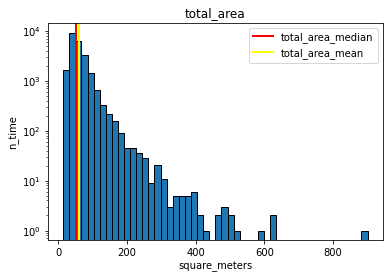

In [ ]:
# строим гистрограмму для total_area
make_a_hist(title='total_area',
            xlabel_hist='square_meters',
            axvline_median_label='total_area_median',
            axvline_mean_label='total_area_mean',
            variation_value ='квадратных метров',
            column=df['total_area'])

In [ ]:
# сколько всего записей в total_area больше 520
len(df.query('total_area > 520'))

4

**Вывод:**
* `total_area` - медианное и среднее значение немного отличаются, 60.11 и 52 квадратных метра соответсвенно, мода близка к медианному значению. Частота распределение напоминает логнормальное распределение. Присутствуют выбросы, к ним можно отнести квартиры c площадью больше 520 их всего 4. Для улучшения графиков стоит удалить в дальнейшем из выборки эти объявления. С увеличением количества общей площади, количество квартир с данной площадью уменьшается


Среднее значение столбца living_area равно 34.48 квадратных метров.
--------------------------------------------------
Медианное значение столбца living_area равно 30.0 квадратных метров.


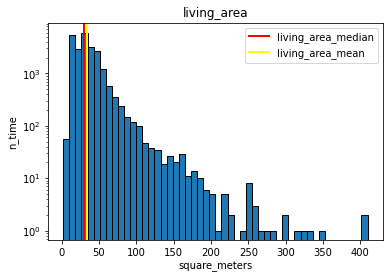

In [ ]:
# строим гистрограмму для living_area
make_a_hist(title='living_area',
            xlabel_hist='square_meters',
            axvline_median_label='living_area_median',
            axvline_mean_label='living_area_mean',
            variation_value ='квадратных метров',
            column=df['living_area'])

In [ ]:
# сколько всего записей в living_area больше 350

len(df.query('living_area > 350'))

2

**Вывод:**

* `living_area` - Меры центральной тендеции лежат в одном интервале. В выборке присутствует мода. Частота распределения также совпадает с логнормальным, выбросы присутствуют с жилой площадью более 350 метров, их количество равно 2. Эти данные стоит удалить для улучшения картинки. Делаю вывод, что с увеличением жилой площади квартиры редкость таких кватир увеличивается, то есть частота таких объявлений снижается

Среднее значение столбца kitchen_area равно 10.43 квадратных метров.
--------------------------------------------------
Медианное значение столбца kitchen_area равно 9.0 квадратных метров.


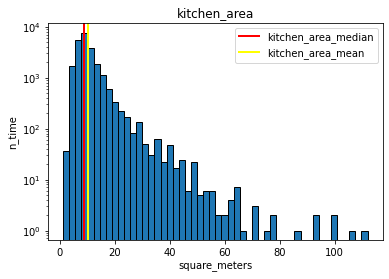

In [ ]:
# строим гистрограмму для kitchen_area
make_a_hist(title='kitchen_area',
            xlabel_hist='square_meters',
            axvline_median_label='kitchen_area_median',
            axvline_mean_label='kitchen_area_mean',
            variation_value ='квадратных метров',
            column=df['kitchen_area'])

In [ ]:
# сколько всего записей в kitchen_area больше 80

len(df.query('kitchen_area > 80'))

7

**Вывод:**

* `kitchen_area` - Меры центральной тенденции лежат в одном узком интервале, медиана несильно отличается от среднего значения по столбцу. Частота распределения похожа на логнормальное. Выбросами буду считать кухни с площадью больше 80 - их я удалю из выборки. С увеличением площади кухни, количество квартир с такими же характеристиками уменьшается.


Среднее значение столбца living_to_total равно 0.56 сотых.
--------------------------------------------------
Медианное значение столбца living_to_total равно 0.57 сотых.


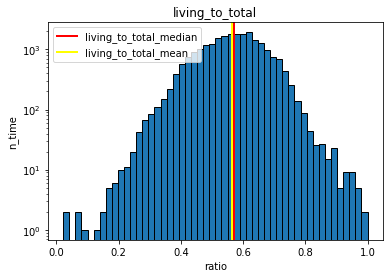

In [ ]:
# строим гистрограмму для living_to_total
make_a_hist(title='living_to_total',
            xlabel_hist='ratio',
            axvline_median_label='living_to_total_median',
            axvline_mean_label='living_to_total_mean',
            variation_value ='сотых',
            column=df['living_to_total'])

In [ ]:
# смотрим, что за аномальные значения в таблице
df.loc[((df['living_to_total'] < 0.15) & (df['living_to_total'] < 100)),['total_area','living_area','kitchen_area']]

,total_area,living_area,kitchen_area
2297,62.4,8.4,41.0
3221,41.0,3.0,11.0
13811,52.0,2.0,9.0
21582,23.0,2.0,5.0
21765,77.6,5.4,9.8
23200,92.0,13.0,10.0
23379,139.0,3.0,16.0


In [ ]:
# сколько всего записей в living_to_total меньше 0.15
len(df.query('living_to_total < 0.15'))

7

**Вывод:**
* `living_to_total` - медиана и среднее значение в столбце практически совпадают, мода лежит немного правее. Частота распределения похоже либо на нормальное, либо на бета распределиние. Выбросами буду считать отношение меньше 0.15(Аномалии) - удалю их из выборки. Больше всего квартир с около 50%-65% жилой площадью от общей.

Среднее значение столбца kitchen_to_total равно 0.19 сотых.
--------------------------------------------------
Медианное значение столбца kitchen_to_total равно 0.17 сотых.


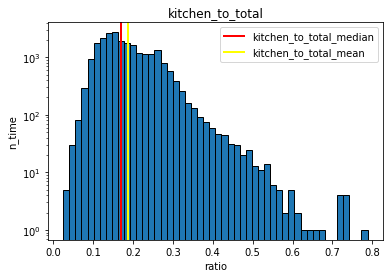

In [ ]:
# строим гистрограмму для kitchen_to_total
make_a_hist(title='kitchen_to_total',
            xlabel_hist='ratio',
            axvline_median_label='kitchen_to_total_median',
            axvline_mean_label='kitchen_to_total_mean',
            variation_value ='сотых',
            column=df['kitchen_to_total'])

In [ ]:
# с общей площаью меньше 100
df.loc[((df['kitchen_to_total'] < 0.05) & (df['total_area'] < 100)),['total_area','living_area','kitchen_area']]

,total_area,living_area,kitchen_area
7897,66.4,44.4,2.9
20054,28.5,19.5,1.3


In [ ]:
# # сколько всего записей в kitchen_to_total меньше 0.05 и больше 0.7
len(df.query('kitchen_to_total < 0.05 or kitchen_to_total > 0.7'))

29

**Вывод:**

* `kitchen_to_total` - Медиана и среднее значение практически совпадают. Мода лежит левее обоих значений.Частота распредления напоминает Хи-квадрат или гамма распределения. Выбросами буду считать площадь кухни меньше 5 процентов - со значением общей площади меньше 100 квадратных метров и больше 70% - удалю эти данные из выборки. Обычно всего кухня не превышает 1/3 от общей площади квартиры, кухня с большим отношением к общей площади встречаются реже с каждым увеличением оной.

Среднее значение столбца last_price равно 6482.94 тысяч рублей.
--------------------------------------------------
Медианное значение столбца last_price равно 4650.0 тысяч рублей.


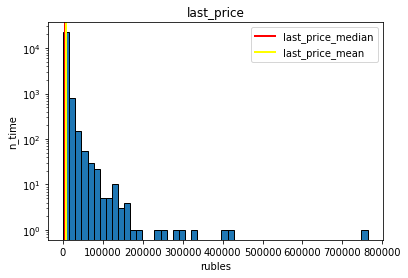

In [ ]:
# строим гистрограмму для last_price
make_a_hist(title='last_price',
            xlabel_hist='rubles',
            axvline_median_label='last_price_median',
            axvline_mean_label='last_price_mean',
            variation_value ='тысяч рублей',
            column=df['last_price'])

In [ ]:
# смотрим, сколько всего записей в last_price больше 200_000
len(df.query('last_price > 200_000'))

8

**Вывод:**

* `last_price` - среднее значение довольно сильно отличается от медианного в силу наличия выбросов. К оным я буду причислять квартиры с ценой выше 200 миллионов. Мода лежит в том же интервале, что и медианное и среднее значения. Частота схожа c геометрическим распределением. С увеличением цены на квартиру, частота существования таких объявлений существенно падает.


Среднее значение столбца rooms_amount равно 2.08 комнат.
--------------------------------------------------
Медианное значение столбца rooms_amount равно 2.0 комнат.


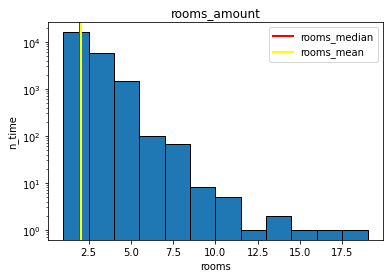

In [ ]:
# создаем гистограмму для rooms
make_a_hist(title='rooms_amount',
            xlabel_hist='rooms',
            axvline_median_label='rooms_median',
            axvline_mean_label='rooms_mean',
            bins=12,
            variation_value ='комнат',
            column=df['rooms'])

**Вывод:**

* `rooms` - Мода выборки - 1 комната. Медиана и среднее совпадает. Здесь можно оставить все на своих местах. Частота похожа на экспоненциональное распределние. Так же как и в график выше, чем выше значения признака, тем реже попадается квартиры с оными признакми


Среднее значение столбца ceiling_height равно 2.7 метра.
--------------------------------------------------
Медианное значение столбца ceiling_height равно 2.6 метра.


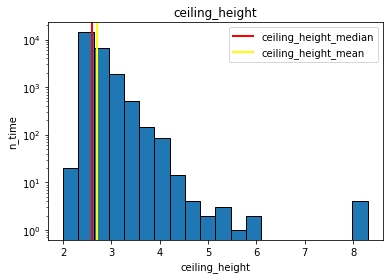

In [ ]:
# создаем гистограмму для ceiling_height

make_a_hist(title='ceiling_height',
            xlabel_hist='ceiling_height',
            axvline_median_label='ceiling_height_median',
            axvline_mean_label='ceiling_height_mean',
            bins=20,
            variation_value ='метра',
            column=df['ceiling_height'])

In [ ]:
# сколько всего записей в ceiling_height больше 7

len(df.query('ceiling_height > 7'))

4

**Вывод:**

* `ceiling_height` - Медиана и среднее значение практически совпадают, присутствуют явные выбросы - это потолки выше 7 метров. Чаще всего встречаются потолки высотой в 2.6 метра



Среднее значение столбца days_exposition равно 196.85 дней.
--------------------------------------------------
Медианное значение столбца days_exposition равно 96.0 дней.


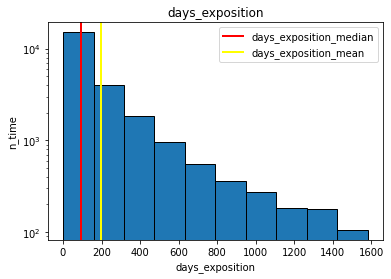

In [ ]:
# создаем гистограмму для days_exposition
make_a_hist(title='days_exposition',
            xlabel_hist='days_exposition',
            axvline_median_label='days_exposition_median',
            axvline_mean_label='days_exposition_mean',
            variation_value ='дней',
            bins=10,
            column=df['days_exposition'])

Среднее значение столбца days_exposition равно 196.85 дней.
--------------------------------------------------
Медианное значение столбца days_exposition равно 96.0 дней.


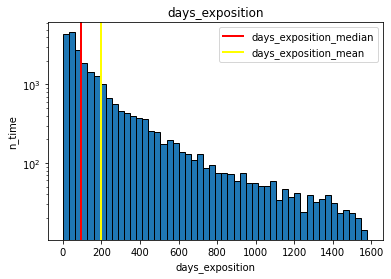

In [ ]:
# создаем гистограмму для days_exposition с бОльшими масштабом
make_a_hist(title='days_exposition',
            xlabel_hist='days_exposition',
            axvline_median_label='days_exposition_median',
            axvline_mean_label='days_exposition_mean',
            variation_value ='дней',
            column=df['days_exposition'])

### Общий вывод:
В большой части столбцов присутствуют выбросы и аномалии, которые стоит удалить из выборки для дальнейшего анализа.


In [ ]:
# функции для автоматизации графика рассеяния и корреляции
def scatter_graph(data,x,y,alpha,grid=True):
    data.plot(x=x,y=y,kind='scatter',grid=grid,alpha=alpha)
    plt.show
def corr_calc(column_1,column_2):
    print(f'Корреляция между столбцами равна {round(column_1.corr(column_2),2)}')

In [ ]:
# код после проверки v1 по комментарию 5.1.0.1
tmp_ratio = (df.query('total_area < 520')
    .query('living_area < 350')
    .query('kitchen_area < 80')
    .query('living_to_total > 0.15')
    .query('kitchen_to_total > 0.05 and kitchen_to_total < 0.7')
    .query('last_price < 200_000')
    .query('ceiling_height < 7')
                )

In [ ]:
# код после проверки v1 по комментарию 5.1.0.1  + ниже вывод
(df.shape[0] - tmp_ratio.shape[0])/df.shape[0]

0.002297579032463941

**Вывод:**

Можем спокойно отбросить данные выбросы, поскольку они состовляют менее 10% от всей выборки - 0.02%

In [ ]:
# Получим копию основого DF без выбросов
outliers_free = (df.query('total_area < 520')
    .query('living_area < 350')
    .query('kitchen_area < 80')
    .query('living_to_total > 0.15')
    .query('kitchen_to_total > 0.05 and kitchen_to_total < 0.7')
    .query('last_price < 200_000')
    .query('ceiling_height < 7')
                )

In [ ]:
# Проверки
print(len(outliers_free.query('total_area > 520')))
print(len(outliers_free.query('living_area > 350')))
print(len(outliers_free.query('kitchen_area > 80')))
print(len(outliers_free.query('living_to_total < 0.15')))
print(len(outliers_free.query('kitchen_to_total < 0.05 or kitchen_to_total > 0.7')))
print(len(outliers_free.query('last_price > 200_000')))
print(len(outliers_free.query('ceiling_height > 7')))

0
0
0
0
0
0
0


In [ ]:
df.shape[0]

23503

In [ ]:
# создаем таблицу для удобства без текстовых значений и без ранговых с категориальными
scatter_tmp = outliers_free.drop(
    ['first_day_exposition','is_apartment','studio','open_plan','locality_name','floor_category'],
    axis=1)

In [ ]:
df.shape[0] - outliers_free.shape[0]

54

**Вывод:**
    
Все выбросы удалены. Продолжим работу с новым DF.

Корреляция между столбцами равна 0.12


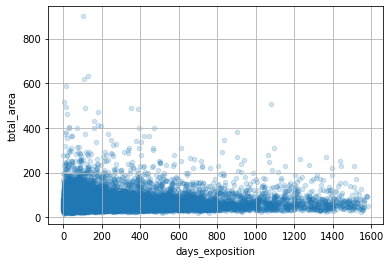

In [ ]:
# строим диаграмму рассеяния и находим корреляцию
scatter_graph(df,'days_exposition','total_area',alpha=0.2)
corr_calc(df.total_area,df.days_exposition)

**Вывод:**
* `days_exposition` - здесь практически чистое эскпоненциональное распределение частоты. Среднее дальше медианного значения, поскольку размах выборки достаточно велик. Явных выбросов нет. Также присутствует мода. Из графика видно, что обычно квартиры продают примерно за 6 месяцев - это довольно-таки быстро, и обычно происходит так. Все, что больше этого промежутка времени можно считать необычно долго. Из графика рассеяния также видно, что квартира с большой площадью в основном продаются быстрее, чем квартиры меньшего размеры - это очень отчетливо видно из уменьшающейся плоности со временем относительно площади.


<AxesSubplot:>

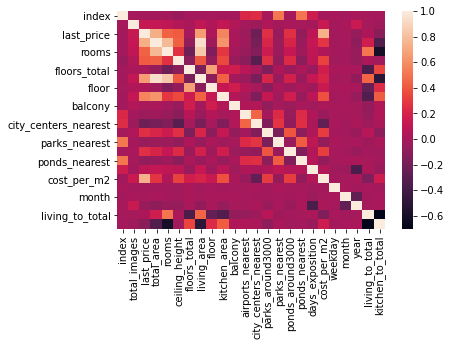

In [ ]:
# строим карту температуры корреляции
sns.heatmap(scatter_tmp.corr())

array([[<AxesSubplot:xlabel='index', ylabel='index'>,
        <AxesSubplot:xlabel='total_images', ylabel='index'>,
        <AxesSubplot:xlabel='last_price', ylabel='index'>,
        <AxesSubplot:xlabel='total_area', ylabel='index'>,
        <AxesSubplot:xlabel='rooms', ylabel='index'>,
        <AxesSubplot:xlabel='ceiling_height', ylabel='index'>,
        <AxesSubplot:xlabel='floors_total', ylabel='index'>,
        <AxesSubplot:xlabel='living_area', ylabel='index'>,
        <AxesSubplot:xlabel='floor', ylabel='index'>,
        <AxesSubplot:xlabel='is_apartment', ylabel='index'>,
        <AxesSubplot:xlabel='studio', ylabel='index'>,
        <AxesSubplot:xlabel='open_plan', ylabel='index'>,
        <AxesSubplot:xlabel='kitchen_area', ylabel='index'>,
        <AxesSubplot:xlabel='balcony', ylabel='index'>,
        <AxesSubplot:xlabel='airports_nearest', ylabel='index'>,
        <AxesSubplot:xlabel='city_centers_nearest', ylabel='index'>,
        <AxesSubplot:xlabel='parks_around3000', yl

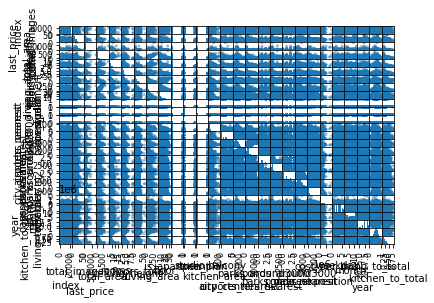

In [ ]:
# к комментарию v1 ниже

pd.plotting.scatter_matrix(df)

In [ ]:
# Найдем все корреляции между стоимостью квартиры и другими факторами
for j in scatter_tmp.columns:
    if  ((j != 'last_price' and  j != 'cost_per_m2' and j != 'total_images') and (
scatter_tmp['last_price'].corr(scatter_tmp[j]) >= 0.1 or
scatter_tmp['last_price'].corr(scatter_tmp[j]) <= -0.1)):
        print('last_price',j,sep=' и ')
        print(round(scatter_tmp['last_price'].corr(scatter_tmp[j]),2))

last_price и total_area
0.73
last_price и rooms
0.44
last_price и ceiling_height
0.41
last_price и living_area
0.66
last_price и kitchen_area
0.57
last_price и city_centers_nearest
-0.22
last_price и parks_around3000
0.26
last_price и ponds_around3000
0.26
last_price и kitchen_to_total
-0.11


In [ ]:
# создаем вспомогательную временную таблицу для интервальной категории
# схожий с np.digitize
digitise_tmp = outliers_free.loc[:,['last_price','floor_category']]

In [ ]:
# смотрим на таблицу
digitise_tmp

,last_price,floor_category
0,13000,Другой
1,3350,Первый
2,5196,Другой
3,64900,Другой
4,10000,Другой
...,...,...
23498,9700,Другой
23499,3100,Другой
23500,2500,Первый
23501,11475,Другой


In [ ]:
def floor_digitize(row):
    if 'Первый' in row['floor_category']:
        return 1
    elif 'Другой'in row['floor_category']:
        return 2
    return 3


In [ ]:
# применяю функцию к нужному dataframe
digitise_tmp['floor_digitize'] = digitise_tmp.apply(floor_digitize, axis=1)

In [ ]:
# Применем категоризацию для анализа
# Первый-1, Другой - 2, последний - 3
digitise_tmp

,last_price,floor_category,floor_digitize
0,13000,Другой,2
1,3350,Первый,1
2,5196,Другой,2
3,64900,Другой,2
4,10000,Другой,2
...,...,...,...
23498,9700,Другой,2
23499,3100,Другой,2
23500,2500,Первый,1
23501,11475,Другой,2


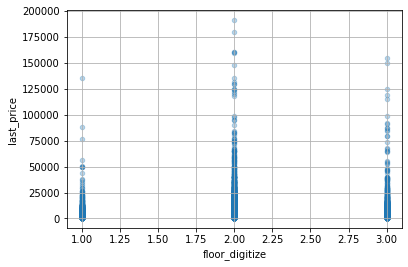

In [ ]:
# строим диаграмму рассеяния и находим корреляцию
scatter_graph(digitise_tmp,'floor_digitize','last_price',alpha=0.3)


In [ ]:
# функция для построение ящика с усами для этажа
def mustache_plot_dig(data,column,by,grid=True):
    box = data.boxplot(column=column,by=by).get_figure()
    box.suptitle('')
    plt.hlines(y=45_000,xmin=.9,xmax=1.1, color='b', linestyle='-')
    plt.hlines(y=59_000,xmin=0.9,xmax=1.1,color='b', linestyle='-')
    plt.hlines(y=114_000,xmin=1.9,xmax=2.1, color='r', linestyle='--')
    plt.hlines(y=139_000,xmin=1.9,xmax=2.1, color='r', linestyle='--')
    plt.hlines(y=60_000, xmin=2.9,xmax=3.1,color='orange', linestyle='-')
    plt.hlines(y=94_000,xmin=2.9,xmax=3.1, color='orange', linestyle='-')
    print(box)

Figure(432x288)


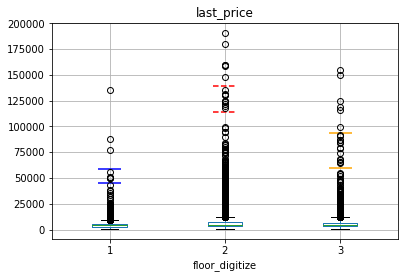

In [ ]:
# Интервалы отмечены для каждой категории этажей синий, красный, оранжевый соответсвенно
mustache_plot_dig(digitise_tmp,'last_price',by='floor_digitize')

In [ ]:
# создаем сводную таблицу по ранговым згначениям этажа и
# вычисляем там количество среднюю стоимость и медианную
pivot_floor_dig = digitise_tmp.pivot_table(index='floor_digitize',values=('last_price'),aggfunc={'count','mean','median'})

In [ ]:
digitise_tmp

,last_price,floor_category,floor_digitize
0,13000,Другой,2
1,3350,Первый,1
2,5196,Другой,2
3,64900,Другой,2
4,10000,Другой,2
...,...,...,...
23498,9700,Другой,2
23499,3100,Другой,2
23500,2500,Первый,1
23501,11475,Другой,2


In [ ]:
pivot_floor_dig.reset_index(inplace=True)

In [ ]:
pivot_floor_dig

,floor_digitize,count,mean,median
0,1,2882.0,4763.318182,3900.0
1,2,17263.0,6550.485084,4850.0
2,3,3304.0,6418.529964,4300.0


In [ ]:
# Функция для гистограмы с датами
def date_hist(title,
              column,
              xlabel_date_hist,
              ylabel_date_hist,
              bins,
              edgecolor='black',
              grid=True,
              log=True):
    plt.title(title)
    plt.xlabel(xlabel_date_hist)
    plt.ylabel(ylabel_date_hist)
    plt.hist(column,bins=bins,edgecolor=edgecolor,log=log)

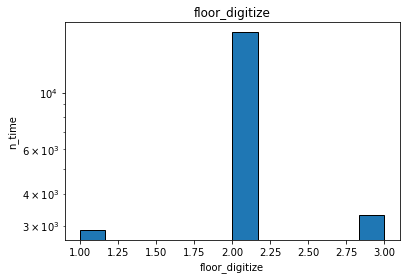

In [ ]:
date_hist(title='floor_digitize',
            xlabel_date_hist='floor_digitize',
            ylabel_date_hist='n_time',
            bins=12,
            column=digitise_tmp['floor_digitize'])

**Вывод:**

На графиках видны выбросы из ящика и рассеяния. По увеличению стоимости здесь просматривается нелинейная зависимость. Самые дешевые квартиры на 1 этаже - это происходит в силу устаявшихся правил на рынке недвижимости - квартиры на первом этаже неликвидный актив(также и со вторым этажом), спроса мало на такие квартиры - соответственно их тяжлее продать.

Анализируя гистограмму можем заметить, что больше всего объявлений с 2-ого по предпоследний этаж, меньше всего 1 этажей и на втором месте по количеству.

Похожее правило касается последнего этажа в доме, но все-таки это не первый этаж, поэтому цена немного отличается. Можно увидеть на графиках, что присутствуют на интервала сосредоточения цены. Также размах выше по сравнению с первым этажом.

**Рейтинг этажности по медианной цене:**
1. *Другой* - 4850 тысяч рублей
2. *Последний* - 4300 тысяч рублей
3. *Первый* - 3900 тысяч рублей

Может показаться, что цены одинаковые на других и на последнем этаже, если смотреть на среднее значение. Однако при наличии вбросов лучше не смотреть на среднее значения, а смотреть на медианное, как я и сделал.

In [ ]:
# Смотри на линейную зависимость от этажности квартиры
digitise_tmp.corr()

,last_price,floor_digitize
last_price,1.00000,0.05409
floor_digitize,0.05409,1.00000


**Вывод:**

Прослеживается очень низкая положительная корреляция.

In [ ]:
# проведем анализ по дню недели, месяцу и году
date_tmp = outliers_free.loc[:,['last_price','weekday','month','year']]

In [ ]:
date_tmp

,last_price,weekday,month,year
0,13000,3,3,2019
1,3350,1,12,2018
2,5196,3,8,2015
3,64900,4,7,2015
4,10000,1,6,2018
...,...,...,...,...
23498,9700,1,3,2017
23499,3100,0,1,2018
23500,2500,6,2,2018
23501,11475,1,3,2017


In [ ]:
def piv_to_date(data,index,values,name,aggfunc={'median'}):
     name = data.pivot_table(index=index,values=values,aggfunc=aggfunc)
     name.reset_index(inplace=True)
     return name

In [ ]:
piv_week = piv_to_date(date_tmp,'weekday','last_price','piv_week')

In [ ]:
date_tmp

,last_price,weekday,month,year
0,13000,3,3,2019
1,3350,1,12,2018
2,5196,3,8,2015
3,64900,4,7,2015
4,10000,1,6,2018
...,...,...,...,...
23498,9700,1,3,2017
23499,3100,0,1,2018
23500,2500,6,2,2018
23501,11475,1,3,2017


In [ ]:
piv_week

,weekday,median
0,0,4650
1,1,4700
2,2,4700
3,3,4650
4,4,4590
5,5,4550
6,6,4550


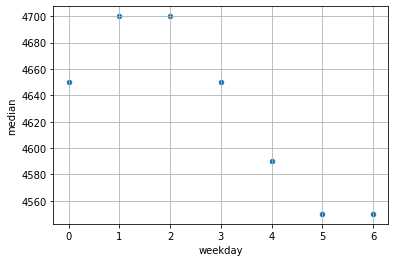

In [ ]:
scatter_graph(piv_week,'weekday','median',alpha=1)

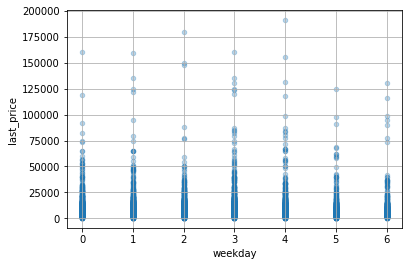

In [ ]:
# строим матрицу рассеяния для дней недели и их корреляцию с ценой
scatter_graph(date_tmp,'weekday','last_price',alpha=0.3)


In [ ]:
# Функция для гистограмы с датами
def date_hist(title,
              column,
              xlabel_date_hist,
              ylabel_date_hist,
              bins,
              edgecolor='black',
              grid=True,
              log=True):
    plt.title(title)
    plt.xlabel(xlabel_date_hist)
    plt.ylabel(ylabel_date_hist)
    plt.hist(column,bins=bins,edgecolor=edgecolor,log=log)


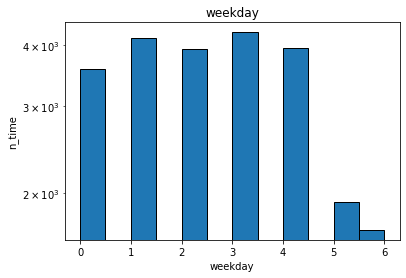

In [ ]:
# строим гистограму по дням недели
date_hist(title='weekday',
            xlabel_date_hist='weekday',
            ylabel_date_hist='n_time',
            bins=12,
            column=outliers_free['weekday'])

In [ ]:
# создали функцию для создание сводной таблицы по дате
def pivot_by_date(data,index,values='last_price',aggfunc={'median','mean','count'}):
    return data.pivot_table(index=index,values=values,aggfunc=aggfunc).astype('int',errors='raise')



In [ ]:
# строим сводную таблцу с числом объявлений, средней и медианной ценной группирую по дням недели

pivot_by_weekday = pivot_by_date(outliers_free,'weekday')

In [ ]:
# сортируем по количеству объявлений
pivot_by_weekday.sort_values(by='count',ascending=True)

,count,mean,median
weekday,,,
6,1682,6216,4550
5,1920,6085,4550
0,3578,6320,4650
2,3924,6271,4700
4,3955,6234,4590
1,4141,6250,4700
3,4249,6615,4650


**Вывод:**

Из сводной таблицы, гистограммы и графика рассеяния видно, что в основном прослеживается логичная закономерность. Люди намного нереже публикуют объявления на выходных - суббота и воскресенье. Начиная с пятницы наблюдается существенный спад количества объявлений.

С понедельника, как начинается рабочая неделя, люди активизируются и начинают публиковать объявления с каждым днем все больше и больше, пока не наступит суббота - там наблюдается существенный спад в количестве оных.

Зависимость от цены, конечно, не наблюдается, по крайней мере линейная, поскольку коэффициент корреляция Пирсона очень близок к `0`, однако он отрицательный. В целом, медианная стоимость квартиры практически не различается по дня недели.

**Заметный спад** (по возрастанию кол-ва):
1. *Воскресенье* - 1682
2. *Суббота* - 1920

**Двойка лидеров по кол-ву объвлений** (по убыванию кол-ва):
1. *Четверг* - 4249
2. *Вторник* - 4141

Самый "дорогой" день недели:

- *Вторник* и *Среда* делят первое место 4700 тысяч рублей

Самый "дешевый" день недели:

- *Суббота* и *Воскресенье* делят последнее место 4550 тысяч рублей

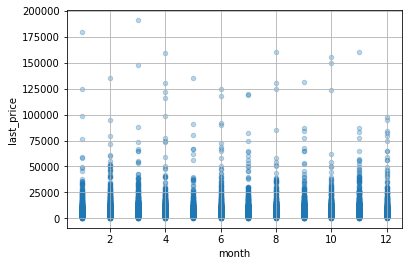

In [ ]:
# строим матрицу рассеяния для месяцев и их корреляцию с ценой
scatter_graph(date_tmp,'month','last_price',alpha=0.3)


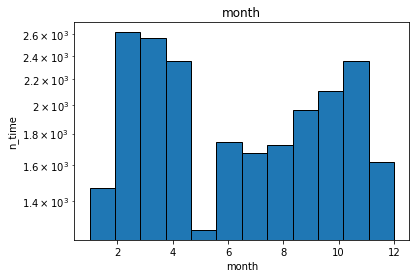

In [ ]:
# строим гистограму по месяцам
date_hist(title='month',
            xlabel_date_hist='month',
            ylabel_date_hist='n_time',
            bins=12,
            column=outliers_free['month'])

In [ ]:
piv_month = piv_to_date(date_tmp,'month','last_price','piv_month')

In [ ]:
piv_month

,month,median
0,1,4600
1,2,4650
2,3,4690
3,4,4800
4,5,4500
5,6,4400
6,7,4650
7,8,4590
8,9,4700
9,10,4550


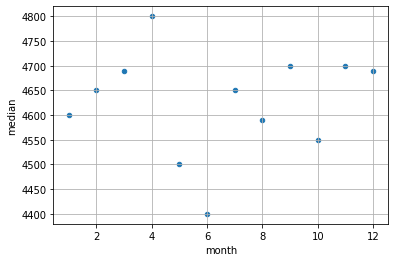

In [ ]:
scatter_graph(piv_month,'month','median',alpha=1)

In [ ]:
# Найдем долю количества объявлений в двух наименьших месяцев
len(outliers_free.query('month == 1'))/outliers_free.shape[0]

0.06281717770480617

In [ ]:
len(outliers_free.query('month == 5'))/outliers_free.shape[0]

0.05369098895475287

In [ ]:
# строим сводную таблцу с числом объявлений, средней и медианной ценной группирую по месяцам

pivot_by_month = pivot_by_date(outliers_free,'month')

In [ ]:
# сортируем по количеству объявлений
pivot_by_month.sort_values(by='count',ascending=True)

,count,mean,median
month,,,
5,1259,6278,4500
1,1473,6471,4600
12,1618,6482,4690
7,1673,6350,4650
8,1727,6338,4590
6,1742,6258,4400
9,1961,6351,4700
10,2105,6091,4550
11,2352,6440,4700


**Вывод:**

Анализируя графики и сводную таблицу,в случае с месяцами, также можем увидеть весьма логичную закономерность - люди публикуют меньше объявлений в определенные 6 месяцев:

**Шестерка месяцев** (по возрастанию кол-ва объявлений):
1. *Январь*
2. *Май*
3. *Декабрь*
4. *Июль*
5. *Август*
6. *Июнь*

Это объясняется весьма тривиально - в первых трех месяцах из этой шестерки довольно большой процент предпраздичных и праздничных дней, в которые люди занимаются житейскими делами - шашлыки, подарки и т.д. - подготовка к отдыху.

А летом люди отдыхают на море или даче. Соответсвенно падает спрос на недвижимость. Однако можно заметить, что после всех этих промежутков, количество объявлений возрастает, но при приближении вышеописанных месяцев - падает.

Цены несильно отличаются от минимальной медианы и максимальной.
Можно выделить самые "дорогие" и самые "дешевые" месяцы по медианной цене объявления:

Самый "дорогой" месяц:
- *Апрель*

Самый "дешевый" месяц:
- *Июнь*

**Тройка месяцев лидеров** (по убыванию кол-ва объявлений):
1. *Февраль*
2. *Март*
3. *Апрель*

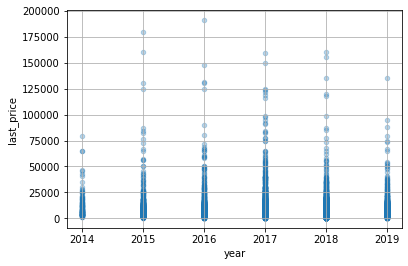

In [ ]:
# строим матрицу рассеяния для года и их корреляцию с ценой
scatter_graph(date_tmp,'year','last_price',alpha=0.3)


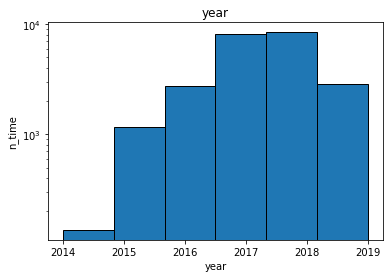

In [ ]:
# строим гистограму по дням годам
date_hist(title='year',
            xlabel_date_hist='year',
            ylabel_date_hist='n_time',
            bins=6,
            column=outliers_free['year'])

In [ ]:
piv_year = piv_to_date(date_tmp,'year','last_price','piv_year')

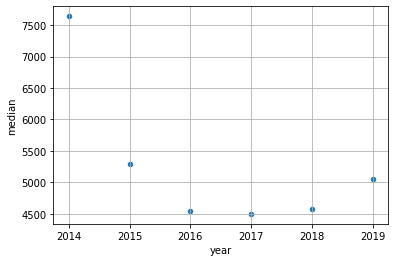

In [ ]:
scatter_graph(piv_year,'year','median',alpha=1)

In [ ]:
# строим сводную таблцу с числом объявлений, средней и медианной ценной группирую по годам
pivot_by_year = pivot_by_date(outliers_free,'year')

In [ ]:
pivot_by_year

,count,mean,median
year,,,
2014,136,12046,7640
2015,1159,8124,5300
2016,2745,6619,4550
2017,8118,6237,4500
2018,8440,5869,4577
2019,2851,6531,5050


In [ ]:
# сортируем по количеству объявлений
pivot_by_year.sort_values(by='count',ascending=True)

,count,mean,median
year,,,
2014,136,12046,7640
2015,1159,8124,5300
2016,2745,6619,4550
2019,2851,6531,5050
2017,8118,6237,4500
2018,8440,5869,4577


In [ ]:
# проверим, чем обслувлен такой спад в 2019 году
outliers_free.query('year == 2019')['month'].max()

5

In [ ]:
# Посмотрим количество объявлений за 5 месяцев включительно за 2017 и 2018 год
# за 2017
outliers_free.query('month <= 5 and year == 2017').shape[0]

2136

In [ ]:
# за 2018
outliers_free.query('month <= 5 and year == 2018').shape[0]

3374

In [ ]:
# за 2019
outliers_free.query('year == 2019').shape[0]

2851

In [ ]:
# Посмотрим для каждого года, есть ли такая же неполнота значений как в 2019 году
for i in outliers_free['year'].unique():
    print(i)
    print((outliers_free.query(f"year == {i}"))['month'].max())
    print('-'*5)

2019
5
-----
2018
12
-----
2015
12
-----
2017
12
-----
2016
12
-----
2014
12
-----


**Вывод:**

Можем увидеть, что в 2019 году за 5 месяцев количетсво объявлений немного отличается от того же периода в 2018 году в худшую сторону, наблюдается некоторый спад - ~15% в 5 месячном интервале.

Говорить о том, что в 2019 году был крах - нельзя. Возможна небольшая коррекция на рынке недвижимости на небольшой срок - за каждым бурным ростом следует коррекция.

В 2014 год был тяжелым годом - на это можно списать столь маленькое количество объявлений.

Как и в случае с бурным ростом - после сильного кризиса или рецессии экономика возвращается на свои докризисные обороты достаточно большими шагами. Этим можно объяснить резкий рост публикаций объявлений.

Лидерами по количеству объявлений безусловно явлюятся:
1. **2018 год - 8_440 шт.**
2. **2017 год - 8_118 шт.**

Самое маленькое количество объявлений пришлось на 1 год:
1. **2014 - 136 шт.**

Однако, мы можем заметить, что несмотря на маленькое число объявлений 2014 год является абсолютным лидером в средней и медианной цене. Медиана - **7_640 тысяч рублей**

Наиболее низкая медианная цена приходится на 3 года (по возврастанию цены):
1. **2017 - 4_500 тысяч рублей**
2. **2016 - 4_550 тысяч рублей**
3. **2018 - 4_577 тысяч рублей**

Наиболее низкая медианная цена приходится на 1 год (по возврастанию цены):
1. **2014 - 7_640 тысяч рублей**

In [ ]:
for i in outliers_free['year'].unique():
    print(f'За {i} год есть информация о публикации объявлений в',f"{(outliers_free.query(f'year == {i}'))['month'].max()}месяцев")

За 2019 год есть информация о публикации объявлений в 5месяцев
За 2018 год есть информация о публикации объявлений в 12месяцев
За 2015 год есть информация о публикации объявлений в 12месяцев
За 2017 год есть информация о публикации объявлений в 12месяцев
За 2016 год есть информация о публикации объявлений в 12месяцев
За 2014 год есть информация о публикации объявлений в 12месяцев


**Вывод:**

In [ ]:
# Найдем более или менее заметную корреляцию между столбцами
for j in scatter_tmp.columns:
    for i in scatter_tmp.columns:
        if (scatter_tmp[i].corr(scatter_tmp[j]) > 0.5 or scatter_tmp[i].corr(scatter_tmp[j]) < -0.5) and i != j:
            print(i,j,sep=' and ')
            print(scatter_tmp[i].corr(scatter_tmp[j]))

parks_nearest and index
0.5217004099563082
ponds_nearest and index
0.5096070709499615
total_area and last_price
0.7294211209662141
living_area and last_price
0.660043007008297
kitchen_area and last_price
0.5672165569460245
cost_per_m2 and last_price
0.7412706088583917
last_price and total_area
0.7294211209662141
rooms and total_area
0.7760589766751418
living_area and total_area
0.940778332238891
kitchen_area and total_area
0.6225605485597738
total_area and rooms
0.7760589766751418
living_area and rooms
0.8450616749901558
living_to_total and rooms
0.5103179562219822
kitchen_to_total and rooms
-0.5960079646683754
floor and floors_total
0.6745889383324225
last_price and living_area
0.660043007008297
total_area and living_area
0.940778332238891
rooms and living_area
0.8450616749901558
floors_total and floor
0.6745889383324225
last_price and kitchen_area
0.5672165569460245
total_area and kitchen_area
0.6225605485597738
index and parks_nearest
0.5217004099563082
index and ponds_nearest
0.509

Корреляция между столбцами равна 0.73


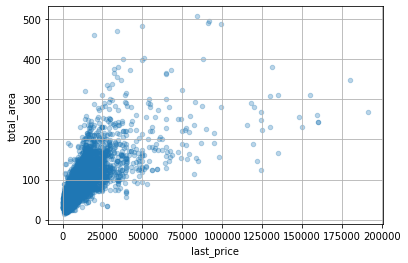

In [ ]:
scatter_graph(scatter_tmp,'last_price','total_area',alpha=0.3)
corr_calc(scatter_tmp.last_price,scatter_tmp.total_area)

**Вывод**:

Корреляция между столбцами `last_price` и `total_area` положительна, достаточно заметная, близка к высокой. Это говорит о том, что между оными столбцами существуют линейная зависимость. То есть, с увеличением одного параметра, будет увеличиваться второй.

Таким образом, делаем вывод, что зависимость между этими столбцами есть и довольно существенная, чем выше площадь, тем выше цена. Касательно выбросов - они есть, но их мало.

Среднее значение столбца rooms_amount равно 2.08 комнат.
--------------------------------------------------
Медианное значение столбца rooms_amount равно 2.0 комнат.


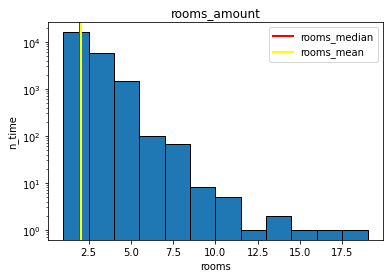

In [ ]:
# создаем гистограмму для rooms
make_a_hist(title='rooms_amount',
            xlabel_hist='rooms',
            axvline_median_label='rooms_median',
            axvline_mean_label='rooms_mean',
            bins=12,
            variation_value ='комнат',
            column=df['rooms'])

Корреляция между столбцами равна 0.44


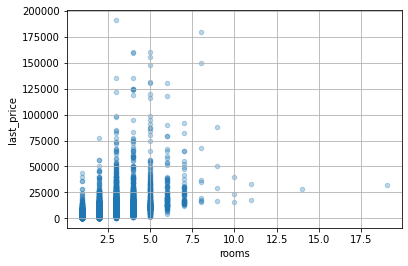

In [ ]:
# строим диаграмму рассеяния и находим корреляцию
scatter_graph(scatter_tmp,'rooms','last_price',alpha=0.3)
corr_calc(scatter_tmp.rooms,scatter_tmp.last_price)

In [ ]:
# создаем фунгкция для сводной таблицы по расстояниб до центра и количеста комнат
def pivot_by_rc(data,index,values='last_price',aggfunc={'median'}):
    return data.pivot_table(index=index,values=values,aggfunc=aggfunc)



In [ ]:
# создаем сводную таблицу медианной цены относитнльно комнат
pivot_by_room = pivot_by_rc(data=scatter_tmp,index='rooms')

In [ ]:
# сортируем по убыванию цены
pivot_by_room.sort_values(by='median')

,median
rooms,
1,3599.0
2,4769.5
3,6200.0
4,9000.0
5,13500.0
6,18888.5
7,22950.0
10,23000.0
11,25250.0


**Выводы:**

Посмотрев на графики с сводную таблицу можем легко найти некоторую несовсем линейную закономерность:

*с увеличением количества комнат, увеличивается и цена, однако в интервале от 10 до 19 комнат цена ниже уровня с 8 комнат и выше, чем с 7 комнатами*

Объяснить это являение мы можем так:

С увеличением комнат цена естественным образом растет. Однако наблюдается исключение - это квартиры, имеющие больше 9 комнат. На недвижимость с большим количеством комнат имеет маленький спрос - это большая проблема иметь такое количество комнат. Уборка очень затратная. Также мало кому нужно больше 10 комнат.

Лидеры по медианной цене квартиры с:
- **9 комнатами - 39_484 тысяч рублей**

Самые дешевые квартиры с:

- **1 комнатой - 3_599 тысяч рублей**

In [ ]:
# функции для автоматизации графика рассеяния и корреляции для расстояния до центра
def scatter_graph_center(data,x,y,alpha,grid=True):
    data.plot(x=x,y=y,kind='scatter',grid=grid,alpha=alpha)
    plt.axvline(8_000,color='red',label='Центр',linewidth=1)
    plt.show

Корреляция между столбцами равна -0.22


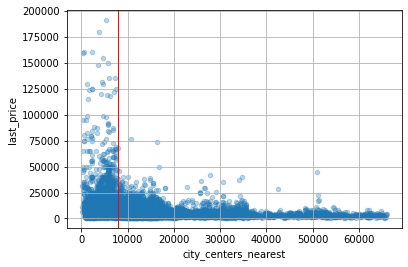

In [ ]:
# строим диаграмму рассеяния и находим корреляцию
# отмечаем примерный уровень центральной области на глаз
scatter_graph_center(scatter_tmp,'city_centers_nearest','last_price',alpha=0.3)
corr_calc(scatter_tmp.last_price,scatter_tmp.city_centers_nearest)

Среднее значение столбца city_centers_nearest равно 14687.55 метров.
--------------------------------------------------
Медианное значение столбца city_centers_nearest равно 13123.0 метров.


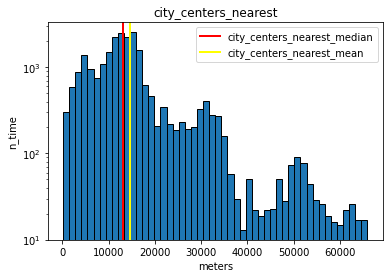

In [ ]:
# создаем гистограмму для rooms
make_a_hist(title='city_centers_nearest',
            xlabel_hist='meters',
            axvline_median_label='city_centers_nearest_median',
            axvline_mean_label='city_centers_nearest_mean',
            variation_value ='метров',
            column=scatter_tmp['city_centers_nearest'])

In [ ]:
# создаем сводную таблицу для мединной цены относительно расстояния
pivot_table_by_center = pivot_by_rc(data=scatter_tmp,index='city_centers_nearest')

In [ ]:
pivot_table_by_center.sort_values(by='median')

,median
city_centers_nearest,
13515,430.0
3368,450.0
58190,470.0
36091,470.0
32677,470.0
...,...
4247,120000.0
5845,120537.5
1722,124000.0


**Вывод:**

Корреляция между этими столбца не совсем слабая и отрицательная, то есть при увечилении расстояния до центра, цена уменьшается.

Медианное расстояние до центра - **13119 метров**

Из диаграммы рассеяния можем увидеть, что часто уменьшая расстояние до центра, цена возрастает. Например, до 8_000 метров цены на квартиры намного дороже, нежели после 8_000 метров.

Объяснение довольно-таки очевидное - на рынке существуют правила, чем ближе к центру, тем дороже, но и в этом есть исключения. Например, в центре города есть более дорогие районы. В Москве - Остоженка. За центром есть очень дорогое место - Серебряный бор. Но в основном, чем ближе к центру, тем дороже жилье.

Конечно, на жилье влияет не только расстояние до центра, но и сам район.

Интервальный лидер по ценам на недвижимость это районы с расстоянием до центра не более 8_000 метров.


### Какие факторы влияют на стоимость квартиры?
1. Слабое влияние
 * `last_price` и `city_centers_nearest` - Отрицательная корреляция говорит об обратной зависимости - чем ближе к центру (меньше расстояние), тем выше стоимость квартиры.
 * `last_price` и `parks_around3000` - Положительная корреляция - чем больше в районе парков, тем выше стоимость квартиры.
 * `last_price `и `ponds_around3000` - Положительная корреляция - чем больше в районе прудов и водных мест, тем выше стоимость квартиры.
 * `last_price` и `kitchen_to_total` - Отрицательная корреляция - чем больше кухня, тем меньше цена.
2. Умеренное влияние
 * `last_price` и `rooms` -  Положительная корреляция - чем больше количество комнат, тем выше стоимость квартиры. Завимисоть не очень слабая и не очень сильная
 * `last_price` и `ceiling_height` - Положительная корреляция  - чем выше потолки, тем выше стоимость квартиры. Зависимость немного слабая, но есть
3. Заметное влияние
 * `last_price` и `kitchen_area` -  Положительная корреляция  - чем больше площадь кухни, тем выше стоимость квартиры.

Завимимость по всем площадям достаточно заметная

4. Высокое влияние
 * `last_price` и `total_area` - Положительная корреляция  - чем больше общая площадь, тем выше стоимость квартиры.
 * `last_price` и `living_area` - Положительная корреляция  - чем больше жилвя площадь, тем выше стоимость квартиры.

Ответ на вопрос: на стоимость квартиры влияет много факторов от наличия парков до высоты потолков. Однако где-то линейная связь не совсем явно выражена, где-то наоборот - весьма заметна. Нет высокой корреляции, если не считать цену за квадратный метр.

Можно заметить, что линейная зависимость между этажом и ценой практически не наблюдается - она положительна и очень мала. Однако можно заметить, что цена недвижимости на первом этаже самая низкая. На крайнем месте последний этаж, и самые дорогие квартиры в промежутке со 2 до предпоследнего этажа включительно - это видно на графике с квантилями - "ящик с усами". В данных присутствуют выбросы - причиной могла послужить неаккуратность клавиатурного ввода, либо это просто слишком дорогая недвижимость, стоит удалить эти данные.

## 10 населенных пунктов с наибольшим числом объявлений.

In [ ]:
# создаем сводную таблицу для топ-10 населенных пунктов
# по количеству объявлений
pivot_top_10 = outliers_free.pivot_table(index='locality_name',values='last_price',aggfunc={'count'})

In [ ]:
pivot_top_10.reset_index(inplace=True)

In [ ]:
pivot_top_10

,locality_name,count
0,Бокситогорск,16
1,Волосово,36
2,Волхов,111
3,Всеволожск,397
4,Выборг,237
...,...,...
359,село Путилово,2
360,село Рождествено,3
361,село Русско-Высоцкое,9
362,село Старая Ладога,2


In [ ]:
pivot_cost_per_10 = outliers_free.groupby('locality_name')['cost_per_m2'].mean()


In [ ]:
# финальная версия таблицы
final_top_10 = (pivot_top_10
.join(pivot_cost_per_10,on='locality_name')
.set_index('locality_name')
.sort_values(by='count',ascending=False)
.head(10)
               )

In [ ]:
# приводим к удобному виду
final_top_10.rename(columns={'cost_per_m2': 'cost_per_m2_mean'},inplace=True)
final_top_10['cost_per_m2_mean'] =final_top_10['cost_per_m2_mean'].astype('int64',errors='raise')

In [ ]:
final_top_10.sort_values(by='cost_per_m2_mean',ascending=False)


,count,cost_per_m2_mean
locality_name,,
Санкт-Петербург,15581,113985
Пушкин,367,102987
деревня Кудрово,290,92327
посёлок Парголово,326,90333
посёлок Мурино,498,85249
посёлок Шушары,439,78703
Колпино,338,75423
Гатчина,307,68745
Всеволожск,397,68646


In [ ]:
final_top_10.reset_index(inplace=True)

<function matplotlib.pyplot.show(close=None, block=None)>

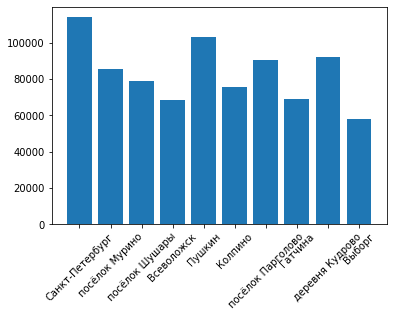

In [ ]:
plt.bar(final_top_10['locality_name'],final_top_10['cost_per_m2_mean'])
plt.xticks(final_top_10['locality_name'], final_top_10['locality_name'], rotation=45)
# plt.tick_params(axis='x', which='major')
plt.show

In [ ]:
final_top_10

,locality_name,count,cost_per_m2_mean
0,Санкт-Петербург,15581,113985
1,посёлок Мурино,498,85249
2,посёлок Шушары,439,78703
3,Всеволожск,397,68646
4,Пушкин,367,102987
5,Колпино,338,75423
6,посёлок Парголово,326,90333
7,Гатчина,307,68745
8,деревня Кудрово,290,92327
9,Выборг,237,58141


(0.0, 200000.0)

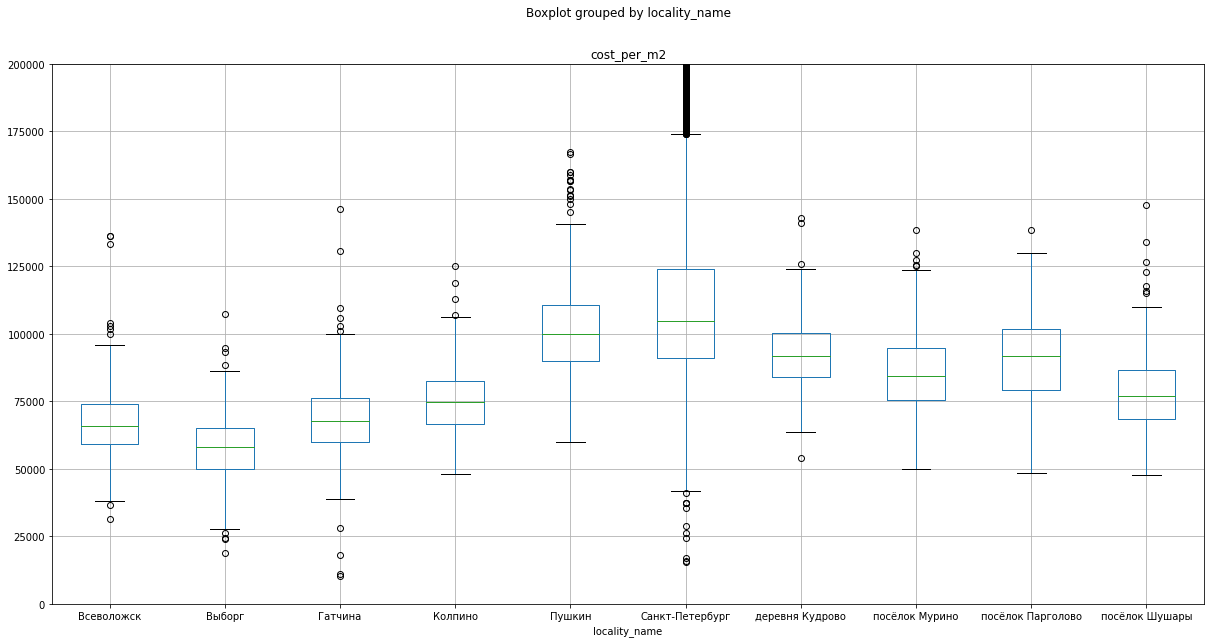

In [ ]:

ax = (outliers_free
    .query('locality_name in @final_top_10.locality_name')
    .boxplot('cost_per_m2', by='locality_name', figsize=(20, 10))
)
ax.set_ylim(0, 200000)

**Вывод:**

Из сводной таблицы видно, что самый дорогой город по цене за квадратный метр это **Санкт-Петербург - 58_141 тысяч рублей за квадратный метр**.

Самый дешевый из городов в топ-10 по цене за квадртаный метр это **Выборг - 113_985 тысяч рублей за квадратный метр**

## Находим центральную область

In [ ]:
# создаем новый столбец с целым значения киллометра относительно 1_000
outliers_free['city_centers_nearest_km'] =  outliers_free['city_centers_nearest'] // 1000

In [ ]:
outliers_free['city_centers_nearest_km'].min()

0

In [ ]:
c_c_n = outliers_free['city_centers_nearest']//1000

In [ ]:
# создаем интервалы через list comprehansion
kms =[int(i) for i in range((c_c_n.min()),(c_c_n.max()) + 2)]
kms

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66]

In [ ]:
# применяем метод np.digitize для ранжирования расстояния до центра
outliers_free['n_km'] = np.digitize(outliers_free['city_centers_nearest_km'],bins=kms)

In [ ]:
outliers_free.loc[outliers_free['city_centers_nearest_km'] == 0,['city_centers_nearest','city_centers_nearest_km','n_km']].head()

,city_centers_nearest,city_centers_nearest_km,n_km
332,887,0,1
490,436,0,1
532,899,0,1
658,945,0,1
746,814,0,1


In [ ]:
# проверка
outliers_free.loc[outliers_free['city_centers_nearest_km'] == 15,['city_centers_nearest','city_centers_nearest_km','n_km']].head()

,city_centers_nearest,city_centers_nearest_km,n_km
9,15008,15,16
58,15579,15,16
77,15572,15,16
87,15035,15,16
105,15598,15,16


In [ ]:
# проверка
outliers_free.loc[outliers_free['city_centers_nearest_km'] == 65,['city_centers_nearest','city_centers_nearest_km','n_km']].head()

,city_centers_nearest,city_centers_nearest_km,n_km
575,65764,65,66
5308,65952,65,66
9571,65968,65,66
20577,65105,65,66
21965,65713,65,66


In [ ]:
# сводная таблица средней цены за квадртный метр, колчества записей относительно километра
outliers_free_piv_by_km = outliers_free.pivot_table(index='n_km',values=('cost_per_m2'),aggfunc={'count','mean'})

In [ ]:
outliers_free_piv_by_km['mean'] = outliers_free_piv_by_km['mean'].astype('int64',errors='raise')

In [ ]:
outliers_free_piv_by_km.reset_index(inplace=True)

In [ ]:
outliers_free_piv_by_km.rename(columns={'mean':"mean_cost_per_km"},inplace=True)

In [ ]:
outliers_free_piv_by_km.head()

,n_km,count,mean_cost_per_km
0,1,119.0,150659
1,2,373.0,117814
2,3,488.0,113031
3,4,676.0,110361
4,5,1047.0,126145


Среднее значение столбца cost_per_m2_by_km равно 82183.06 рублей.
--------------------------------------------------
Медианное значение столбца cost_per_m2_by_km равно 78071.5 рублей.


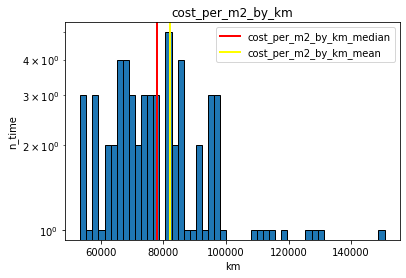

In [ ]:
# создаем гистограмму для mean_cost_per_km
make_a_hist(title='cost_per_m2_by_km',
            xlabel_hist='km',
            axvline_median_label='cost_per_m2_by_km_median',
            axvline_mean_label='cost_per_m2_by_km_mean',
            variation_value ='рублей',
            column=outliers_free_piv_by_km['mean_cost_per_km'])

Корреляция между столбцами равна -0.87


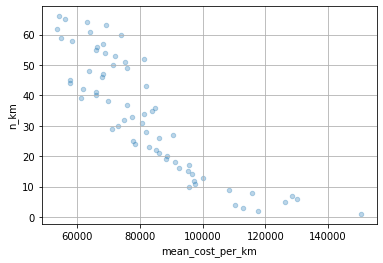

In [ ]:
# строим диаграмму рассеяния и находим корреляцию
scatter_graph(outliers_free_piv_by_km,'mean_cost_per_km','n_km',alpha=0.3)
corr_calc(outliers_free_piv_by_km.mean_cost_per_km,outliers_free_piv_by_km.n_km)

In [ ]:
# находим максимальную и минимальную цены за кв.м
print(f'Минимальная цена за кв.м. равна {outliers_free_piv_by_km["mean_cost_per_km"].min()} р.')
print(f'Максимальная цена за кв.м. равна {outliers_free_piv_by_km["mean_cost_per_km"].max()} р.')

Минимальная цена за кв.м. равна 53475 р.
Максимальная цена за кв.м. равна 150659 р.


**Вывод:**

Из графиков и свобдной таблицы можем сделать вывод, что средняя и медианная зарплата равны **82_476.05 рублей** и **78_154.5 рублей** соответсвенно. Из диаграммы рассеяния можем выделить сильную отрицательную корреляцию. Линейная зависимость весьма выразительно видна на графике.

Чем ближе к центру, тем дороже квартиры. Начиная с 23-ого километра удалению от центра цены на квартиры растут чистейшим линейным образом, постепенно подходят к границе 10-ого километра, где совершают достаточно наглядный скачок в медианной цене.

Делаем вывод, что центральная зона будет от примерно 10-ого километра. В этом интервале находится одни из самых высоких цен за квадратный метр.

Самая низкая цена за квадратный метр - **44_989 рублей.**

Самая высокая цена за квадратный метр - **152_715 рублей.**

Медианная цена за квадратный метр - **82_476 рублей.**

Средняя цена за квадратный метр - **78_154 рублей.**


## Анализ цетральной области

In [ ]:
# Отберем квартиры в центральной области
central_district = outliers_free.query('city_centers_nearest < 10_000')

In [ ]:
# Количество объявлений в центре
central_district.shape[0]


6626

Проанализируйте эту территорию и изучите следующие параметры:
Площадь, цена, число комнат, высота потолков. Также выделите факторы,
которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления).

Среднее значение столбца total_area равно 60.11 квадратных метров.
--------------------------------------------------
Медианное значение столбца total_area равно 52.0 квадратных метров.


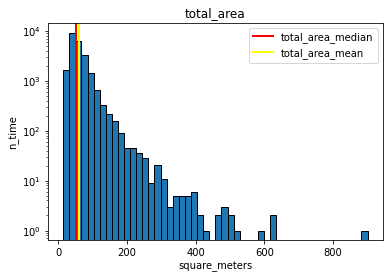

In [ ]:
# создаем гистограмму для неотсортированной информации
make_a_hist(title='total_area',
            xlabel_hist='square_meters',
            axvline_median_label='total_area_median',
            axvline_mean_label='total_area_mean',
            variation_value ='квадратных метров',
            column=df['total_area'])

Среднее значение столбца total_area равно 74.17 квадратных метров.
--------------------------------------------------
Медианное значение столбца total_area равно 62.0 квадратных метров.


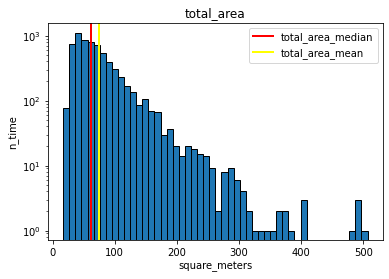

In [ ]:
# создаем гистограмму для отсортированной таблицы
make_a_hist(title='total_area',
            xlabel_hist='square_meters',
            axvline_median_label='total_area_median',
            axvline_mean_label='total_area_mean',
            variation_value ='квадратных метров',
            column=central_district['total_area'])

**Вывод:**

Общая площадь в центральных районах отличается от общей площади всей выборки, в центре она больше, если считать по медианне, то почти на 20 процентов.

В центре:
* Медианное значение 62.0 квадратных метров.
* Среднее значение 74.26 квадратных метров.

В общей базе:
* Медианное значение 52.0 квадратных метров.
* Среднее  значение 60.11 квадратных метров.

Среднее значение столбца living_area равно 34.48 квадратных метров.
--------------------------------------------------
Медианное значение столбца living_area равно 30.0 квадратных метров.


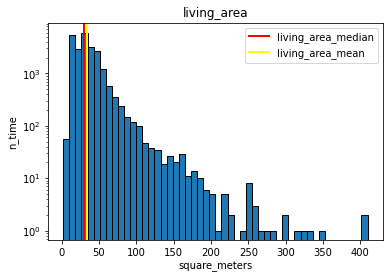

In [ ]:
# создаем гистограмму для неотсортированной информации
make_a_hist(title='living_area',
            xlabel_hist='square_meters',
            axvline_median_label='living_area_median',
            axvline_mean_label='living_area_mean',
            variation_value ='квадратных метров',
            column=df['living_area'])

Среднее значение столбца living_area равно 43.51 квадратных метров.
--------------------------------------------------
Медианное значение столбца living_area равно 36.0 квадратных метров.


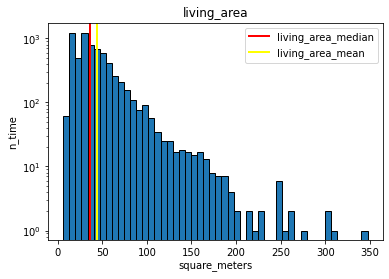

In [ ]:
# создаем гистограмму для неотсортированной информации
make_a_hist(title='living_area',
            xlabel_hist='square_meters',
            axvline_median_label='living_area_median',
            axvline_mean_label='living_area_mean',
            variation_value ='квадратных метров',
            column=central_district['living_area'])

**Вывод:**

Разница в жилой площади также около 20%, в центре жилая площадь больше


В центре:
* Медианное значение 36.0 квадратных метров.
* Среднее значение 43.57 квадратных метров.

В общей базе:
* Медианное значение 30.0 квадратных метров.
* Среднее  значение 34.48 квадратных метров.

Среднее значение столбца kitchen_area равно 10.43 квадратных метров.
--------------------------------------------------
Медианное значение столбца kitchen_area равно 9.0 квадратных метров.


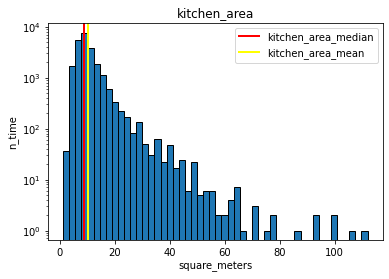

In [ ]:
# создаем гистограмму для неотсортированной информации
make_a_hist(title='kitchen_area',
            xlabel_hist='square_meters',
            axvline_median_label='kitchen_area_median',
            axvline_mean_label='kitchen_area_mean',
            variation_value ='квадратных метров',
            column=df['kitchen_area'])

Среднее значение столбца kitchen_area равно 12.15 квадратных метров.
--------------------------------------------------
Медианное значение столбца kitchen_area равно 10.0 квадратных метров.


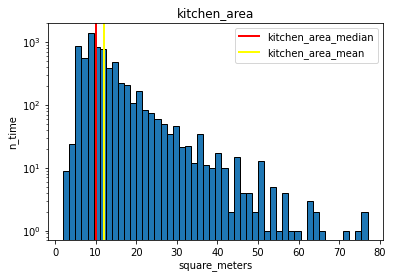

In [ ]:
# создаем гистограмму для отсортированной таблицы
make_a_hist(title='kitchen_area',
            xlabel_hist='square_meters',
            axvline_median_label='kitchen_area_median',
            axvline_mean_label='kitchen_area_mean',
            variation_value ='квадратных метров',
            column=central_district['kitchen_area'])

**Вывод:**

Площадь кухни немного слабее отличается от общей картины, примерно на 10% больше, чем во всей базе.


В центре:
* Медианное значение 10.0 квадратных метров.
* Среднее значение 12.15 квадратных метров.

В общей базе:
* Медианное значение 9.0 квадратных метров.
* Среднее  значение 10.43 квадратных метров.

Среднее значение столбца living_to_total равно 0.56 сотых.
--------------------------------------------------
Медианное значение столбца living_to_total равно 0.57 сотых.


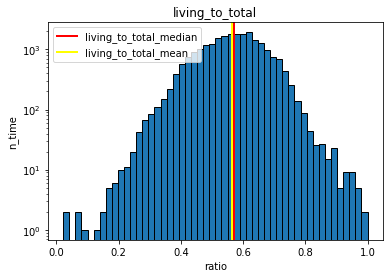

In [ ]:
# создаем гистограмму для неотсортированной информации
make_a_hist(title='living_to_total',
            xlabel_hist='ratio',
            axvline_median_label='living_to_total_median',
            axvline_mean_label='living_to_total_mean',
            variation_value ='сотых',
            column=df['living_to_total'])

Среднее значение столбца living_to_total равно 0.58 сотых.
--------------------------------------------------
Медианное значение столбца living_to_total равно 0.58 сотых.


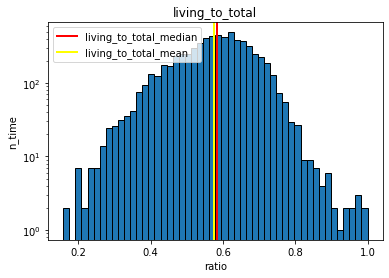

In [ ]:
# создаем гистограмму для неотсортированной информации
make_a_hist(title='living_to_total',
            xlabel_hist='ratio',
            axvline_median_label='living_to_total_median',
            axvline_mean_label='living_to_total_mean',
            variation_value ='сотых',
            column=central_district['living_to_total'])

**Вывод:**

Логично, что в центре  и отношение жилой площади к общей будет выше, чем во всей базе.

В центре:
* Медианное значение 0.58 сотых.
* Среднее значение 0.58 сотых.

В общей базе:
* Медианное значение 0.57 сотых.
* Среднее  значение  0.56 сотых.


Среднее значение столбца kitchen_to_total равно 0.19 сотых.
--------------------------------------------------
Медианное значение столбца kitchen_to_total равно 0.17 сотых.


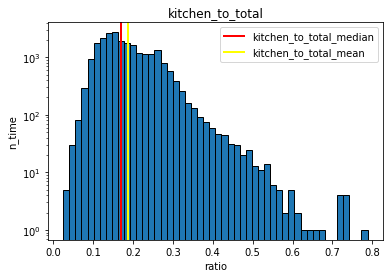

In [ ]:
# создаем гистограмму для неотсортированной информации
make_a_hist(title='kitchen_to_total',
            xlabel_hist='ratio',
            axvline_median_label='kitchen_to_total_median',
            axvline_mean_label='kitchen_to_total_mean',
            variation_value ='сотых',
            column=df['kitchen_to_total'])

Среднее значение столбца kitchen_to_total равно 0.18 сотых.
--------------------------------------------------
Медианное значение столбца kitchen_to_total равно 0.16 сотых.


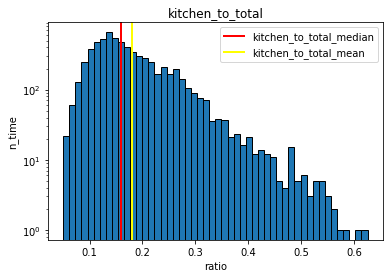

In [ ]:
# создаем гистограмму для отсортированной таблицы
make_a_hist(title='kitchen_to_total',
            xlabel_hist='ratio',
            axvline_median_label='kitchen_to_total_median',
            axvline_mean_label='kitchen_to_total_mean',
            variation_value ='сотых',
            column=central_district['kitchen_to_total'])

**Вывод:**

Можем заметить, что отношение кухни к общей площади в центральном районе меньше, чем во всей базе данных.

В центре:
* Медианное значение 0.16 сотых.
* Среднее значение 0.18 сотых.

В общей базе:
* Медианное значение 0.17 сотых.
* Среднее  значение  0.19 сотых.

Среднее значение столбца last_price равно 6482.94 тысяч рублей.
--------------------------------------------------
Медианное значение столбца last_price равно 4650.0 тысяч рублей.


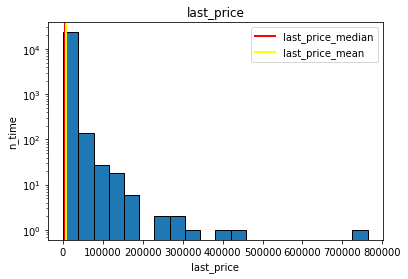

In [ ]:
# создаем гистограмму для неотсортированной информации
make_a_hist(title='last_price',
            xlabel_hist='last_price',
            axvline_median_label='last_price_median',
            axvline_mean_label='last_price_mean',
            bins=20,
            variation_value ='тысяч рублей',
            column=df['last_price'])

Среднее значение столбца last_price равно 9660.22 тысяч рублей.
--------------------------------------------------
Медианное значение столбца last_price равно 6550.0 тысяч рублей.


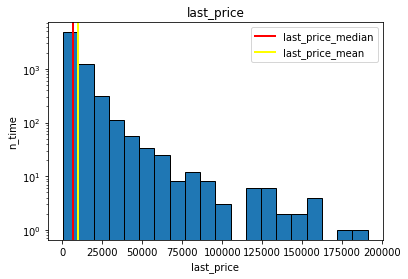

In [ ]:
# создаем гистограмму для отсортированной таблицы
make_a_hist(title='last_price',
            xlabel_hist='last_price',
            axvline_median_label='last_price_median',
            axvline_mean_label='last_price_mean',
            bins=20,
            variation_value ='тысяч рублей',
            column=central_district['last_price'])

**Вывод:**

Медианная и средняя цена недвижимости в центре достаточно сильно отличаются от тех же параметров в общей базе.

В центре:
* Медианная цена 6560 тысяч рублей
* Средняя цена 9673.5 тысяч рублей

В общей базе:
* Медианная цена 4650 тысяч рублей
* Средняя цена 6482.94 тысяч рублей

Среднее значение столбца rooms_amount равно 2.08 комнат.
--------------------------------------------------
Медианное значение столбца rooms_amount равно 2.0 комнат.


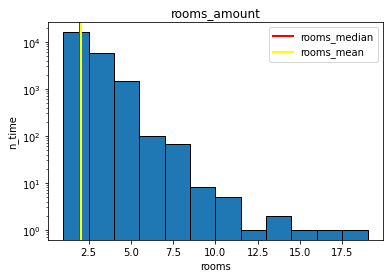

In [ ]:
# создаем гистограмму для неотсортированной информации
make_a_hist(title='rooms_amount',
            xlabel_hist='rooms',
            axvline_median_label='rooms_median',
            axvline_mean_label='rooms_mean',
            bins=12,
            variation_value ='комнат',
            column=df['rooms']
           )

Среднее значение столбца rooms_amount равно 2.42 комнат.
--------------------------------------------------
Медианное значение столбца rooms_amount равно 2.0 комнат.


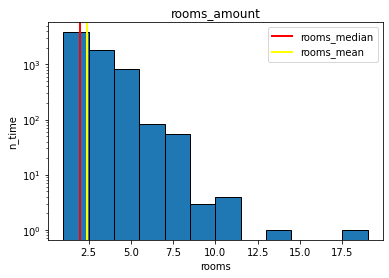

In [ ]:
# создаем гистограмму для отсортированной таблицы
make_a_hist(title='rooms_amount',
            xlabel_hist='rooms',
            axvline_median_label='rooms_median',
            axvline_mean_label='rooms_mean',
            bins=12,
            variation_value ='комнат',
            column=central_district['rooms']
           )

**Вывод:**

Мадианна комнат не изменилась, однако среднее значение приближается к 3 комнатам, когда по всей базе практически ровно 2 комнаты.

В центре:
* Медиана комнат равна 2.0
* Среднее значение комнат равно  2.42

В общей базе:
* Медиана комнат равна 2.0
* Среднее значение комнат равно 2.08

Корреляция между столбцами равна 0.36


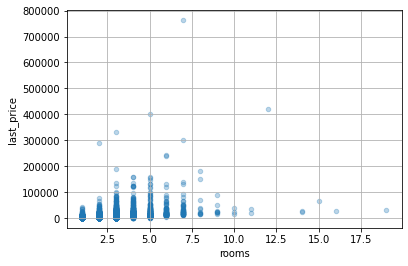

In [ ]:

scatter_graph(df,
              'rooms',
              'last_price',
              alpha=0.3
                )
corr_calc(df.rooms,
          df.last_price
         )

Корреляция между столбцами равна 0.45


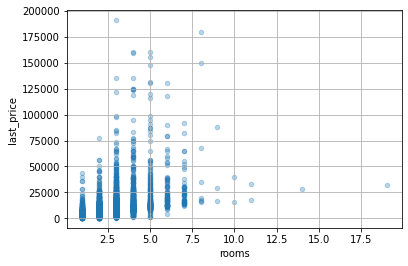

In [ ]:

scatter_graph(central_district,
              'rooms',
              'last_price',
              alpha=0.3
                )
corr_calc(central_district.rooms,
          central_district.last_price
         )

**Вывод:**

Из диаграмм рассеяния и коэффициентов корреляция видно, что в центре зависимость стоимости квартиры от количества комнат выше, чем по всей базе.

* Корреляция между столбцами из центральной области равна 0.45


* Корреляция между столбцами из общей базы равна 0.36

<AxesSubplot:>

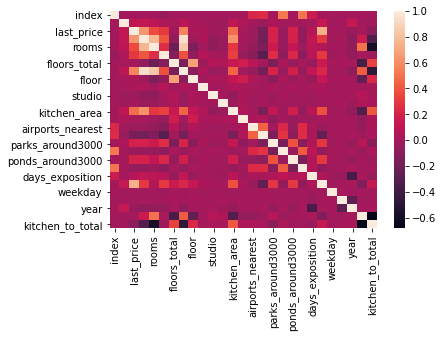

In [ ]:
# строим карту температуры корреляции
sns.heatmap(df.corr())

<AxesSubplot:>

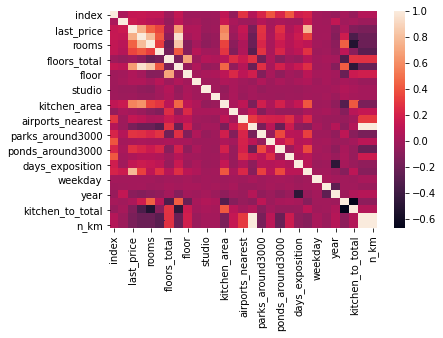

In [ ]:
# строим карту температуры корреляции
sns.heatmap(central_district.corr())

In [ ]:
digitize_df  = df.loc[:,['last_price','floor_category']]

In [ ]:
def floor_digitize(row):
    if 'Первый' in row['floor_category']:
        return 1
    elif 'Другой'in row['floor_category']:
        return 2
    return 3


In [ ]:
# применяю функцию к нужному dataframe
digitize_df['floor_digitize'] = digitize_df.apply(floor_digitize, axis=1)

In [ ]:
# функция для построение ящика с усами для этажа
def mustache_plot_dig(data,column,by,grid=True):
    box = data.boxplot(column=column,by=by).get_figure()
    box.suptitle('')
    print(box)

Figure(432x288)


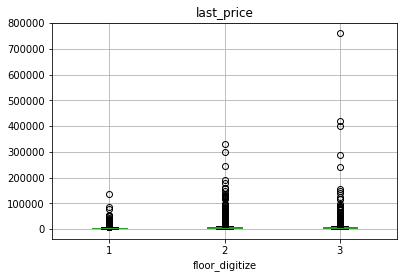

In [ ]:

mustache_plot_dig(digitize_df,'last_price',by='floor_digitize')

In [ ]:
central_district_digitize = central_district.loc[:,['last_price','floor_category']]

In [ ]:
# применяю функцию к нужному dataframe
central_district_digitize['floor_digitize'] = central_district_digitize.apply(floor_digitize, axis=1)

Figure(432x288)


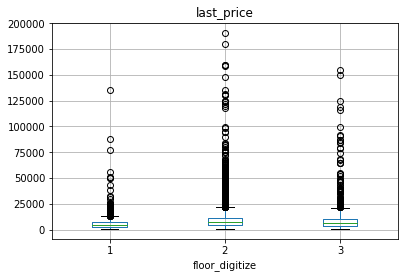

In [ ]:

mustache_plot_dig(central_district_digitize,'last_price',by='floor_digitize')

In [ ]:
pivot_digitize_df = (digitize_df
                     .pivot_table(
                         index='floor_digitize',
                         values=('last_price'),
                          aggfunc={'count',
                                    'mean',
                                    'median'
                                  }
                                )
                    )
pivot_digitize_df

,count,mean,median
floor_digitize,,,
1,2889.0,4786.000346,3900.0
2,17297.0,6640.525004,4850.0
3,3317.0,7139.144106,4300.0


In [ ]:
pivot_central_district_digitize = (central_district_digitize
                                .pivot_table(
                                    index='floor_digitize',
                                    values=('last_price'),
                                    aggfunc={'count',
                                             'mean',
                                             'median'
                                            }
                                            )
                                  )
pivot_central_district_digitize

,count,mean,median
floor_digitize,,,
1,803.0,6223.875467,4700.0
2,4701.0,10160.172729,6990.0
3,1122.0,10024.852941,6500.0


**Вывод:**

Из ящиков с усами можем заметить, что закономерность, которая есть в общей базе, наблюдается и в центральной области - цена на первом этаже наименьшая, цены на последнем этаже выше, чем на первом, а на первом месте по цене этажи со 2 по предпоследний.



**Рейтинг этажности по медианной цене в центре:**
1. *Другой* - 6990 тысяч рублей
2. *Последний* - 6500 тысяч рублей
3. *Первый* - 4750 тысяч рублей



**Рейтинг этажности по медианной цене в общей базе:**
1. *Другой* - 4850 тысяч рублей
2. *Последний* - 4300 тысяч рублей
3. *Первый* - 3900 тысяч рублей

Среднее значение столбца ceiling_height равно 2.7 метра.
--------------------------------------------------
Медианное значение столбца ceiling_height равно 2.6 метра.


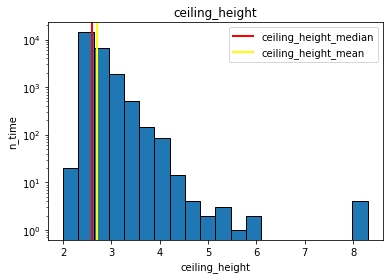

In [ ]:
# создаем гистограмму для неотсортированной информации
make_a_hist(title='ceiling_height',
            xlabel_hist='ceiling_height',
            axvline_median_label='ceiling_height_median',
            axvline_mean_label='ceiling_height_mean',
            bins=20,
            variation_value ='метра',
            column=df['ceiling_height'])

Среднее значение столбца ceiling_height равно 2.88 метра.
--------------------------------------------------
Медианное значение столбца ceiling_height равно 2.8 метра.


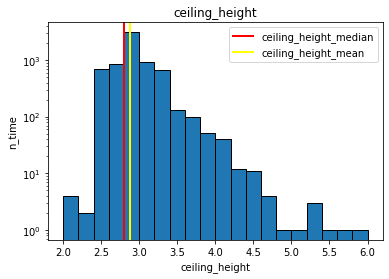

In [ ]:
# создаем гистограмму для отсортированной таблицы
make_a_hist(title='ceiling_height',
            xlabel_hist='ceiling_height',
            axvline_median_label='ceiling_height_median',
            axvline_mean_label='ceiling_height_mean',
            bins=20,
            variation_value ='метра',
            column=central_district['ceiling_height'])

Корреляция между столбцами равна 0.3


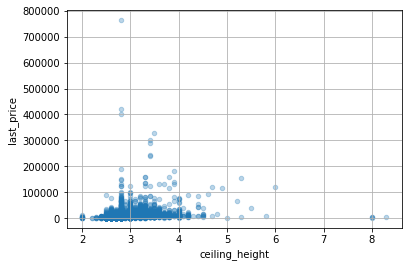

In [ ]:

scatter_graph(df,'ceiling_height','last_price',alpha=0.3)
corr_calc(df.ceiling_height,df.last_price)

Корреляция между столбцами равна 0.35


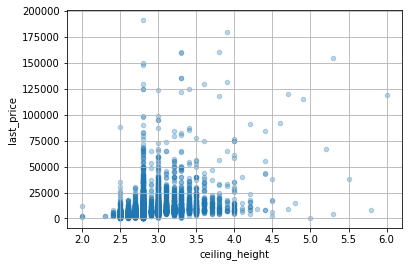

In [ ]:

scatter_graph(central_district,'ceiling_height','last_price',alpha=0.3)
corr_calc(central_district.ceiling_height,central_district.last_price)

**Вывод:**

Высота потолков в центре выше, чем в общей базе. Закономерность, если посмотрим на корреляцию, немного больше в центре, чем в общей базе.


В центре:
* Медианное значение 2.8 метра.
* Среднее значение 2.88 метра.
* Корреляция между столбцами равна 0.35

В общей базе:
* Медианное значение 2.6 метра.
* Среднее  значение 2.7 метра.
* Корреляция между столбцами равна 0.3



Среднее значение столбца days_exposition равно 196.85 дней.
--------------------------------------------------
Медианное значение столбца days_exposition равно 96.0 дней.


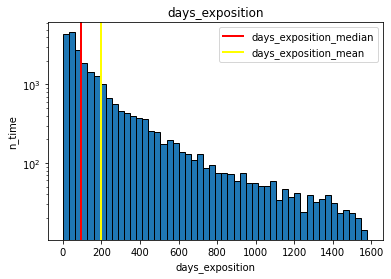

In [ ]:
# создаем гистограмму для неотсортированной информации
make_a_hist(title='days_exposition',
            xlabel_hist='days_exposition',
            axvline_median_label='days_exposition_median',
            axvline_mean_label='days_exposition_mean',
            variation_value ='дней',
            column=df['days_exposition'])

Среднее значение столбца days_exposition равно 215.08 дней.
--------------------------------------------------
Медианное значение столбца days_exposition равно 106.0 дней.


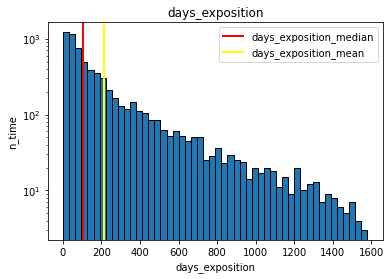

In [ ]:
# создаем гистограмму для отсортированной таблицы
make_a_hist(title='days_exposition',
            xlabel_hist='days_exposition',
            axvline_median_label='days_exposition_median',
            axvline_mean_label='days_exposition_mean',
            variation_value ='дней',
            column=central_district['days_exposition'])

Корреляция между столбцами равна 0.12


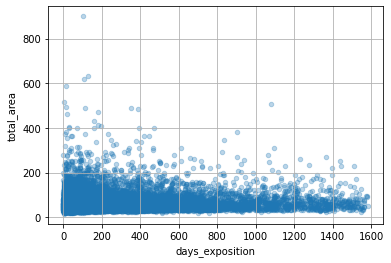

In [ ]:
scatter_graph(df,'days_exposition','total_area',alpha=0.3)
corr_calc(df.total_area,df.days_exposition)

Корреляция между столбцами равна 0.17


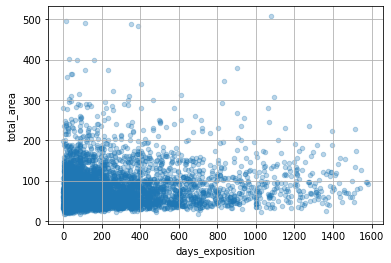

In [ ]:
scatter_graph(central_district,'days_exposition','total_area',alpha=0.3)
corr_calc(central_district.total_area,central_district.days_exposition)

**Вывод:**

Можем заметить, что плонтность с увеличением количества дней уменьшеается - квартиры в центре продаются быстрее, чем квартиры в общей базе.

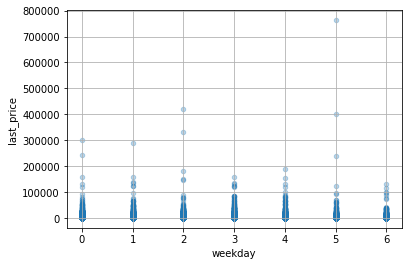

In [ ]:
# строим матрицу рассеяния для дней недели и их корреляцию с ценой
scatter_graph(df,'weekday','last_price',alpha=0.3)


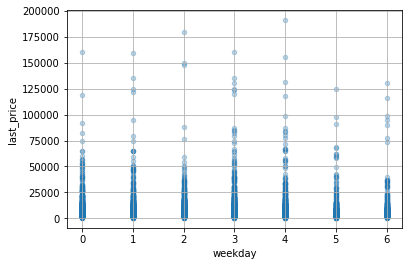

In [ ]:
# строим матрицу рассеяния для дней недели и их корреляцию с ценой
scatter_graph(central_district,'weekday','last_price',alpha=0.3)


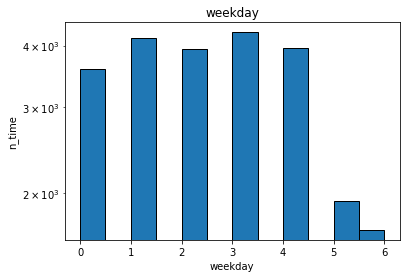

In [ ]:
# строим гистограму по дням недели для неотсортированной информации
date_hist(title='weekday',
            xlabel_date_hist='weekday',
            ylabel_date_hist='n_time',
            bins=12,
            column=df['weekday'])

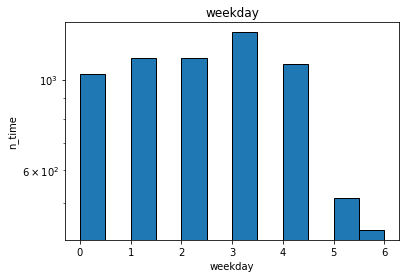

In [ ]:
# строим гистограму по дням недели для отсортированной информации
date_hist(title='weekday',
            xlabel_date_hist='weekday',
            ylabel_date_hist='n_time',
            bins=12,
            column=central_district['weekday'])

In [ ]:
# строим сводную таблцу с числом объявлений, средней и медианной ценной группирую по дням недели
# сортируем по количеству объявлений
(
    pivot_by_date(df,
               'weekday')
.sort_values(by='count',
             ascending=True
            )
)

,count,mean,median
weekday,,,
6,1683,6215,4550
5,1925,6837,4560
0,3588,6522,4650
2,3933,6494,4700
4,3962,6267,4590
1,4153,6382,4750
3,4259,6681,4650


In [ ]:
# строим сводную таблцу с числом объявлений, средней и медианной ценной группирую по дням недели
# сортируем по количеству объявлений
(
    pivot_by_date(central_district,
               'weekday')
.sort_values(by='count',
             ascending=True
            )
)

,count,mean,median
weekday,,,
6,429,9941,6550
5,512,9042,6265
0,1034,9692,6600
4,1090,9727,6570
2,1126,9279,6570
1,1130,9470,6548
3,1305,10221,6695


In [ ]:
piv_week_df = piv_to_date(df,'weekday','last_price','piv_week_df')

In [ ]:
piv_week_df

,weekday,median
0,0,4650
1,1,4750
2,2,4700
3,3,4650
4,4,4590
5,5,4560
6,6,4550


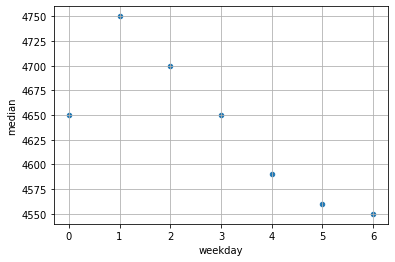

In [ ]:
scatter_graph(piv_week_df,'weekday','median',alpha=1)

In [ ]:
piv_week_centre = piv_to_date(central_district,'weekday','last_price','piv_week_centre')

In [ ]:
piv_week_centre

,weekday,median
0,0,6600
1,1,6548
2,2,6570
3,3,6695
4,4,6570
5,5,6265
6,6,6550


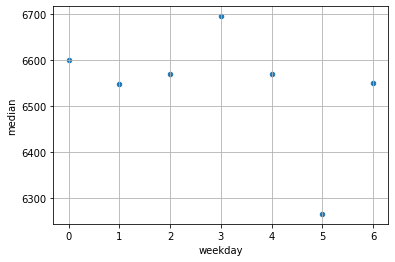

In [ ]:
scatter_graph(piv_week_centre ,'weekday','median',alpha=1)

**Вывод:**

Закономерность в общей абзе отображается в центральной области - ближе к выходных падает количество объявлений, на выходных их очень мало, а на рабочей недели с каждым днем в основном поднимается количество объявлений

Медианная цена выше практически на +-50%. Частота сохраняется на обоих гистограммах.

Однако на диагграммах рассеяния видно, что в субботу цена падает на значительную величину, а в течении недели идет в одном ценновом корридоре - это в центральной области. А в общей базе с понедельник по вторник медианная цена растет, а потом верно снижается.

В центральной и общей базе соответственно, по количетву объявлений такой рейтинг:




**Заметный спад** (по возрастанию кол-ва):
1. *Воскресенье* - 423
2. *Суббота* - 507

**Двойка лидеров по кол-ву объвлений** (по убыванию кол-ва):
1. *Четверг* - 1305
2. *Вторник* - 1136



**Заметный спад** (по возрастанию кол-ва):
1. *Воскресенье* - 1682
2. *Суббота* - 1920

**Двойка лидеров по кол-ву объвлений** (по убыванию кол-ва):
1. *Четверг* - 4249
2. *Вторник* - 4141






Самый "дорогой" день недели в центральной области(медиана):

- *Четверг* - 6690 тысяч рублей

Самый "дешевый" день недели в центральной области(медиана):

- *Суббота*  - 6300 тысяч рублей


Самый "дорогой" день недели в общей базе(медиана):

- *Вторник* и *Среда* делят первое место

Самый "дешевый" день недели в общей базе(медиана):

- *Суббота* и *Воскресенье* делят последнее место

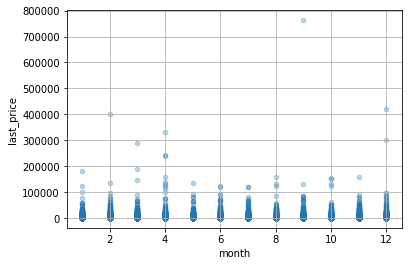

In [ ]:
# строим матрицу рассеяния для месяцев и их корреляцию с ценой для отсортированной информации
scatter_graph(df,
              'month',
              'last_price',
              alpha=0.3)


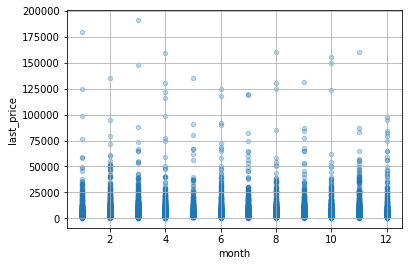

In [ ]:
# строим матрицу рассеяния для месяцев и их корреляцию с ценой для неотсортированной информации
scatter_graph(central_district,
              'month',
              'last_price',
              alpha=0.3)


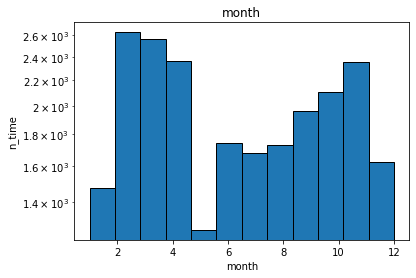

In [ ]:
# строим гистограму по месяцам для неотсортированной информации
date_hist(title='month',
            xlabel_date_hist='month',
            ylabel_date_hist='n_time',
            bins=12,
            column=df['month'])

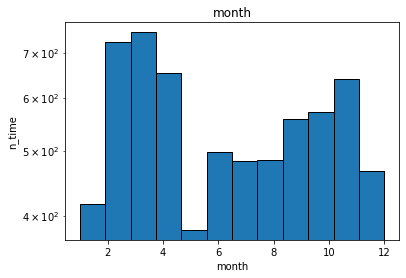

In [ ]:
# строим гистограму по месяцам для отсортированной информации
date_hist(title='month',
            xlabel_date_hist='month',
            ylabel_date_hist='n_time',
            bins=12,
            column=central_district['month'])

In [ ]:
# строим сводную таблцу с числом объявлений, средней и медианной ценной
# группирую по дням недели для неотсортированной информации
# сортируем по количеству объявлений
(
    pivot_by_date(df,
               'month')
.sort_values(by='count',
             ascending=True
            )
)

,count,mean,median
month,,,
5,1263,6354,4500
1,1475,6502,4600
12,1624,6949,4700
7,1677,6387,4650
8,1728,6338,4595
6,1746,6294,4400
9,1965,6826,4700
10,2108,6169,4550
11,2356,6470,4700


In [ ]:
# строим сводную таблцу с числом объявлений, средней и медианной ценной
# группирую по дням недели для отсортированной информации
# сортируем по количеству объявлений
(
    pivot_by_date(central_district,
               'month')
.sort_values(by='count',
             ascending=True
            )
)

,count,mean,median
month,,,
5,381,9474,6650
1,416,9989,6500
12,467,9604,6200
7,482,10145,7200
8,485,10004,6725
6,497,10180,6600
9,558,9519,7075
10,571,9220,6450
11,639,10042,6700


In [ ]:
piv_week_month_df = piv_to_date(df,'month','last_price','piv_week_month_df')

In [ ]:
piv_week_month_df

,month,median
0,1,4600
1,2,4650
2,3,4690
3,4,4800
4,5,4500
5,6,4400
6,7,4650
7,8,4595
8,9,4700
9,10,4550


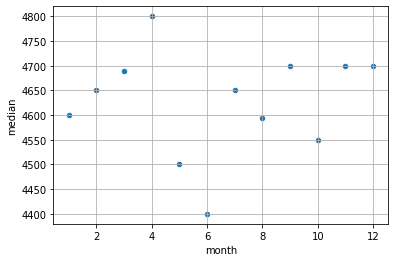

In [ ]:
scatter_graph(piv_week_month_df ,'month','median',alpha=1)

In [ ]:
piv_week_month_centre = piv_to_date(central_district,'month','last_price','piv_week_month_centre')

In [ ]:
piv_week_month_centre

,month,median
0,1,6500.0
1,2,6460.0
2,3,6400.0
3,4,6355.5
4,5,6650.0
5,6,6600.0
6,7,7200.0
7,8,6725.0
8,9,7075.0
9,10,6450.0


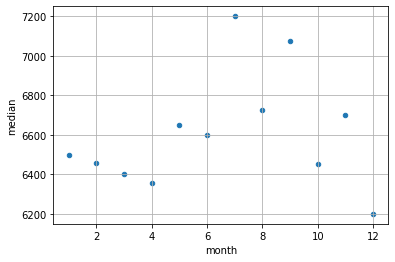

In [ ]:
scatter_graph(piv_week_month_centre ,'month','median',alpha=1)

**Вывод:**
По отношению к центральной области справедливо такой же вывод, как и к общей.

На диаграмммах рассеяния видно, что в центральной области цены по месяцам до лета практически на одном уровне, в **Июле** идет резкий подъем и воллатильность увеличивается, ближе к концу года - **Декбарь** -  цены понижаются и опускаются до самых низов.

В общей базе виден верхний пик в **Апреле** и нижней в **Июне**. В начале года идет плавный рост медианной цены, дальше падение к лету, и обазование неузкого корридора медианной цены до конца года.

Анализируя графики и сводную таблицу,в случае с месяцами, также можем увидеть весьма логичную закономерность - люди публикуют меньше объявлений в определенные 6 месяцев:

**Шестерка месяцев** (по возрастанию кол-ва объявлений):
1. *Январь*
2. *Май*
3. *Декабрь*
4. *Июль*
5. *Август*
6. *Июнь*

**Тройка месяцев лидеров** (по убыванию кол-ва объявлений):
1. *Февраль*
2. *Март*
3. *Апрель*

Медианные цены на недвижимость в центральной области также довольно таки прилично отличаются от данных по общей базе. Частота сохраняется на обоих гистограммах.

Можно выделить самые "дорогие" и самые "дешевые" месяцы по медианной цене объявления:

Самый "дорогой" месяц в центрально области :
- *Июль* - 7200 тысяч рублей

Самый "дешевый" месяц в центральной области:
- *Декабрь* - 6200 тысяч рублей

Самый "дорогой" месяц в общей базе:
- *Апрель* - 4800 тысяч рублей

Самый "дешевый" месяц в общей базе:
- *Июнь* - 4400 тысяч рублей




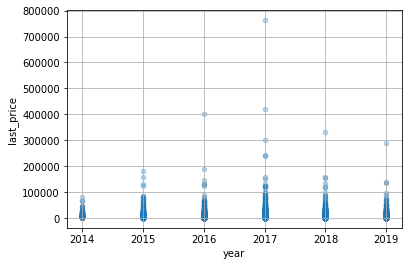

In [ ]:
# строим матрицу рассеяния для месяцев и их корреляцию с ценой для неотсортированной информации
scatter_graph(df,
              'year',
              'last_price',
              alpha=0.3)


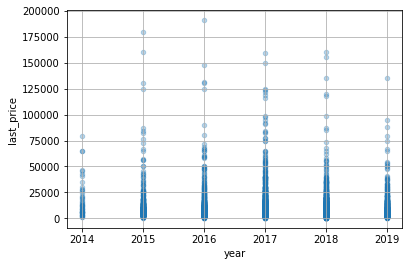

In [ ]:
# строим матрицу рассеяния для месяцев и их корреляцию с ценой для отсортированной информации
scatter_graph(central_district,
              'year',
              'last_price',
              alpha=0.3)


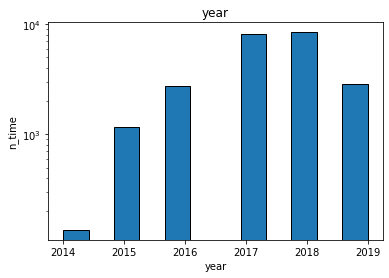

In [ ]:
# строим гистограму по месяцам для неотсортированной информации
date_hist(title='year',
            xlabel_date_hist='year',
            ylabel_date_hist='n_time',
            bins=12,
            column=df['year'])

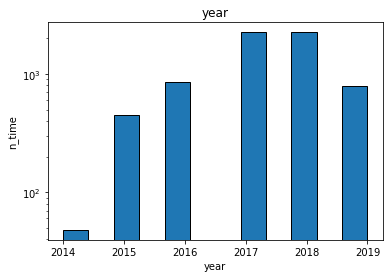

In [ ]:
# строим гистограму по месяцам для отсортированной информации
date_hist(title='year',
            xlabel_date_hist='year',
            ylabel_date_hist='n_time',
            bins=12,
            column=central_district['year'])

In [ ]:
# строим сводную таблцу с числом объявлений, средней и медианной ценной
# группирую по дням недели для неотсортированной информации
# сортируем по количеству объявлений
(
    pivot_by_date(df,
               'year')
.sort_values(by='count',
             ascending=True
            )
)

,count,mean,median
year,,,
2014,136,12046,7640
2015,1166,8295,5300
2016,2750,6765,4550
2019,2859,6706,5050
2017,8139,6537,4500
2018,8453,5923,4580


In [ ]:
# строим сводную таблцу с числом объявлений, средней и медианной ценной
# группирую по дням недели для отсортированной информации
# сортируем по количеству объявлений
(
    pivot_by_date(central_district,
               'year')
.sort_values(by='count',
             ascending=True
            )
)

,count,mean,median
year,,,
2014,48,18322,11868
2015,454,12494,7976
2019,784,9356,6550
2016,847,10715,6900
2017,2241,9806,6700
2018,2252,8467,6000


In [ ]:
piv_year_df = piv_to_date(df,'year','last_price','piv_year_df')

In [ ]:
piv_year_df

,year,median
0,2014,7640
1,2015,5300
2,2016,4550
3,2017,4500
4,2018,4580
5,2019,5050


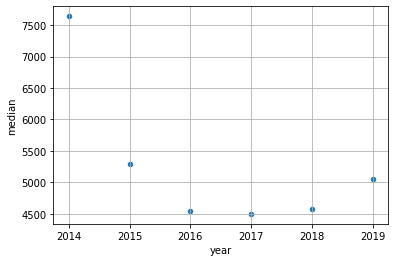

In [ ]:
scatter_graph(piv_year_df,'year','median',alpha=1)

In [ ]:
piv_year_centre = piv_to_date(central_district,'year','last_price','piv_year_centre')

In [ ]:
piv_year_centre

,year,median
0,2014,11868
1,2015,7976
2,2016,6900
3,2017,6700
4,2018,6000
5,2019,6550


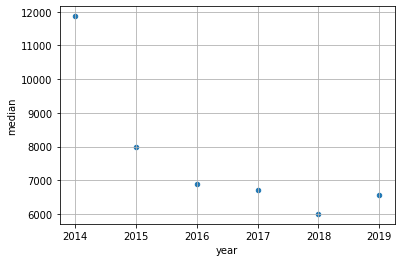

In [ ]:
scatter_graph(piv_year_centre,'year','median',alpha=1)


**Вывод:**

Заметим, что гистограмма для центральной области по годам практически индетична такой же гистограмме в общей базе.

Из диаграммы рассеяния видно, что медианная цена на недвижимость после "дорогого" 2014 года начала падать, в центральном районе до 2018 падение было медленное, не считая падение в 2015 году. В 2018 году было резкое падение в центральной области. После этого медианная цена начала восстанавливаться также как и в общей базе.

Лидерами по количеству объявлений безусловно явлюятся в общей базе:
1. **2018 год - 8_440 шт.**
2. **2017 год - 8_118 шт.**


Лидерами по количеству объявлений безусловно явлюятся в центральной области:
1. **2018 год - 2_251 шт.**
2. **2017 год - 2_251 шт.**

Самое маленькое количество объявлений пришлось на 1 год в общей базе:
1. **2014 - 136 шт.**

Самое маленькое количество объявлений пришлось на 1 год в центральной области:
1. **2014 - 49 шт.**

Наиболее низкие медианные цены приходятся на 3 года (по возврастанию цены) в общей базе:
1. **2017 - 4_500 тысяч рублей**
2. **2016 - 4_550 тысяч рублей**
3. **2018 - 4_577 тысяч рублей**

Наиболее низкая медианная цена приходится на 1 год(по возврастанию цены) в центральной области:
1. **2018 - 6_000 тысяч рублей**

Наиболее высокая медианная цена приходится на 1 год(по возврастанию цены) в общей базе:
1. **2014 - 7_640 тысяч рублей**

Наиболее высокая медианная цена приходится на 1 год(по возврастанию цены) в центральной области:
1. **2014 - 11_700 тысяч рублей**

In [ ]:
# функции для автоматизации графика рассеяния и корреляции для расстояния до центра
def scatter_graph_center_final(data,x,y,alpha,grid=True):
    data.plot(x=x,y=y,kind='scatter',grid=grid,alpha=alpha)
    plt.show

Корреляция между столбцами равна -0.17


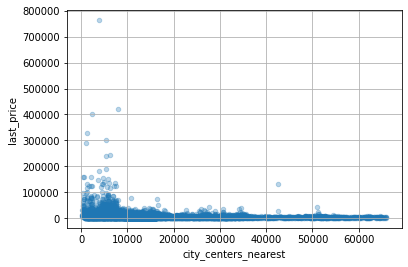

In [ ]:
#
scatter_graph_center_final(df,'city_centers_nearest','last_price',alpha=0.3)
corr_calc(df.last_price,df.city_centers_nearest)

Корреляция между столбцами равна -0.16


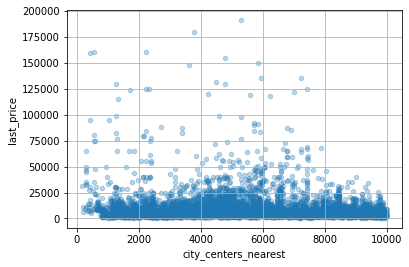

In [ ]:
#
scatter_graph_center_final(central_district,'city_centers_nearest','last_price',alpha=0.3)
corr_calc(central_district.last_price,central_district.city_centers_nearest)

Среднее значение столбца city_centers_nearest равно 14675.25 метров.
--------------------------------------------------
Медианное значение столбца city_centers_nearest равно 13108.0 метров.


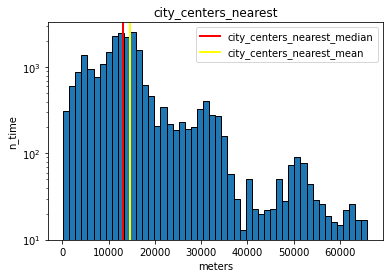

In [ ]:
# создаем гистограмму для неотсортированной информации
make_a_hist(title='city_centers_nearest',
            xlabel_hist='meters',
            axvline_median_label='city_centers_nearest_median',
            axvline_mean_label='city_centers_nearest_mean',
            variation_value ='метров',
            column=df['city_centers_nearest'])

Среднее значение столбца city_centers_nearest равно 5845.67 метров.
--------------------------------------------------
Медианное значение столбца city_centers_nearest равно 5682.0 метров.


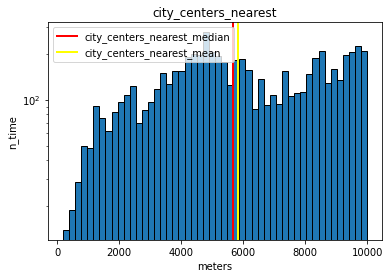

In [ ]:
# создаем гистограмму для отсортированной таблицы
make_a_hist(title='city_centers_nearest',
            xlabel_hist='meters',
            axvline_median_label='city_centers_nearest_median',
            axvline_mean_label='city_centers_nearest_mean',
            variation_value ='метров',
            column=central_district['city_centers_nearest'])

In [ ]:
# Найдем все корреляции между стоимостью квартиры и другими факторами
k = 0
for j in scatter_tmp.columns:
    if  ((j != 'last_price' and  j != 'cost_per_m2' and j != 'total_images') and (
scatter_tmp['last_price'].corr(scatter_tmp[j]) >= 0.1 or
scatter_tmp['last_price'].corr(scatter_tmp[j]) <= -0.1)):
        print('last_price',j,sep=' и ')
        print(round(scatter_tmp['last_price'].corr(scatter_tmp[j]),2))
        k += 1
print(f'Всего столбцов, которые более или менее коррелируют со столбцом last_price: {k}')

last_price и total_area
0.73
last_price и rooms
0.44
last_price и ceiling_height
0.41
last_price и living_area
0.66
last_price и kitchen_area
0.57
last_price и city_centers_nearest
-0.22
last_price и parks_around3000
0.26
last_price и ponds_around3000
0.26
last_price и kitchen_to_total
-0.11
Всего столбцов, которые более или менее коррелируют со столбцом last_price: 9


In [ ]:
corr_tmp_center = scatter_tmp.query('city_centers_nearest < 10_000').drop(columns='index')


In [ ]:
# Найдем все корреляции между стоимостью квартиры и другими факторами
c = 0
for j in corr_tmp_center.columns:
    if  ((j != 'last_price' and  j != 'cost_per_m2' and j != 'total_images') and (
corr_tmp_center['last_price'].corr(corr_tmp_center[j]) >= 0.1 or
corr_tmp_center['last_price'].corr(corr_tmp_center[j]) <= -0.1)):
        print('last_price',j,sep=' и ')
        print(round(corr_tmp_center['last_price'].corr(corr_tmp_center[j]),2))
        c += 1
print(f'Всего столбцов, которые более или менее коррелируют со столбцом last_price: {c}')

last_price и total_area
0.73
last_price и rooms
0.45
last_price и ceiling_height
0.35
last_price и living_area
0.67
last_price и kitchen_area
0.57
last_price и airports_nearest
0.13
last_price и city_centers_nearest
-0.16
last_price и parks_around3000
0.28
last_price и ponds_around3000
0.27
last_price и days_exposition
0.13
last_price и kitchen_to_total
-0.12
Всего столбцов, которые более или менее коррелируют со столбцом last_price: 11


**Вывод:**

В центральной области коррелирующих столбцов с ценой больше на 2, чем в общей базе.
Ко всему списку добавились столбцы `airports_nearest` и `days_exposition`. Положительная корреляция там несущественная, однако она есть.

В основном, можем заметить, что корреляции между столбца в центральной области выше, чем в общей базе.

In [ ]:

corr_tmp_center.corr()[['last_price']]

,last_price
total_images,0.161589
last_price,1.000000
total_area,0.732981
rooms,0.450003
ceiling_height,0.346906
floors_total,-0.017548
living_area,0.665014
floor,0.045321
kitchen_area,0.572041
balcony,-0.000052


In [ ]:
df['last_price'].median()

4650.0

In [ ]:
central_district['last_price'].median()

6550.0

In [ ]:
final_top_10.sort_values(by='cost_per_m2_mean',ascending=False)

,locality_name,count,cost_per_m2_mean
0,Санкт-Петербург,15581,113985
4,Пушкин,367,102987
8,деревня Кудрово,290,92327
6,посёлок Парголово,326,90333
1,посёлок Мурино,498,85249
2,посёлок Шушары,439,78703
5,Колпино,338,75423
7,Гатчина,307,68745
3,Всеволожск,397,68646
9,Выборг,237,58141


# Общий вывод

***
## Предобработка данных

Были выявлены столбцы, требущие обработки и чистки и проделаны следущие операции с оными:

* `last_price` - привели к типу `int`, поделили для удобства на 1_000
* `total_area` - округлили до десятых
* `first_day_exposition` - привели к типу `datetime`
* `rooms` - заполнили пропуски относительно площади
* `ceiling_height` - округлили до десятых, заполнили пропуски относительно удаления от центра.
* `floors_total`- привели к типу `int`, заполнили пропуски относительно высоты потолков - `ceiling_height`
* `living_area`- округлили до десятых, нашли отношение жилой площади к общей и заменили пропущенные значения при помощи этоого коэффициента
* `is_apartment` - заменили пропущенные значения на `0`
* `studio` - привели к типу `int`, заменили пропущенные значения False на `0`, True на `1`
* `open_plan` - привели к типу `int`, заменили пропущенные значения False на `0`, True на `1`
* `kitchen_area` - округлили до десятых, нашли отношение площади кухни к общей и заменили пропущенные значения при помощи этоого коэффициента
* `balcony` - привели к типу `int`, заменили пропущенные значения на `0`
* `locality_name` - удалили все пропуски
* `airports_nearest` - привели к типу `int`, заполнили пропуски при помощи алгоритма и группировки по `city_centers_nearest`
* `city_centers_nearest` - привели к типу `int`, заполнили пропуски при помощи алгоритма
* `parks_around3000` - привели к типу `int`, пропущенные значения заменить на `0`
* `parks_nearest` - привели к типу `int`, заполнили пропуски при помощи алгоритма и группировки по `city_centers_nearest` и `locality_name`
* `ponds_around3000` - привели к типу `int`, пропущенные значения заменить на `0`
* `ponds_nearest` - привели к типу `int`, заполнили пропуски при помощи алгоритма и группировки по `city_centers_nearest` и `locality_name`
* `days_exposition` -  привели к типу `int`, заполнили пропуски при помощи алгоритма
***
## Критерии, влияющие на цену недвижимости
1. Слабое влияние
 * `last_price` и `city_centers_nearest` - Отрицательная корреляция говорит об обратной зависимости - чем ближе к центру (меньше расстояние), тем выше стоимость квартиры.
 * `last_price` и `parks_around3000` - Положительная корреляция - чем больше в районе парков, тем выше стоимость квартиры.
 * `last_price `и `ponds_around3000` - Положительная корреляция - чем больше в районе прудов и водных мест, тем выше стоимость квартиры.
 * `last_price` и `kitchen_to_total` - Отрицательная корреляция - чем больше кухня, тем меньше цена.
2. Умеренное влияние
 * `last_price` и `rooms` -  Положительная корреляция - чем больше количество комнат, тем выше стоимость квартиры. Завимисоть не очень слабая и не очень сильная
 * `last_price` и `ceiling_height` - Положительная корреляция  - чем выше потолки, тем выше стоимость квартиры. Зависимость немного слабая, но есть
3. Заметное влияние
 * `last_price` и `kitchen_area` -  Положительная корреляция  - чем больше площадь кухни, тем выше стоимость квартиры.

Завимимость по всем площадям достаточно заметная

4. Высокое влияние
 * `last_price` и `total_area` - Положительная корреляция  - чем больше общая площадь, тем выше стоимость квартиры.
 * `last_price` и `living_area` - Положительная корреляция  - чем больше жилвя площадь, тем выше стоимость квартиры.
***
## Топ-10 населенных пунктов
В топ 10 населенных пунктов вошли(рейтинг по убиванию цены за квадратный метр):
- Санкт-Петербург - 113_985 тысяч рублей
- Пушкин - 102_987 тысяч рублей
- деревня Кудрово - 92_327 тысяч рублей
- поселок Парголово - 90_333 тысяч рублей
- поселок Мурино - 85_249 тысяч рублей
- поселок Шушары - 78_703 тысяч рублей
- Колпино - 75_423 тысяч рублей
- Гатчина - 68_745 тысяч рублей
- Всеволожск - 68_646 тысяч рублей
- Выборг - 58_141 тысяч рублей
****
## Квартиры в центре

Центральная область - значение **до 10 км** по столбцу `city_centers_nearest`

Медианная цена достаточно отличается в центре и в общей базе:

В центре медианная цена равна **6_600 тысяч рублей**

В общей базе медианная цена равна **4_650 тысяч рублей**

***Зависимости от разных факторов сопадают, также в центре завимисмость по всем факторам немного сильнее, чем в общей базе***

****

Подведем краткий итог:

На стоимость недвижимости влияет много факторов. От высоты потолков до наличия пруда или парка в районе. Проанализировав наши данные и избавившись от выбросов и пустых значений мы выделили все факторы из нашей информации, влияющие на недвижимость. Также заметили, что цены в центральной области выше, чем в общей базе - что достаточно логично и подтвежрает верность выполненной работы. В дальнейшем можем использовать эти данные для других целей.










## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод `info()`)
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения
- [x]  есть пояснение, какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение, в каких столбцах изменены типы и почему
- [x]  посчитано и добавлено в таблицу: цена квадратного метра
- [x]  посчитано и добавлено в таблицу: день недели, месяц и год публикации объявления
- [x]  посчитано и добавлено в таблицу: этаж квартиры; варианты — первый, последний, другой
- [x]  посчитано и добавлено в таблицу: соотношение жилой и общей площади, а также отношение площади кухни к общей
- [x]  изучены следующие параметры: площадь, цена, число комнат, высота потолков
- [x]  построены гистограммы для каждого параметра
- [x]  выполнено задание: «Изучите время продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану. Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?»
- [x]  выполнено задание: «Уберите редкие и выбивающиеся значения. Опишите, какие особенности обнаружили».
- [x]  выполнено задание: «Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от квадратного метра, числа комнат, этажа (первого или последнего), удалённости от центра. Также изучите зависимость от даты размещения: дня недели, месяца и года».
- [x]  выполнено задание: «Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце `locality_name`».
- [x]  выполнено задание: «Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге (`locality_name`). Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется — это и будет центральная зона».
- [x]  выполнено задание: «Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всей базе?»
- [x]  в каждом этапе есть выводы
- [x]  есть общий вывод